In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.42


In [3]:
import torch
from gcpds_cv_pykit.datasets import SeedGermination
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import FCN
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
SeedGermination()

100%|██████████| 0.98G/0.98G [00:09<00:00, 109MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1
Dataset copied to: /content/datasets/seeds
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/seeds/versions/1' deleted.


'/content/datasets/seeds'

In [ ]:
config = {"Dir of dataset": "./datasets/seeds", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "FCN", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","SeedGermination-FCN-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 91794.28it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 73662.60it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 66175.67it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


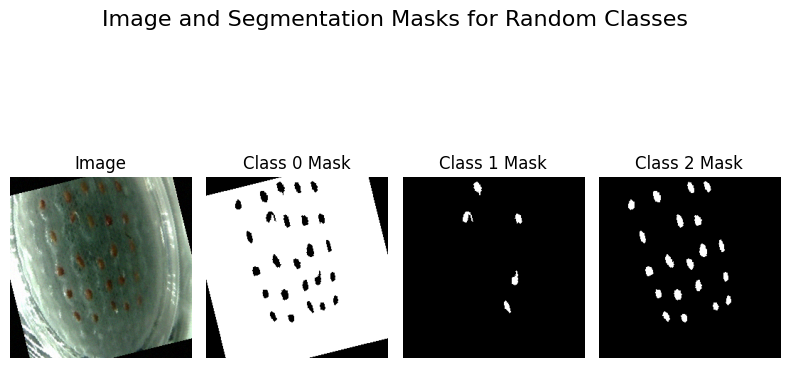

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 202MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


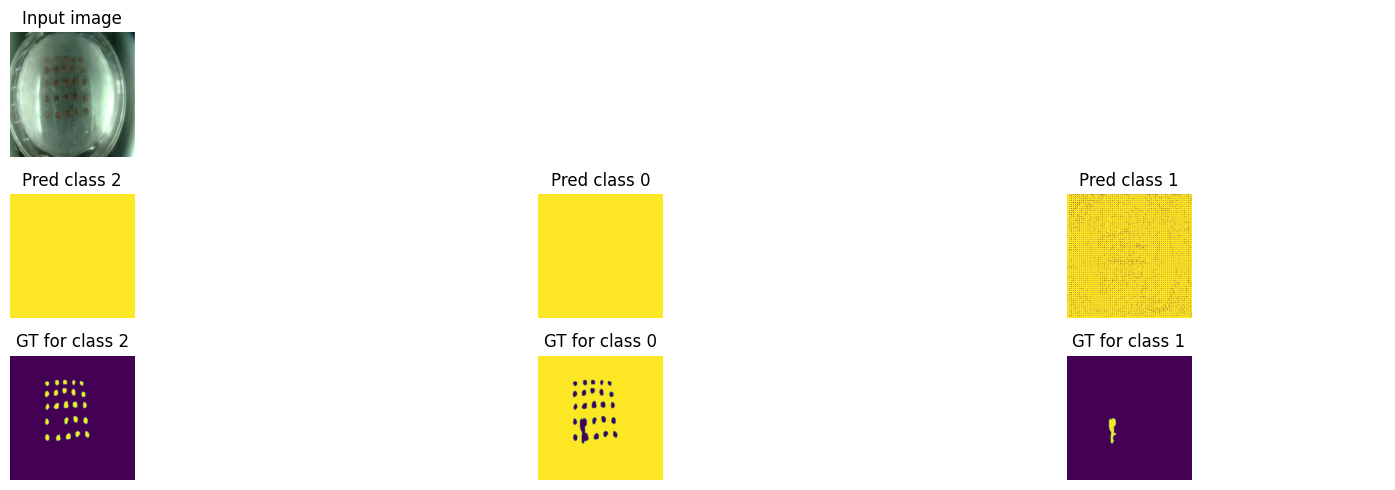

Train loss: 0.75267 | Time: 0m 58s | Val loss: 0.72815
Train_DICE_avg: 0.22787 | Train_Jaccard_avg: 0.19702 | Train_Sensitivity_avg: 0.32640 | Train_Specificity_avg: 0.76907 
Class 0 - Train_DICE: 0.60103 | Train_Jaccard: 0.54803 | Train_Sensitivity: 0.93614 | Train_Specificity: 0.33014 
Class 1 - Train_DICE: 0.01582 | Train_Jaccard: 0.00810 | Train_Sensitivity: 0.00810 | Train_Specificity: 0.99179 
Class 2 - Train_DICE: 0.06675 | Train_Jaccard: 0.03493 | Train_Sensitivity: 0.03496 | Train_Specificity: 0.98526 
Val_DICE_avg: 0.35370 | Val_Jaccard_avg: 0.33395 | Val_Sensitivity_avg: 0.33396 | Val_Specificity_avg: 0.99667 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01678 | Val_Jaccard: 0.00867 | Val_Sensitivity: 0.00870 | Val_Specificity: 0.99001 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.70863 | Time: 1m 55s | Val loss: 0.68962
Train_DICE_avg: 0.34842 | Train_Jaccard_avg: 0.32389 | Train_Sensitivity_avg: 0.32392 | Train_Specificity_avg: 0.99727 
Class 0 - Train_DICE: 0.96243 | Train_Jaccard: 0.92850 | Train_Sensitivity: 0.92850 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01577 | Train_Jaccard: 0.00807 | Train_Sensitivity: 0.00817 | Train_Specificity: 0.99180 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35363 | Val_Jaccard_avg: 0.33391 | Val_Sensitivity_avg: 0.33399 | Val_Specificity_avg: 0.99706 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01656 | Val_Jaccard: 0.00856 | Val_Sensitivity: 0.00880 | Val_Specificity: 0.99119 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.68416 | Time: 2m 51s | Val loss: 0.67140
Train_DICE_avg: 0.34829 | Train_Jaccard_avg: 0.32379 | Train_Sensitivity_avg: 0.32385 | Train_Specificity_avg: 0.99728 
Class 0 - Train_DICE: 0.96239 | Train_Jaccard: 0.92839 | Train_Sensitivity: 0.92839 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01544 | Train_Jaccard: 0.00790 | Train_Sensitivity: 0.00808 | Train_Specificity: 0.99184 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35356 | Val_Jaccard_avg: 0.33388 | Val_Sensitivity_avg: 0.33397 | Val_Specificity_avg: 0.99704 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01635 | Val_Jaccard: 0.00844 | Val_Sensitivity: 0.00873 | Val_Specificity: 0.99112 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.67144 | Time: 3m 47s | Val loss: 0.66307
Train_DICE_avg: 0.34834 | Train_Jaccard_avg: 0.32387 | Train_Sensitivity_avg: 0.32391 | Train_Specificity_avg: 0.99726 
Class 0 - Train_DICE: 0.96251 | Train_Jaccard: 0.92860 | Train_Sensitivity: 0.92860 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01546 | Train_Jaccard: 0.00791 | Train_Sensitivity: 0.00805 | Train_Specificity: 0.99179 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03510 | Train_Sensitivity: 0.03510 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35368 | Val_Jaccard_avg: 0.33395 | Val_Sensitivity_avg: 0.33399 | Val_Specificity_avg: 0.99705 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01674 | Val_Jaccard: 0.00865 | Val_Sensitivity: 0.00879 | Val_Specificity: 0.99115 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.66473 | Time: 4m 44s | Val loss: 0.65819
Train_DICE_avg: 0.34838 | Train_Jaccard_avg: 0.32386 | Train_Sensitivity_avg: 0.32387 | Train_Specificity_avg: 0.99723 
Class 0 - Train_DICE: 0.96244 | Train_Jaccard: 0.92846 | Train_Sensitivity: 0.92846 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01571 | Train_Jaccard: 0.00804 | Train_Sensitivity: 0.00809 | Train_Specificity: 0.99170 
Class 2 - Train_DICE: 0.06701 | Train_Jaccard: 0.03507 | Train_Sensitivity: 0.03507 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35373 | Val_Jaccard_avg: 0.33397 | Val_Sensitivity_avg: 0.33398 | Val_Specificity_avg: 0.99697 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01687 | Val_Jaccard: 0.00872 | Val_Sensitivity: 0.00877 | Val_Specificity: 0.99091 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


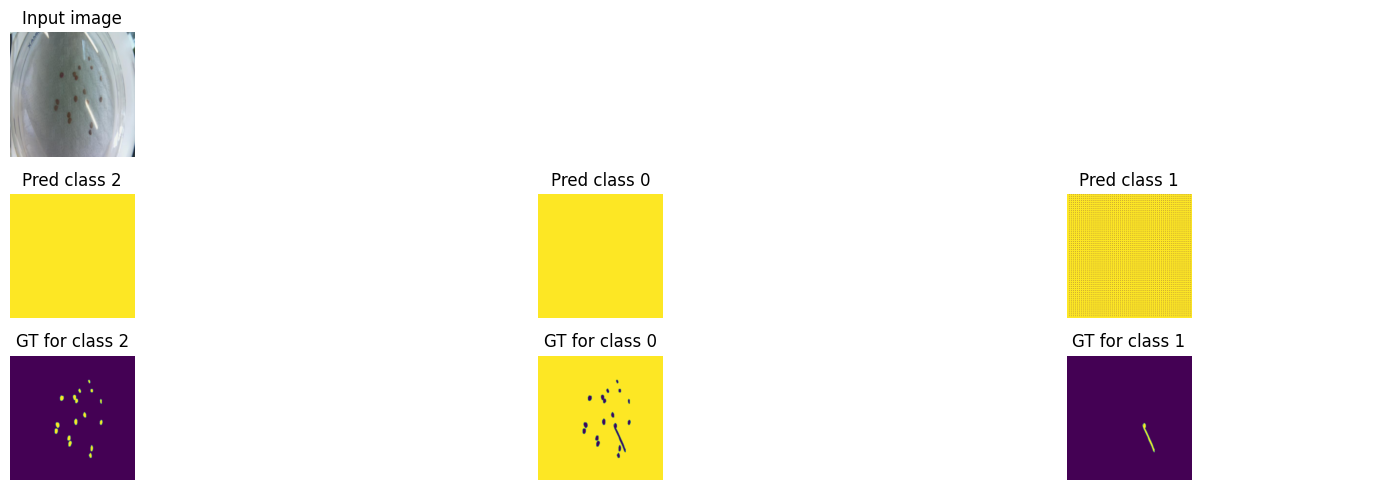

Train loss: 0.66086 | Time: 5m 41s | Val loss: 0.65542
Train_DICE_avg: 0.34838 | Train_Jaccard_avg: 0.32381 | Train_Sensitivity_avg: 0.32381 | Train_Specificity_avg: 0.99719 
Class 0 - Train_DICE: 0.96234 | Train_Jaccard: 0.92827 | Train_Sensitivity: 0.92827 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01576 | Train_Jaccard: 0.00807 | Train_Sensitivity: 0.00809 | Train_Specificity: 0.99157 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35375 | Val_Jaccard_avg: 0.33398 | Val_Sensitivity_avg: 0.33399 | Val_Specificity_avg: 0.99693 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01693 | Val_Jaccard: 0.00876 | Val_Sensitivity: 0.00878 | Val_Specificity: 0.99080 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.65847 | Time: 6m 38s | Val loss: 0.65326
Train_DICE_avg: 0.34835 | Train_Jaccard_avg: 0.32374 | Train_Sensitivity_avg: 0.32375 | Train_Specificity_avg: 0.99754 
Class 0 - Train_DICE: 0.96220 | Train_Jaccard: 0.92804 | Train_Sensitivity: 0.92804 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01581 | Train_Jaccard: 0.00810 | Train_Sensitivity: 0.00810 | Train_Specificity: 0.99262 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35378 | Val_Jaccard_avg: 0.33400 | Val_Sensitivity_avg: 0.33400 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.65686 | Time: 7m 34s | Val loss: 0.65181
Train_DICE_avg: 0.34838 | Train_Jaccard_avg: 0.32377 | Train_Sensitivity_avg: 0.32377 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.96226 | Train_Jaccard: 0.92812 | Train_Sensitivity: 0.92812 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01586 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35378 | Val_Jaccard_avg: 0.33400 | Val_Sensitivity_avg: 0.33400 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.65572 | Time: 8m 31s | Val loss: 0.65088
Train_DICE_avg: 0.34838 | Train_Jaccard_avg: 0.32379 | Train_Sensitivity_avg: 0.32379 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.96226 | Train_Jaccard: 0.92817 | Train_Sensitivity: 0.92817 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01586 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35378 | Val_Jaccard_avg: 0.33400 | Val_Sensitivity_avg: 0.33400 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.65494 | Time: 9m 28s | Val loss: 0.65002
Train_DICE_avg: 0.34834 | Train_Jaccard_avg: 0.32373 | Train_Sensitivity_avg: 0.32373 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.96216 | Train_Jaccard: 0.92799 | Train_Sensitivity: 0.92799 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01585 | Train_Jaccard: 0.00811 | Train_Sensitivity: 0.00811 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35378 | Val_Jaccard_avg: 0.33400 | Val_Sensitivity_avg: 0.33400 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


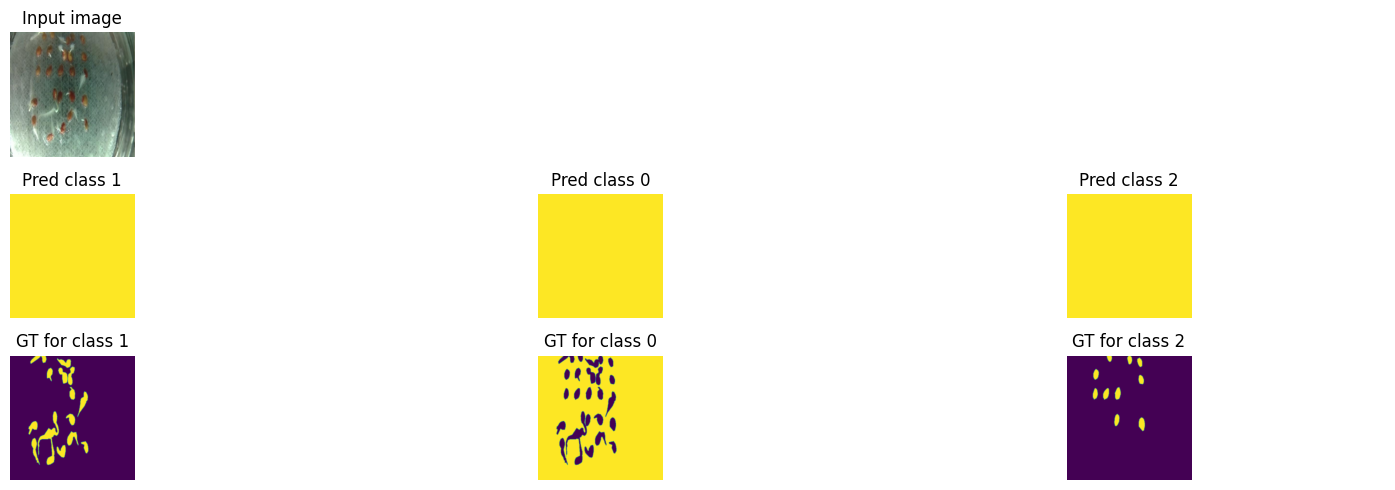

Train loss: 0.65343 | Time: 10m 26s | Val loss: 0.64788
Train_DICE_avg: 0.34829 | Train_Jaccard_avg: 0.32363 | Train_Sensitivity_avg: 0.32363 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.96201 | Train_Jaccard: 0.92768 | Train_Sensitivity: 0.92768 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01586 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35378 | Val_Jaccard_avg: 0.33400 | Val_Sensitivity_avg: 0.33400 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.65206 | Time: 11m 24s | Val loss: 0.64703
Train_DICE_avg: 0.34839 | Train_Jaccard_avg: 0.32381 | Train_Sensitivity_avg: 0.32381 | Train_Specificity_avg: 1.00000 
Class 0 - Train_DICE: 0.96228 | Train_Jaccard: 0.92822 | Train_Sensitivity: 0.92822 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01586 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35378 | Val_Jaccard_avg: 0.33400 | Val_Sensitivity_avg: 0.33400 | Val_Specificity_avg: 1.00000 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.65097 | Time: 12m 21s | Val loss: 0.64622
Train_DICE_avg: 0.34881 | Train_Jaccard_avg: 0.32406 | Train_Sensitivity_avg: 0.32406 | Train_Specificity_avg: 0.99998 
Class 0 - Train_DICE: 0.96237 | Train_Jaccard: 0.92835 | Train_Sensitivity: 0.92835 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01703 | Train_Jaccard: 0.00874 | Train_Sensitivity: 0.00874 | Train_Specificity: 0.99994 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.35417 | Val_Jaccard_avg: 0.33420 | Val_Sensitivity_avg: 0.33420 | Val_Specificity_avg: 0.99994 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01819 | Val_Jaccard: 0.00943 | Val_Sensitivity: 0.00943 | Val_Specificity: 0.99982 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.64774 | Time: 13m 19s | Val loss: 0.64141
Train_DICE_avg: 0.35582 | Train_Jaccard_avg: 0.32791 | Train_Sensitivity_avg: 0.32792 | Train_Specificity_avg: 0.99996 
Class 0 - Train_DICE: 0.96234 | Train_Jaccard: 0.92832 | Train_Sensitivity: 0.92832 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.03809 | Train_Jaccard: 0.02032 | Train_Sensitivity: 0.02035 | Train_Specificity: 0.99988 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.36482 | Val_Jaccard_avg: 0.34035 | Val_Sensitivity_avg: 0.34037 | Val_Specificity_avg: 0.99995 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.05014 | Val_Jaccard: 0.02787 | Val_Sensitivity: 0.02793 | Val_Specificity: 0.99985 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.64084 | Time: 14m 17s | Val loss: 0.63120
Train_DICE_avg: 0.37049 | Train_Jaccard_avg: 0.33691 | Train_Sensitivity_avg: 0.33726 | Train_Specificity_avg: 0.99977 
Class 0 - Train_DICE: 0.96243 | Train_Jaccard: 0.92845 | Train_Sensitivity: 0.92845 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.08201 | Train_Jaccard: 0.04721 | Train_Sensitivity: 0.04826 | Train_Specificity: 0.99932 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.38203 | Val_Jaccard_avg: 0.35189 | Val_Sensitivity_avg: 0.35266 | Val_Specificity_avg: 0.99963 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.10178 | Val_Jaccard: 0.06250 | Val_Sensitivity: 0.06480 | Val_Specificity: 0.99889 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


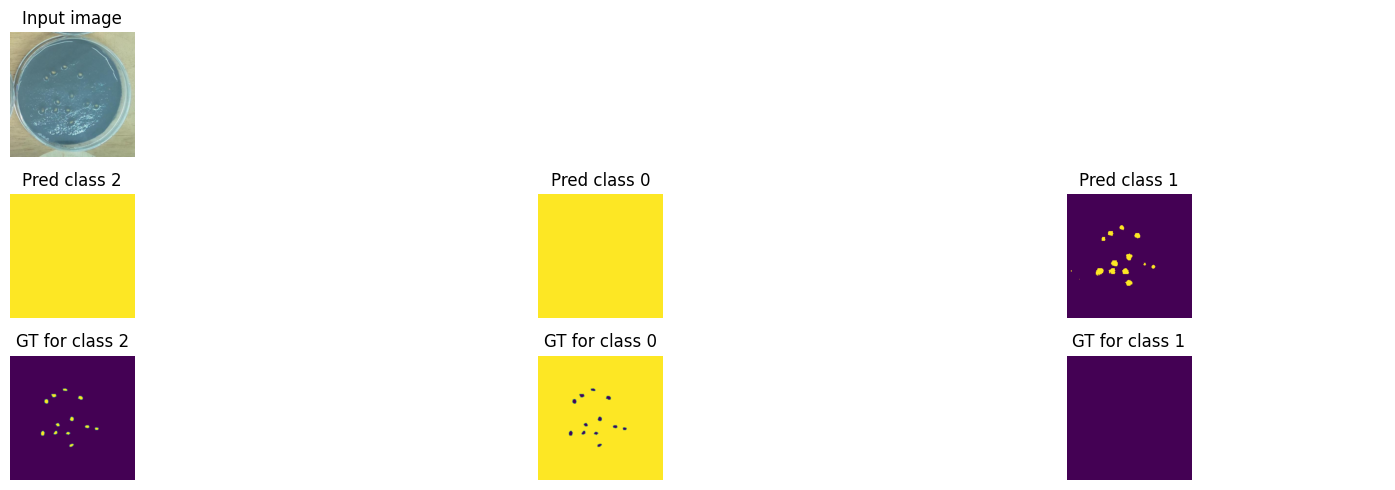

Train loss: 0.63076 | Time: 15m 15s | Val loss: 0.61941
Train_DICE_avg: 0.38458 | Train_Jaccard_avg: 0.34612 | Train_Sensitivity_avg: 0.34824 | Train_Specificity_avg: 0.99947 
Class 0 - Train_DICE: 0.96229 | Train_Jaccard: 0.92826 | Train_Sensitivity: 0.92826 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.12440 | Train_Jaccard: 0.07501 | Train_Sensitivity: 0.08137 | Train_Specificity: 0.99841 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.39511 | Val_Jaccard_avg: 0.36098 | Val_Sensitivity_avg: 0.36561 | Val_Specificity_avg: 0.99916 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.14102 | Val_Jaccard: 0.08975 | Val_Sensitivity: 0.10364 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.61835 | Time: 16m 13s | Val loss: 0.61077
Train_DICE_avg: 0.39570 | Train_Jaccard_avg: 0.35352 | Train_Sensitivity_avg: 0.35859 | Train_Specificity_avg: 0.99922 
Class 0 - Train_DICE: 0.96211 | Train_Jaccard: 0.92784 | Train_Sensitivity: 0.92784 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.15794 | Train_Jaccard: 0.09763 | Train_Sensitivity: 0.11284 | Train_Specificity: 0.99766 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40103 | Val_Jaccard_avg: 0.36478 | Val_Sensitivity_avg: 0.37432 | Val_Specificity_avg: 0.99893 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.15877 | Val_Jaccard: 0.10114 | Val_Sensitivity: 0.12976 | Val_Specificity: 0.99679 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.60740 | Time: 17m 10s | Val loss: 0.60485
Train_DICE_avg: 0.40327 | Train_Jaccard_avg: 0.35906 | Train_Sensitivity_avg: 0.36771 | Train_Specificity_avg: 0.99905 
Class 0 - Train_DICE: 0.96317 | Train_Jaccard: 0.92982 | Train_Sensitivity: 0.92982 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.17960 | Train_Jaccard: 0.11225 | Train_Sensitivity: 0.13822 | Train_Specificity: 0.99716 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.40735 | Val_Jaccard_avg: 0.36931 | Val_Sensitivity_avg: 0.37704 | Val_Specificity_avg: 0.99908 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.17774 | Val_Jaccard: 0.11475 | Val_Sensitivity: 0.13794 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.60029 | Time: 18m 8s | Val loss: 0.59814
Train_DICE_avg: 0.40890 | Train_Jaccard_avg: 0.36259 | Train_Sensitivity_avg: 0.37337 | Train_Specificity_avg: 0.99897 
Class 0 - Train_DICE: 0.96200 | Train_Jaccard: 0.92764 | Train_Sensitivity: 0.92764 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.19765 | Train_Jaccard: 0.12503 | Train_Sensitivity: 0.15739 | Train_Specificity: 0.99691 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41307 | Val_Jaccard_avg: 0.37339 | Val_Sensitivity_avg: 0.38280 | Val_Specificity_avg: 0.99901 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.19491 | Val_Jaccard: 0.12699 | Val_Sensitivity: 0.15523 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.59493 | Time: 19m 6s | Val loss: 0.59346
Train_DICE_avg: 0.41328 | Train_Jaccard_avg: 0.36583 | Train_Sensitivity_avg: 0.37919 | Train_Specificity_avg: 0.99891 
Class 0 - Train_DICE: 0.96208 | Train_Jaccard: 0.92783 | Train_Sensitivity: 0.92783 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.21072 | Train_Jaccard: 0.13457 | Train_Sensitivity: 0.17466 | Train_Specificity: 0.99673 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.41695 | Val_Jaccard_avg: 0.37624 | Val_Sensitivity_avg: 0.38743 | Val_Specificity_avg: 0.99896 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.20652 | Val_Jaccard: 0.13553 | Val_Sensitivity: 0.16910 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


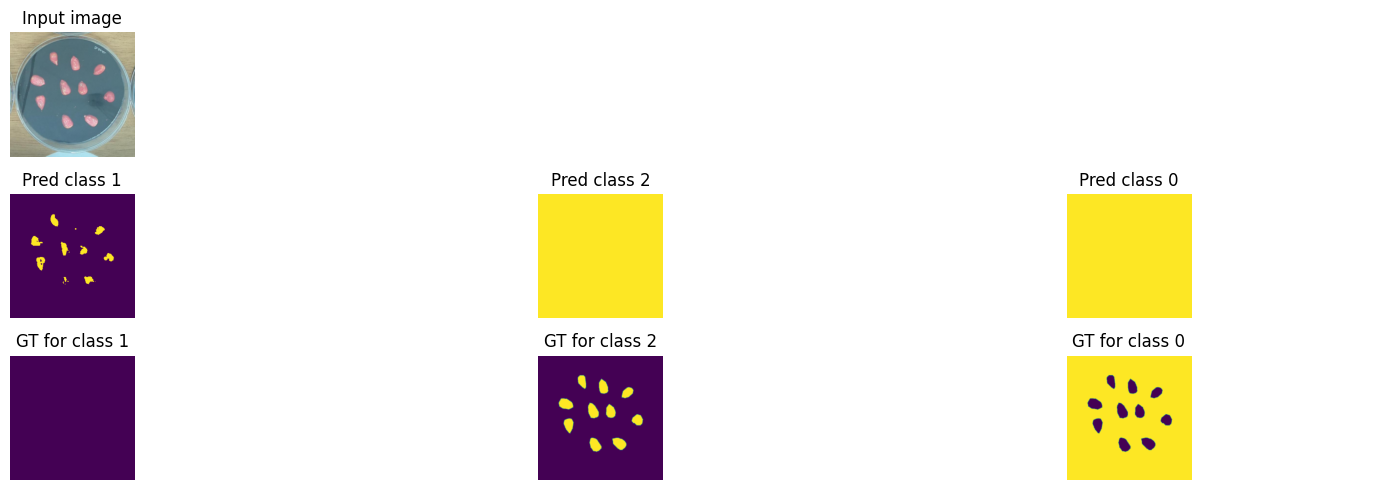

Train loss: 0.58901 | Time: 20m 5s | Val loss: 0.58582
Train_DICE_avg: 0.41911 | Train_Jaccard_avg: 0.37037 | Train_Sensitivity_avg: 0.38682 | Train_Specificity_avg: 0.99886 
Class 0 - Train_DICE: 0.96231 | Train_Jaccard: 0.92825 | Train_Sensitivity: 0.92825 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.22802 | Train_Jaccard: 0.14780 | Train_Sensitivity: 0.19714 | Train_Specificity: 0.99657 
Class 2 - Train_DICE: 0.06701 | Train_Jaccard: 0.03507 | Train_Sensitivity: 0.03507 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42543 | Val_Jaccard_avg: 0.38285 | Val_Sensitivity_avg: 0.39853 | Val_Specificity_avg: 0.99880 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.23198 | Val_Jaccard: 0.15536 | Val_Sensitivity: 0.20239 | Val_Specificity: 0.99640 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.58292 | Time: 21m 3s | Val loss: 0.58089
Train_DICE_avg: 0.42590 | Train_Jaccard_avg: 0.37584 | Train_Sensitivity_avg: 0.39492 | Train_Specificity_avg: 0.99883 
Class 0 - Train_DICE: 0.96226 | Train_Jaccard: 0.92814 | Train_Sensitivity: 0.92814 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.24838 | Train_Jaccard: 0.16428 | Train_Sensitivity: 0.22153 | Train_Specificity: 0.99649 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03510 | Train_Sensitivity: 0.03510 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.42954 | Val_Jaccard_avg: 0.38630 | Val_Sensitivity_avg: 0.40238 | Val_Specificity_avg: 0.99888 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.24431 | Val_Jaccard: 0.16572 | Val_Sensitivity: 0.21394 | Val_Specificity: 0.99663 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.57907 | Time: 22m 1s | Val loss: 0.57619
Train_DICE_avg: 0.42892 | Train_Jaccard_avg: 0.37835 | Train_Sensitivity_avg: 0.39967 | Train_Specificity_avg: 0.99882 
Class 0 - Train_DICE: 0.96205 | Train_Jaccard: 0.92775 | Train_Sensitivity: 0.92775 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.25769 | Train_Jaccard: 0.17223 | Train_Sensitivity: 0.23619 | Train_Specificity: 0.99645 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.43409 | Val_Jaccard_avg: 0.39076 | Val_Sensitivity_avg: 0.40710 | Val_Specificity_avg: 0.99888 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.25796 | Val_Jaccard: 0.17911 | Val_Sensitivity: 0.22812 | Val_Specificity: 0.99664 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.57487 | Time: 22m 59s | Val loss: 0.57262
Train_DICE_avg: 0.43265 | Train_Jaccard_avg: 0.38187 | Train_Sensitivity_avg: 0.40402 | Train_Specificity_avg: 0.99883 
Class 0 - Train_DICE: 0.96261 | Train_Jaccard: 0.92882 | Train_Sensitivity: 0.92882 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.26831 | Train_Jaccard: 0.18173 | Train_Sensitivity: 0.24817 | Train_Specificity: 0.99648 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.43693 | Val_Jaccard_avg: 0.39326 | Val_Sensitivity_avg: 0.41116 | Val_Specificity_avg: 0.99889 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.26648 | Val_Jaccard: 0.18659 | Val_Sensitivity: 0.24030 | Val_Specificity: 0.99666 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.57232 | Time: 23m 57s | Val loss: 0.57104
Train_DICE_avg: 0.43503 | Train_Jaccard_avg: 0.38364 | Train_Sensitivity_avg: 0.40671 | Train_Specificity_avg: 0.99882 
Class 0 - Train_DICE: 0.96188 | Train_Jaccard: 0.92743 | Train_Sensitivity: 0.92743 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.27618 | Train_Jaccard: 0.18841 | Train_Sensitivity: 0.25761 | Train_Specificity: 0.99647 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.43791 | Val_Jaccard_avg: 0.39436 | Val_Sensitivity_avg: 0.41240 | Val_Specificity_avg: 0.99891 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.26943 | Val_Jaccard: 0.18990 | Val_Sensitivity: 0.24401 | Val_Specificity: 0.99673 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


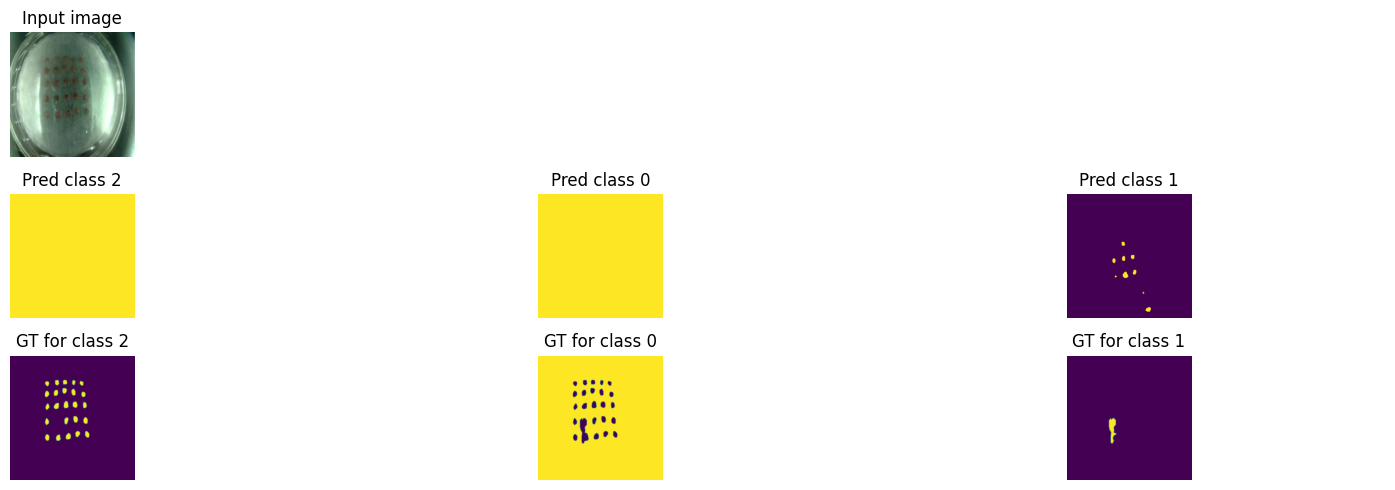

Train loss: 0.57000 | Time: 24m 55s | Val loss: 0.56888
Train_DICE_avg: 0.43709 | Train_Jaccard_avg: 0.38549 | Train_Sensitivity_avg: 0.40976 | Train_Specificity_avg: 0.99883 
Class 0 - Train_DICE: 0.96220 | Train_Jaccard: 0.92804 | Train_Sensitivity: 0.92804 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.28203 | Train_Jaccard: 0.19334 | Train_Sensitivity: 0.26615 | Train_Specificity: 0.99650 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.43968 | Val_Jaccard_avg: 0.39588 | Val_Sensitivity_avg: 0.41214 | Val_Specificity_avg: 0.99901 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.27471 | Val_Jaccard: 0.19447 | Val_Sensitivity: 0.24323 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.56768 | Time: 25m 53s | Val loss: 0.56720
Train_DICE_avg: 0.43931 | Train_Jaccard_avg: 0.38742 | Train_Sensitivity_avg: 0.41220 | Train_Specificity_avg: 0.99883 
Class 0 - Train_DICE: 0.96201 | Train_Jaccard: 0.92771 | Train_Sensitivity: 0.92771 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.28887 | Train_Jaccard: 0.19946 | Train_Sensitivity: 0.27379 | Train_Specificity: 0.99650 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.44092 | Val_Jaccard_avg: 0.39706 | Val_Sensitivity_avg: 0.41170 | Val_Specificity_avg: 0.99906 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.27844 | Val_Jaccard: 0.19799 | Val_Sensitivity: 0.24191 | Val_Specificity: 0.99719 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.56517 | Time: 26m 51s | Val loss: 0.56383
Train_DICE_avg: 0.44139 | Train_Jaccard_avg: 0.38929 | Train_Sensitivity_avg: 0.41480 | Train_Specificity_avg: 0.99886 
Class 0 - Train_DICE: 0.96189 | Train_Jaccard: 0.92749 | Train_Sensitivity: 0.92749 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.29523 | Train_Jaccard: 0.20529 | Train_Sensitivity: 0.28182 | Train_Specificity: 0.99657 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.44314 | Val_Jaccard_avg: 0.39934 | Val_Sensitivity_avg: 0.42098 | Val_Specificity_avg: 0.99897 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.28510 | Val_Jaccard: 0.20483 | Val_Sensitivity: 0.26976 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.56340 | Time: 27m 49s | Val loss: 0.56350
Train_DICE_avg: 0.44307 | Train_Jaccard_avg: 0.39124 | Train_Sensitivity_avg: 0.41720 | Train_Specificity_avg: 0.99886 
Class 0 - Train_DICE: 0.96262 | Train_Jaccard: 0.92881 | Train_Sensitivity: 0.92881 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.29958 | Train_Jaccard: 0.20983 | Train_Sensitivity: 0.28771 | Train_Specificity: 0.99657 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.44349 | Val_Jaccard_avg: 0.39988 | Val_Sensitivity_avg: 0.41856 | Val_Specificity_avg: 0.99900 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.28617 | Val_Jaccard: 0.20646 | Val_Sensitivity: 0.26250 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.56144 | Time: 28m 47s | Val loss: 0.56079
Train_DICE_avg: 0.44528 | Train_Jaccard_avg: 0.39324 | Train_Sensitivity_avg: 0.41969 | Train_Specificity_avg: 0.99888 
Class 0 - Train_DICE: 0.96268 | Train_Jaccard: 0.92891 | Train_Sensitivity: 0.92891 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.30613 | Train_Jaccard: 0.21572 | Train_Sensitivity: 0.29506 | Train_Specificity: 0.99665 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.44633 | Val_Jaccard_avg: 0.40263 | Val_Sensitivity_avg: 0.42206 | Val_Specificity_avg: 0.99900 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.29467 | Val_Jaccard: 0.21470 | Val_Sensitivity: 0.27300 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


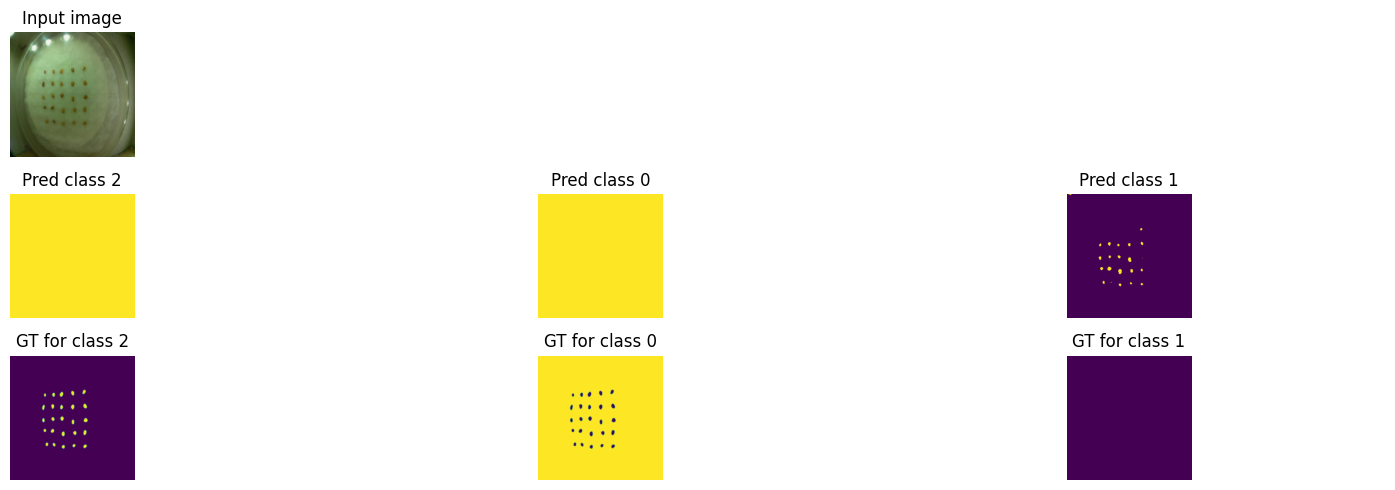

Train loss: 0.56002 | Time: 29m 46s | Val loss: 0.55952
Train_DICE_avg: 0.44620 | Train_Jaccard_avg: 0.39387 | Train_Sensitivity_avg: 0.42059 | Train_Specificity_avg: 0.99889 
Class 0 - Train_DICE: 0.96206 | Train_Jaccard: 0.92783 | Train_Sensitivity: 0.92783 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.30949 | Train_Jaccard: 0.21869 | Train_Sensitivity: 0.29885 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.44777 | Val_Jaccard_avg: 0.40428 | Val_Sensitivity_avg: 0.43070 | Val_Specificity_avg: 0.99891 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.29901 | Val_Jaccard: 0.21965 | Val_Sensitivity: 0.29892 | Val_Specificity: 0.99671 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.55796 | Time: 30m 44s | Val loss: 0.55700
Train_DICE_avg: 0.44898 | Train_Jaccard_avg: 0.39654 | Train_Sensitivity_avg: 0.42493 | Train_Specificity_avg: 0.99889 
Class 0 - Train_DICE: 0.96249 | Train_Jaccard: 0.92855 | Train_Sensitivity: 0.92855 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.31741 | Train_Jaccard: 0.22597 | Train_Sensitivity: 0.31115 | Train_Specificity: 0.99666 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.44981 | Val_Jaccard_avg: 0.40652 | Val_Sensitivity_avg: 0.42791 | Val_Specificity_avg: 0.99901 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.30512 | Val_Jaccard: 0.22638 | Val_Sensitivity: 0.29055 | Val_Specificity: 0.99704 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.55008 | Time: 31m 42s | Val loss: 0.52692
Train_DICE_avg: 0.46078 | Train_Jaccard_avg: 0.40920 | Train_Sensitivity_avg: 0.44434 | Train_Specificity_avg: 0.99888 
Class 0 - Train_DICE: 0.96262 | Train_Jaccard: 0.92885 | Train_Sensitivity: 0.92885 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.35268 | Train_Jaccard: 0.26365 | Train_Sensitivity: 0.36908 | Train_Specificity: 0.99665 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49311 | Val_Jaccard_avg: 0.45282 | Val_Sensitivity_avg: 0.50086 | Val_Specificity_avg: 0.99893 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.43501 | Val_Jaccard: 0.36527 | Val_Sensitivity: 0.50940 | Val_Specificity: 0.99680 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.53331 | Time: 32m 40s | Val loss: 0.51481
Train_DICE_avg: 0.48439 | Train_Jaccard_avg: 0.43522 | Train_Sensitivity_avg: 0.49045 | Train_Specificity_avg: 0.99878 
Class 0 - Train_DICE: 0.96247 | Train_Jaccard: 0.92856 | Train_Sensitivity: 0.92856 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.42368 | Train_Jaccard: 0.34201 | Train_Sensitivity: 0.50772 | Train_Specificity: 0.99634 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.49742 | Val_Jaccard_avg: 0.45812 | Val_Sensitivity_avg: 0.50587 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.44794 | Val_Jaccard: 0.38117 | Val_Sensitivity: 0.52443 | Val_Specificity: 0.99694 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.52347 | Time: 33m 37s | Val loss: 0.50629
Train_DICE_avg: 0.49809 | Train_Jaccard_avg: 0.44961 | Train_Sensitivity_avg: 0.50886 | Train_Specificity_avg: 0.99880 
Class 0 - Train_DICE: 0.96242 | Train_Jaccard: 0.92847 | Train_Sensitivity: 0.92847 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.46479 | Train_Jaccard: 0.38525 | Train_Sensitivity: 0.56303 | Train_Specificity: 0.99640 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.50341 | Val_Jaccard_avg: 0.46365 | Val_Sensitivity_avg: 0.51238 | Val_Specificity_avg: 0.99891 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.46591 | Val_Jaccard: 0.39775 | Val_Sensitivity: 0.54397 | Val_Specificity: 0.99674 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


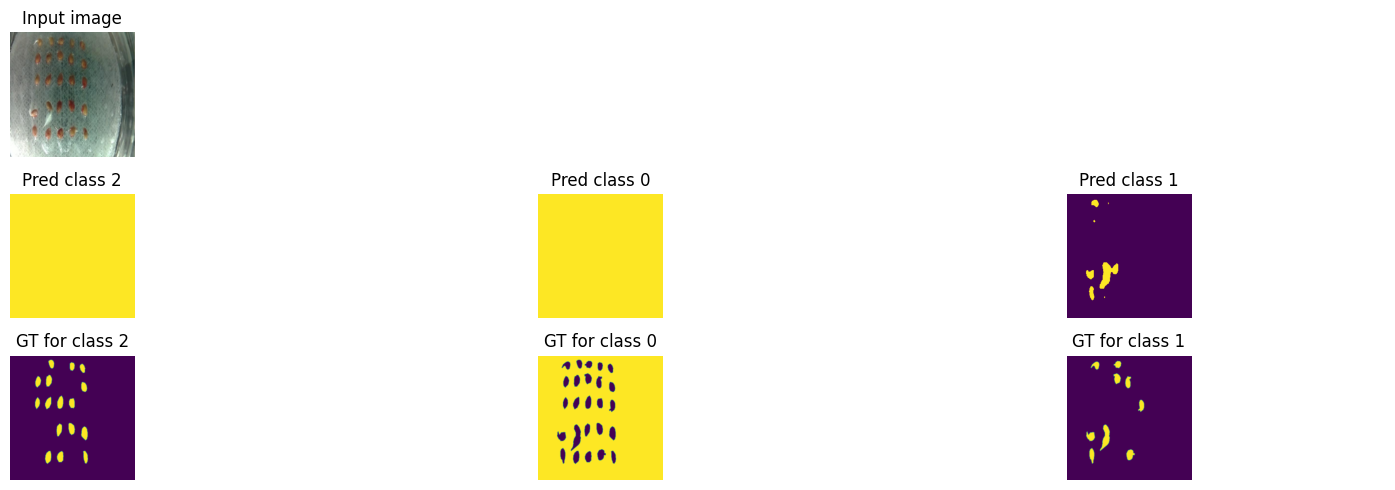

Train loss: 0.51709 | Time: 34m 36s | Val loss: 0.50288
Train_DICE_avg: 0.50328 | Train_Jaccard_avg: 0.45459 | Train_Sensitivity_avg: 0.51807 | Train_Specificity_avg: 0.99880 
Class 0 - Train_DICE: 0.96123 | Train_Jaccard: 0.92630 | Train_Sensitivity: 0.92630 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.48158 | Train_Jaccard: 0.40237 | Train_Sensitivity: 0.59282 | Train_Specificity: 0.99639 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.50587 | Val_Jaccard_avg: 0.46633 | Val_Sensitivity_avg: 0.51325 | Val_Specificity_avg: 0.99896 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.47329 | Val_Jaccard: 0.40580 | Val_Sensitivity: 0.54656 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.51289 | Time: 35m 34s | Val loss: 0.49809
Train_DICE_avg: 0.51099 | Train_Jaccard_avg: 0.46288 | Train_Sensitivity_avg: 0.52693 | Train_Specificity_avg: 0.99881 
Class 0 - Train_DICE: 0.96283 | Train_Jaccard: 0.92920 | Train_Sensitivity: 0.92920 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.50309 | Train_Jaccard: 0.42435 | Train_Sensitivity: 0.61650 | Train_Specificity: 0.99643 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.51769 | Val_Jaccard_avg: 0.47883 | Val_Sensitivity_avg: 0.53248 | Val_Specificity_avg: 0.99892 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.50877 | Val_Jaccard: 0.44330 | Val_Sensitivity: 0.60427 | Val_Specificity: 0.99677 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.50935 | Time: 36m 32s | Val loss: 0.47529
Train_DICE_avg: 0.51410 | Train_Jaccard_avg: 0.46620 | Train_Sensitivity_avg: 0.53222 | Train_Specificity_avg: 0.99880 
Class 0 - Train_DICE: 0.96275 | Train_Jaccard: 0.92904 | Train_Sensitivity: 0.92904 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.51252 | Train_Jaccard: 0.43449 | Train_Sensitivity: 0.63255 | Train_Specificity: 0.99640 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53310 | Val_Jaccard_avg: 0.49442 | Val_Sensitivity_avg: 0.55237 | Val_Specificity_avg: 0.99888 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.55498 | Val_Jaccard: 0.49009 | Val_Sensitivity: 0.66394 | Val_Specificity: 0.99663 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.50168 | Time: 37m 29s | Val loss: 0.47459
Train_DICE_avg: 0.52471 | Train_Jaccard_avg: 0.47702 | Train_Sensitivity_avg: 0.54668 | Train_Specificity_avg: 0.99880 
Class 0 - Train_DICE: 0.96214 | Train_Jaccard: 0.92796 | Train_Sensitivity: 0.92796 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.54496 | Train_Jaccard: 0.46801 | Train_Sensitivity: 0.67700 | Train_Specificity: 0.99641 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53275 | Val_Jaccard_avg: 0.49413 | Val_Sensitivity_avg: 0.54569 | Val_Specificity_avg: 0.99901 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.55393 | Val_Jaccard: 0.48922 | Val_Sensitivity: 0.64389 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.50030 | Time: 38m 27s | Val loss: 0.47092
Train_DICE_avg: 0.52663 | Train_Jaccard_avg: 0.47908 | Train_Sensitivity_avg: 0.54731 | Train_Specificity_avg: 0.99882 
Class 0 - Train_DICE: 0.96286 | Train_Jaccard: 0.92929 | Train_Sensitivity: 0.92929 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.55001 | Train_Jaccard: 0.47286 | Train_Sensitivity: 0.67757 | Train_Specificity: 0.99645 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53421 | Val_Jaccard_avg: 0.49528 | Val_Sensitivity_avg: 0.54558 | Val_Specificity_avg: 0.99900 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.55830 | Val_Jaccard: 0.49265 | Val_Sensitivity: 0.64357 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


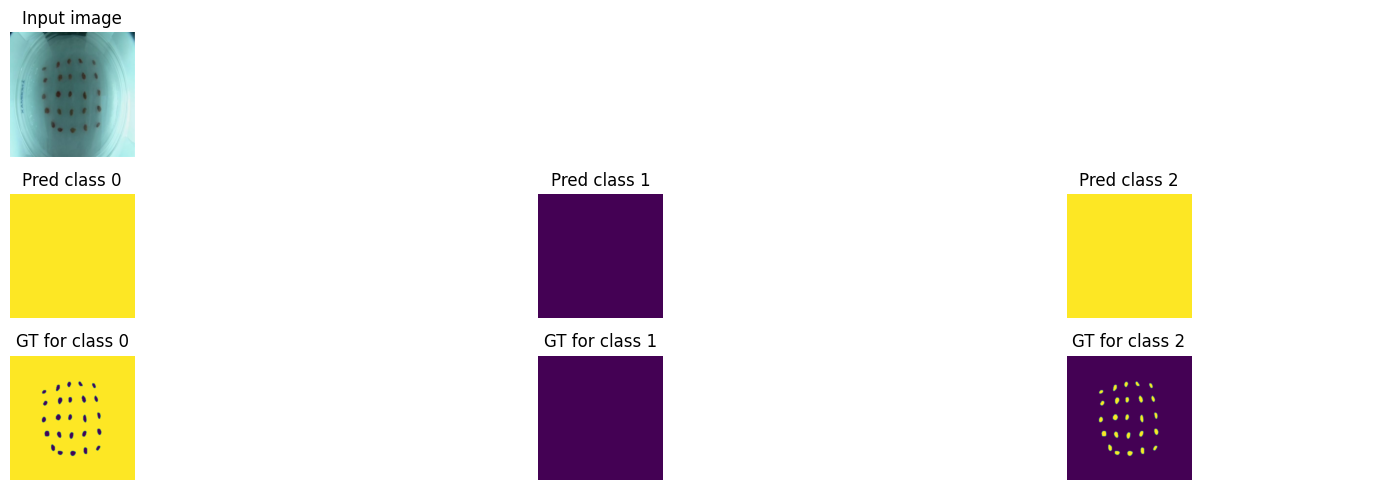

Train loss: 0.50020 | Time: 39m 25s | Val loss: 0.47082
Train_DICE_avg: 0.52608 | Train_Jaccard_avg: 0.47816 | Train_Sensitivity_avg: 0.54352 | Train_Specificity_avg: 0.99883 
Class 0 - Train_DICE: 0.96256 | Train_Jaccard: 0.92872 | Train_Sensitivity: 0.92872 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.54863 | Train_Jaccard: 0.47066 | Train_Sensitivity: 0.66674 | Train_Specificity: 0.99650 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03510 | Train_Sensitivity: 0.03510 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53522 | Val_Jaccard_avg: 0.49637 | Val_Sensitivity_avg: 0.54806 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56135 | Val_Jaccard: 0.49593 | Val_Sensitivity: 0.65101 | Val_Specificity: 0.99694 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.49459 | Time: 40m 23s | Val loss: 0.46987
Train_DICE_avg: 0.52976 | Train_Jaccard_avg: 0.48154 | Train_Sensitivity_avg: 0.54715 | Train_Specificity_avg: 0.99885 
Class 0 - Train_DICE: 0.96215 | Train_Jaccard: 0.92793 | Train_Sensitivity: 0.92793 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.56007 | Train_Jaccard: 0.48159 | Train_Sensitivity: 0.67843 | Train_Specificity: 0.99654 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03510 | Train_Sensitivity: 0.03510 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53498 | Val_Jaccard_avg: 0.49637 | Val_Sensitivity_avg: 0.54783 | Val_Specificity_avg: 0.99895 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56063 | Val_Jaccard: 0.49593 | Val_Sensitivity: 0.65031 | Val_Specificity: 0.99686 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.49588 | Time: 41m 21s | Val loss: 0.46861
Train_DICE_avg: 0.52964 | Train_Jaccard_avg: 0.48181 | Train_Sensitivity_avg: 0.54923 | Train_Specificity_avg: 0.99884 
Class 0 - Train_DICE: 0.96224 | Train_Jaccard: 0.92810 | Train_Sensitivity: 0.92810 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.55966 | Train_Jaccard: 0.48224 | Train_Sensitivity: 0.68451 | Train_Specificity: 0.99652 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53636 | Val_Jaccard_avg: 0.49752 | Val_Sensitivity_avg: 0.54812 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56476 | Val_Jaccard: 0.49937 | Val_Sensitivity: 0.65117 | Val_Specificity: 0.99695 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.49737 | Time: 42m 19s | Val loss: 0.46847
Train_DICE_avg: 0.53028 | Train_Jaccard_avg: 0.48221 | Train_Sensitivity_avg: 0.54852 | Train_Specificity_avg: 0.99885 
Class 0 - Train_DICE: 0.96246 | Train_Jaccard: 0.92853 | Train_Sensitivity: 0.92853 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.56138 | Train_Jaccard: 0.48303 | Train_Sensitivity: 0.68196 | Train_Specificity: 0.99656 
Class 2 - Train_DICE: 0.06701 | Train_Jaccard: 0.03507 | Train_Sensitivity: 0.03507 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53651 | Val_Jaccard_avg: 0.49753 | Val_Sensitivity_avg: 0.54629 | Val_Specificity_avg: 0.99902 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56521 | Val_Jaccard: 0.49939 | Val_Sensitivity: 0.64570 | Val_Specificity: 0.99706 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.49578 | Time: 43m 16s | Val loss: 0.46775
Train_DICE_avg: 0.53116 | Train_Jaccard_avg: 0.48291 | Train_Sensitivity_avg: 0.54708 | Train_Specificity_avg: 0.99886 
Class 0 - Train_DICE: 0.96249 | Train_Jaccard: 0.92859 | Train_Sensitivity: 0.92859 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.56393 | Train_Jaccard: 0.48504 | Train_Sensitivity: 0.67755 | Train_Specificity: 0.99659 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03510 | Train_Sensitivity: 0.03510 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53693 | Val_Jaccard_avg: 0.49793 | Val_Sensitivity_avg: 0.54828 | Val_Specificity_avg: 0.99899 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56647 | Val_Jaccard: 0.50062 | Val_Sensitivity: 0.65164 | Val_Specificity: 0.99696 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


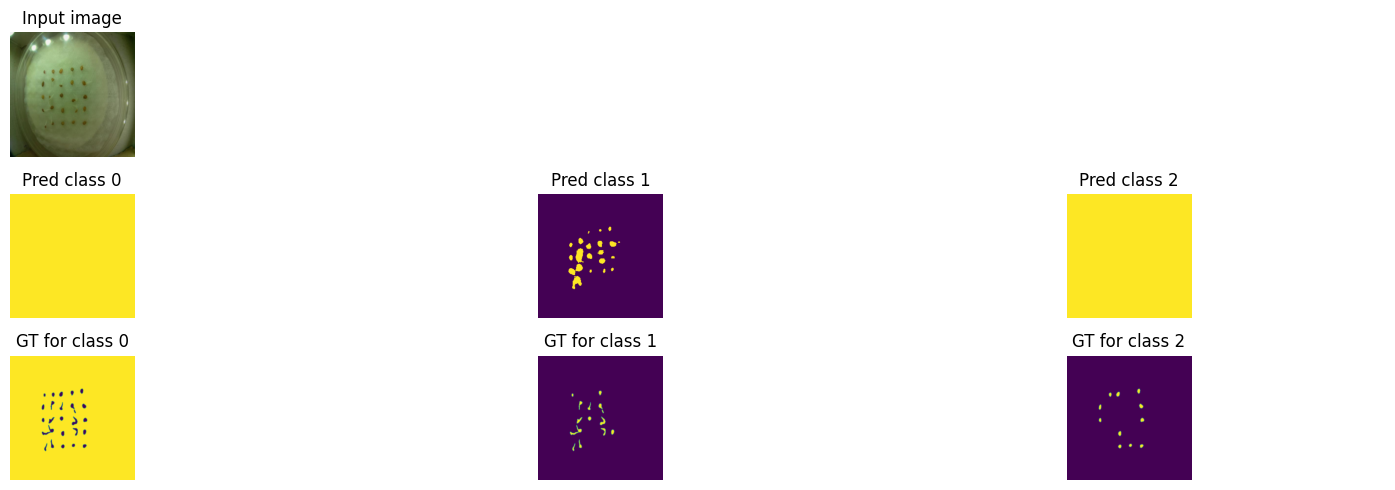

Train loss: 0.49416 | Time: 44m 15s | Val loss: 0.46802
Train_DICE_avg: 0.53169 | Train_Jaccard_avg: 0.48335 | Train_Sensitivity_avg: 0.54696 | Train_Specificity_avg: 0.99888 
Class 0 - Train_DICE: 0.96195 | Train_Jaccard: 0.92759 | Train_Sensitivity: 0.92759 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.56610 | Train_Jaccard: 0.48738 | Train_Sensitivity: 0.67822 | Train_Specificity: 0.99663 
Class 2 - Train_DICE: 0.06702 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53821 | Val_Jaccard_avg: 0.49888 | Val_Sensitivity_avg: 0.54697 | Val_Specificity_avg: 0.99903 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57032 | Val_Jaccard: 0.50346 | Val_Sensitivity: 0.64772 | Val_Specificity: 0.99710 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.49162 | Time: 45m 13s | Val loss: 0.46873
Train_DICE_avg: 0.53128 | Train_Jaccard_avg: 0.48276 | Train_Sensitivity_avg: 0.54617 | Train_Specificity_avg: 0.99887 
Class 0 - Train_DICE: 0.96176 | Train_Jaccard: 0.92724 | Train_Sensitivity: 0.92724 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.56505 | Train_Jaccard: 0.48597 | Train_Sensitivity: 0.67619 | Train_Specificity: 0.99661 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53760 | Val_Jaccard_avg: 0.49819 | Val_Sensitivity_avg: 0.54709 | Val_Specificity_avg: 0.99900 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56850 | Val_Jaccard: 0.50140 | Val_Sensitivity: 0.64809 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.49317 | Time: 46m 10s | Val loss: 0.46941
Train_DICE_avg: 0.53230 | Train_Jaccard_avg: 0.48400 | Train_Sensitivity_avg: 0.54937 | Train_Specificity_avg: 0.99887 
Class 0 - Train_DICE: 0.96214 | Train_Jaccard: 0.92795 | Train_Sensitivity: 0.92795 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.56771 | Train_Jaccard: 0.48894 | Train_Sensitivity: 0.68505 | Train_Specificity: 0.99660 
Class 2 - Train_DICE: 0.06706 | Train_Jaccard: 0.03510 | Train_Sensitivity: 0.03510 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53588 | Val_Jaccard_avg: 0.49690 | Val_Sensitivity_avg: 0.54654 | Val_Specificity_avg: 0.99901 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56332 | Val_Jaccard: 0.49752 | Val_Sensitivity: 0.64645 | Val_Specificity: 0.99704 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.49163 | Time: 47m 8s | Val loss: 0.46817
Train_DICE_avg: 0.53357 | Train_Jaccard_avg: 0.48513 | Train_Sensitivity_avg: 0.54776 | Train_Specificity_avg: 0.99889 
Class 0 - Train_DICE: 0.96216 | Train_Jaccard: 0.92796 | Train_Sensitivity: 0.92796 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.57152 | Train_Jaccard: 0.49236 | Train_Sensitivity: 0.68025 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53734 | Val_Jaccard_avg: 0.49801 | Val_Sensitivity_avg: 0.54717 | Val_Specificity_avg: 0.99896 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56772 | Val_Jaccard: 0.50084 | Val_Sensitivity: 0.64833 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.48986 | Time: 48m 6s | Val loss: 0.46832
Train_DICE_avg: 0.53425 | Train_Jaccard_avg: 0.48608 | Train_Sensitivity_avg: 0.55108 | Train_Specificity_avg: 0.99887 
Class 0 - Train_DICE: 0.96229 | Train_Jaccard: 0.92819 | Train_Sensitivity: 0.92819 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.57343 | Train_Jaccard: 0.49498 | Train_Sensitivity: 0.68996 | Train_Specificity: 0.99660 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53767 | Val_Jaccard_avg: 0.49874 | Val_Sensitivity_avg: 0.54908 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.56870 | Val_Jaccard: 0.50304 | Val_Sensitivity: 0.65407 | Val_Specificity: 0.99695 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


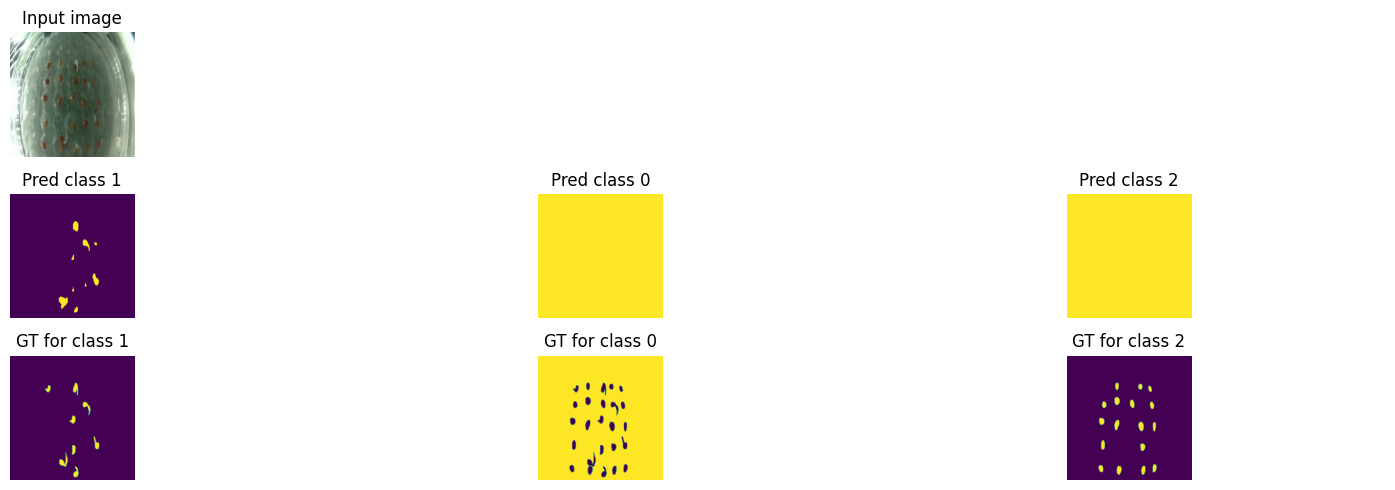

Train loss: 0.49118 | Time: 49m 5s | Val loss: 0.46779
Train_DICE_avg: 0.53483 | Train_Jaccard_avg: 0.48646 | Train_Sensitivity_avg: 0.55006 | Train_Specificity_avg: 0.99888 
Class 0 - Train_DICE: 0.96208 | Train_Jaccard: 0.92784 | Train_Sensitivity: 0.92784 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.57538 | Train_Jaccard: 0.49646 | Train_Sensitivity: 0.68725 | Train_Specificity: 0.99663 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53840 | Val_Jaccard_avg: 0.49929 | Val_Sensitivity_avg: 0.54984 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57087 | Val_Jaccard: 0.50468 | Val_Sensitivity: 0.65635 | Val_Specificity: 0.99693 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.49146 | Time: 50m 4s | Val loss: 0.46655
Train_DICE_avg: 0.53440 | Train_Jaccard_avg: 0.48602 | Train_Sensitivity_avg: 0.54848 | Train_Specificity_avg: 0.99888 
Class 0 - Train_DICE: 0.96237 | Train_Jaccard: 0.92832 | Train_Sensitivity: 0.92832 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.57379 | Train_Jaccard: 0.49465 | Train_Sensitivity: 0.68204 | Train_Specificity: 0.99665 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53919 | Val_Jaccard_avg: 0.49988 | Val_Sensitivity_avg: 0.55043 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57326 | Val_Jaccard: 0.50645 | Val_Sensitivity: 0.65811 | Val_Specificity: 0.99693 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.49037 | Time: 51m 2s | Val loss: 0.46655
Train_DICE_avg: 0.53499 | Train_Jaccard_avg: 0.48666 | Train_Sensitivity_avg: 0.55101 | Train_Specificity_avg: 0.99888 
Class 0 - Train_DICE: 0.96261 | Train_Jaccard: 0.92878 | Train_Sensitivity: 0.92878 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.57533 | Train_Jaccard: 0.49611 | Train_Sensitivity: 0.68915 | Train_Specificity: 0.99664 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53863 | Val_Jaccard_avg: 0.49932 | Val_Sensitivity_avg: 0.55000 | Val_Specificity_avg: 0.99897 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57159 | Val_Jaccard: 0.50478 | Val_Sensitivity: 0.65681 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.48989 | Time: 51m 59s | Val loss: 0.46683
Train_DICE_avg: 0.53688 | Train_Jaccard_avg: 0.48852 | Train_Sensitivity_avg: 0.55218 | Train_Specificity_avg: 0.99890 
Class 0 - Train_DICE: 0.96246 | Train_Jaccard: 0.92852 | Train_Sensitivity: 0.92852 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.58112 | Train_Jaccard: 0.50194 | Train_Sensitivity: 0.69293 | Train_Specificity: 0.99670 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53823 | Val_Jaccard_avg: 0.49897 | Val_Sensitivity_avg: 0.55058 | Val_Specificity_avg: 0.99897 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57038 | Val_Jaccard: 0.50374 | Val_Sensitivity: 0.65855 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.48886 | Time: 52m 58s | Val loss: 0.46595
Train_DICE_avg: 0.53609 | Train_Jaccard_avg: 0.48773 | Train_Sensitivity_avg: 0.55128 | Train_Specificity_avg: 0.99889 
Class 0 - Train_DICE: 0.96275 | Train_Jaccard: 0.92903 | Train_Sensitivity: 0.92903 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.57849 | Train_Jaccard: 0.49906 | Train_Sensitivity: 0.68973 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53978 | Val_Jaccard_avg: 0.50040 | Val_Sensitivity_avg: 0.55010 | Val_Specificity_avg: 0.99899 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57501 | Val_Jaccard: 0.50802 | Val_Sensitivity: 0.65713 | Val_Specificity: 0.99696 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


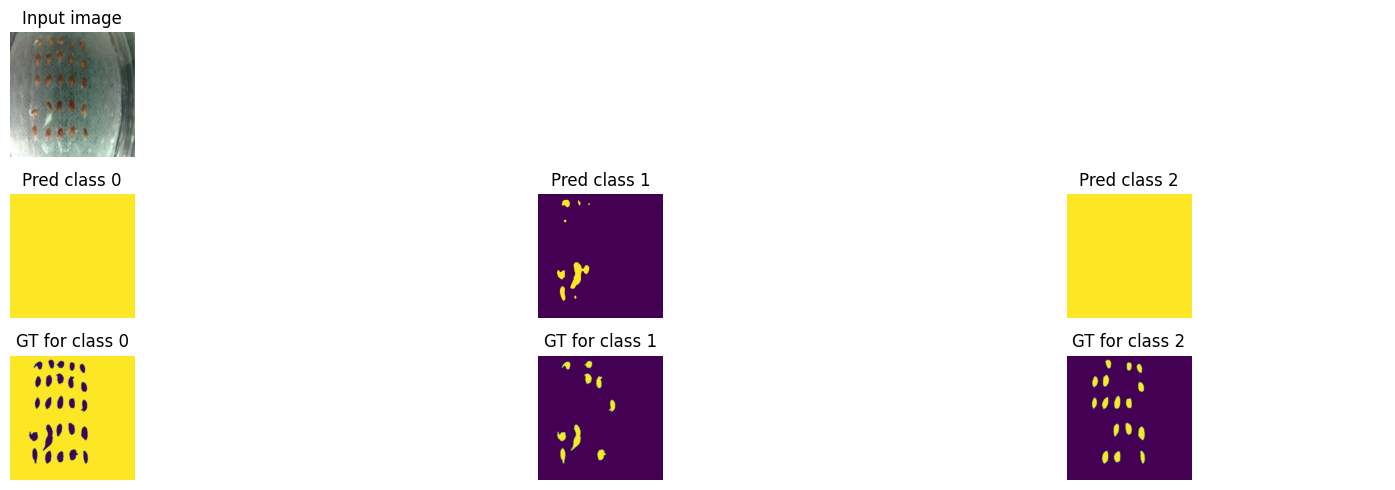

Train loss: 0.48895 | Time: 53m 57s | Val loss: 0.46609
Train_DICE_avg: 0.53730 | Train_Jaccard_avg: 0.48865 | Train_Sensitivity_avg: 0.55131 | Train_Specificity_avg: 0.99890 
Class 0 - Train_DICE: 0.96225 | Train_Jaccard: 0.92812 | Train_Sensitivity: 0.92812 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.58265 | Train_Jaccard: 0.50275 | Train_Sensitivity: 0.69073 | Train_Specificity: 0.99670 
Class 2 - Train_DICE: 0.06701 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53860 | Val_Jaccard_avg: 0.49922 | Val_Sensitivity_avg: 0.54819 | Val_Specificity_avg: 0.99900 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57148 | Val_Jaccard: 0.50447 | Val_Sensitivity: 0.65139 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.48607 | Time: 54m 55s | Val loss: 0.46572
Train_DICE_avg: 0.53765 | Train_Jaccard_avg: 0.48887 | Train_Sensitivity_avg: 0.55105 | Train_Specificity_avg: 0.99890 
Class 0 - Train_DICE: 0.96165 | Train_Jaccard: 0.92701 | Train_Sensitivity: 0.92701 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.58425 | Train_Jaccard: 0.50449 | Train_Sensitivity: 0.69104 | Train_Specificity: 0.99671 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.53991 | Val_Jaccard_avg: 0.50048 | Val_Sensitivity_avg: 0.55098 | Val_Specificity_avg: 0.99899 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57540 | Val_Jaccard: 0.50827 | Val_Sensitivity: 0.65974 | Val_Specificity: 0.99696 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.48890 | Time: 55m 53s | Val loss: 0.46471
Train_DICE_avg: 0.53728 | Train_Jaccard_avg: 0.48877 | Train_Sensitivity_avg: 0.55188 | Train_Specificity_avg: 0.99889 
Class 0 - Train_DICE: 0.96197 | Train_Jaccard: 0.92760 | Train_Sensitivity: 0.92760 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.58286 | Train_Jaccard: 0.50364 | Train_Sensitivity: 0.69295 | Train_Specificity: 0.99668 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03508 | Train_Sensitivity: 0.03508 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.54007 | Val_Jaccard_avg: 0.50074 | Val_Sensitivity_avg: 0.55344 | Val_Specificity_avg: 0.99897 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57589 | Val_Jaccard: 0.50904 | Val_Sensitivity: 0.66714 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.48708 | Time: 56m 52s | Val loss: 0.46558
Train_DICE_avg: 0.53853 | Train_Jaccard_avg: 0.49005 | Train_Sensitivity_avg: 0.55355 | Train_Specificity_avg: 0.99891 
Class 0 - Train_DICE: 0.96215 | Train_Jaccard: 0.92794 | Train_Sensitivity: 0.92794 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.58641 | Train_Jaccard: 0.50711 | Train_Sensitivity: 0.69763 | Train_Specificity: 0.99673 
Class 2 - Train_DICE: 0.06705 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.54020 | Val_Jaccard_avg: 0.50086 | Val_Sensitivity_avg: 0.54994 | Val_Specificity_avg: 0.99902 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57628 | Val_Jaccard: 0.50938 | Val_Sensitivity: 0.65664 | Val_Specificity: 0.99706 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.48827 | Time: 57m 50s | Val loss: 0.46500
Train_DICE_avg: 0.53898 | Train_Jaccard_avg: 0.49030 | Train_Sensitivity_avg: 0.55277 | Train_Specificity_avg: 0.99891 
Class 0 - Train_DICE: 0.96236 | Train_Jaccard: 0.92834 | Train_Sensitivity: 0.92834 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.58754 | Train_Jaccard: 0.50748 | Train_Sensitivity: 0.69489 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.06704 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.54033 | Val_Jaccard_avg: 0.50098 | Val_Sensitivity_avg: 0.55115 | Val_Specificity_avg: 0.99900 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57666 | Val_Jaccard: 0.50975 | Val_Sensitivity: 0.66028 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


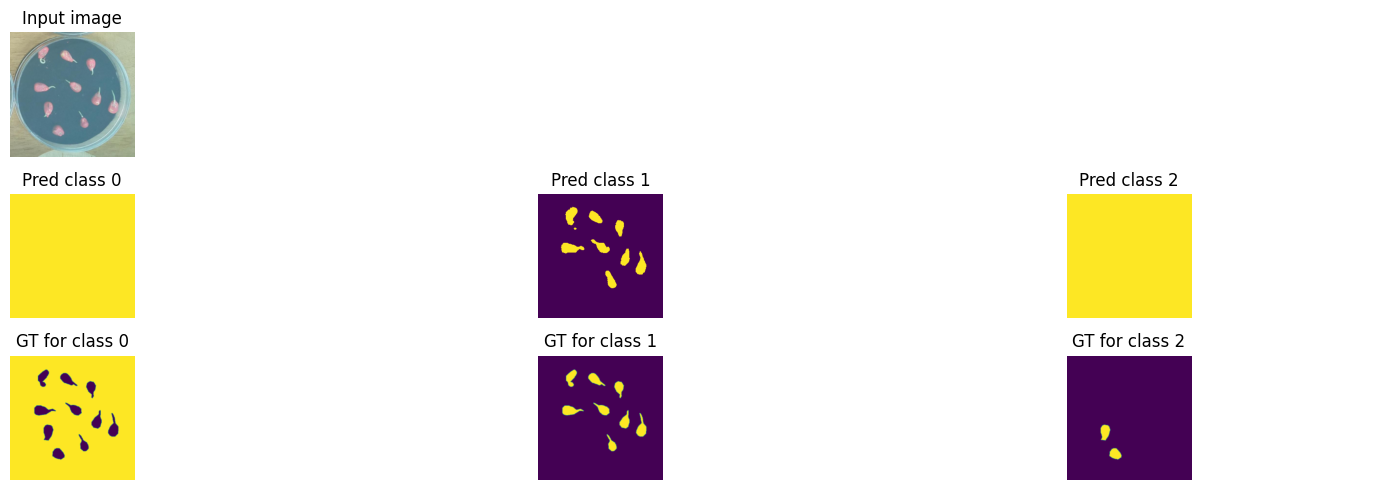

Train loss: 0.48604 | Time: 58m 49s | Val loss: 0.46459
Train_DICE_avg: 0.53812 | Train_Jaccard_avg: 0.48961 | Train_Sensitivity_avg: 0.55261 | Train_Specificity_avg: 0.99889 
Class 0 - Train_DICE: 0.96187 | Train_Jaccard: 0.92742 | Train_Sensitivity: 0.92742 | Train_Specificity: 0.99997 
Class 1 - Train_DICE: 0.58546 | Train_Jaccard: 0.50633 | Train_Sensitivity: 0.69532 | Train_Specificity: 0.99669 
Class 2 - Train_DICE: 0.06703 | Train_Jaccard: 0.03509 | Train_Sensitivity: 0.03509 | Train_Specificity: 1.00000 
Val_DICE_avg: 0.54026 | Val_Jaccard_avg: 0.50086 | Val_Sensitivity_avg: 0.54957 | Val_Specificity_avg: 0.99904 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.57645 | Val_Jaccard: 0.50941 | Val_Sensitivity: 0.65554 | Val_Specificity: 0.99711 
Class 2 - Val_DICE: 0.06544 | Val_Jaccard: 0.03426 | Val_Sensitivity: 0.03426 | Val_Specificity: 1.00000 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 77.8MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]


Global Performance Metrics:
Loss mean: 0.47080, std: 0.01310
Dice Coefficient mean: 0.53010, std: 0.12631
Jaccard Index mean: 0.48996, std: 0.12731
Sensitivity mean: 0.89599, std: 0.11839
Specificity mean: 0.33207, std: 0.00202

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.97833, std: 0.01195
Jaccard mean: 0.95785, std: 0.02280
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.00055, std: 0.00044

Class 1:
Dice mean: 0.54836, std: 0.38342
Jaccard mean: 0.47875, std: 0.38156
Sensitivity mean: 0.68798, std: 0.35517
Specificity mean: 0.99563, std: 0.00591

Class 2:
Dice mean: 0.06362, std: 0.03908
Jaccard mean: 0.03329, std: 0.02098
Sensitivity mean: 1.00000, std: 0.00000
Specificity mean: 0.00002, std: 0.00000


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-FCN-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.47 GB
GPU Memory - Reserved: 4.33 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


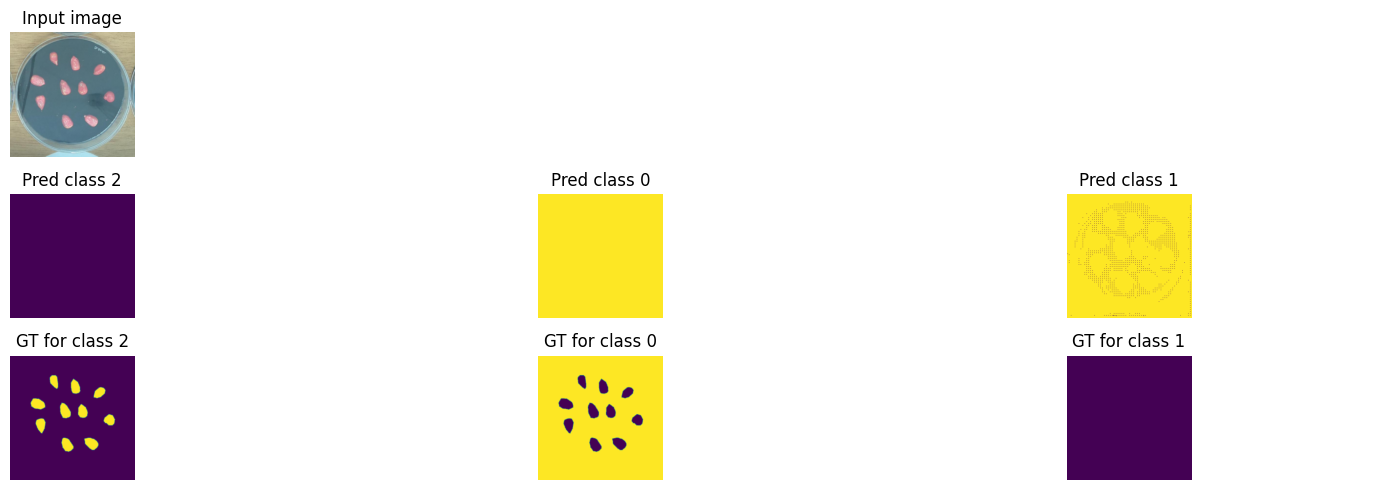

Train loss: 0.63307 | Time: 0m 57s | Val loss: 0.54111
Train_DICE_avg: 0.10079 | Train_Jaccard_avg: 0.08174 | Train_Sensitivity_avg: 0.71002 | Train_Specificity_avg: 0.67371 
Class 0 - Train_DICE: 0.23130 | Train_Jaccard: 0.17678 | Train_Sensitivity: 0.89807 | Train_Specificity: 0.07681 
Class 1 - Train_DICE: 0.07028 | Train_Jaccard: 0.06762 | Train_Sensitivity: 0.23321 | Train_Specificity: 0.98522 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 0.99879 | Train_Specificity: 0.95910 
Val_DICE_avg: 0.45194 | Val_Jaccard_avg: 0.42303 | Val_Sensitivity_avg: 0.99665 | Val_Specificity_avg: 0.68448 
Class 0 - Val_DICE: 0.88756 | Val_Jaccard: 0.80083 | Val_Sensitivity: 0.98994 | Val_Specificity: 0.10956 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95555 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.47152 | Time: 1m 54s | Val loss: 0.38315
Train_DICE_avg: 0.41398 | Train_Jaccard_avg: 0.40169 | Train_Sensitivity_avg: 0.98044 | Train_Specificity_avg: 0.77178 
Class 0 - Train_DICE: 0.95861 | Train_Jaccard: 0.92173 | Train_Sensitivity: 0.94131 | Train_Specificity: 0.37047 
Class 1 - Train_DICE: 0.28253 | Train_Jaccard: 0.28253 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95920 
Val_DICE_avg: 0.48428 | Val_Jaccard_avg: 0.47936 | Val_Sensitivity_avg: 0.99029 | Val_Specificity_avg: 0.75782 
Class 0 - Val_DICE: 0.98459 | Val_Jaccard: 0.96984 | Val_Sensitivity: 0.97086 | Val_Specificity: 0.32955 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95557 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.35476 | Time: 2m 50s | Val loss: 0.28552
Train_DICE_avg: 0.41649 | Train_Jaccard_avg: 0.40649 | Train_Sensitivity_avg: 0.97929 | Train_Specificity_avg: 0.88188 
Class 0 - Train_DICE: 0.96693 | Train_Jaccard: 0.93694 | Train_Sensitivity: 0.93788 | Train_Specificity: 0.70069 
Class 1 - Train_DICE: 0.28172 | Train_Jaccard: 0.28172 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95925 
Val_DICE_avg: 0.48502 | Val_Jaccard_avg: 0.48079 | Val_Sensitivity_avg: 0.99196 | Val_Specificity_avg: 0.90685 
Class 0 - Val_DICE: 0.98682 | Val_Jaccard: 0.97411 | Val_Sensitivity: 0.97589 | Val_Specificity: 0.77666 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95557 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.27195 | Time: 3m 46s | Val loss: 0.21512
Train_DICE_avg: 0.41540 | Train_Jaccard_avg: 0.40613 | Train_Sensitivity_avg: 0.98089 | Train_Specificity_avg: 0.94589 
Class 0 - Train_DICE: 0.96946 | Train_Jaccard: 0.94167 | Train_Sensitivity: 0.94266 | Train_Specificity: 0.89347 
Class 1 - Train_DICE: 0.27593 | Train_Jaccard: 0.27593 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98525 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95895 
Val_DICE_avg: 0.48553 | Val_Jaccard_avg: 0.48177 | Val_Sensitivity_avg: 0.99278 | Val_Specificity_avg: 0.94497 
Class 0 - Val_DICE: 0.98835 | Val_Jaccard: 0.97707 | Val_Sensitivity: 0.97833 | Val_Specificity: 0.89101 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.21655 | Time: 4m 43s | Val loss: 0.16934
Train_DICE_avg: 0.41725 | Train_Jaccard_avg: 0.40804 | Train_Sensitivity_avg: 0.98088 | Train_Specificity_avg: 0.96172 
Class 0 - Train_DICE: 0.96963 | Train_Jaccard: 0.94199 | Train_Sensitivity: 0.94264 | Train_Specificity: 0.93990 
Class 1 - Train_DICE: 0.28132 | Train_Jaccard: 0.28132 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98585 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95941 
Val_DICE_avg: 0.48570 | Val_Jaccard_avg: 0.48209 | Val_Sensitivity_avg: 0.99294 | Val_Specificity_avg: 0.95580 
Class 0 - Val_DICE: 0.98884 | Val_Jaccard: 0.97802 | Val_Sensitivity: 0.97881 | Val_Specificity: 0.92349 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


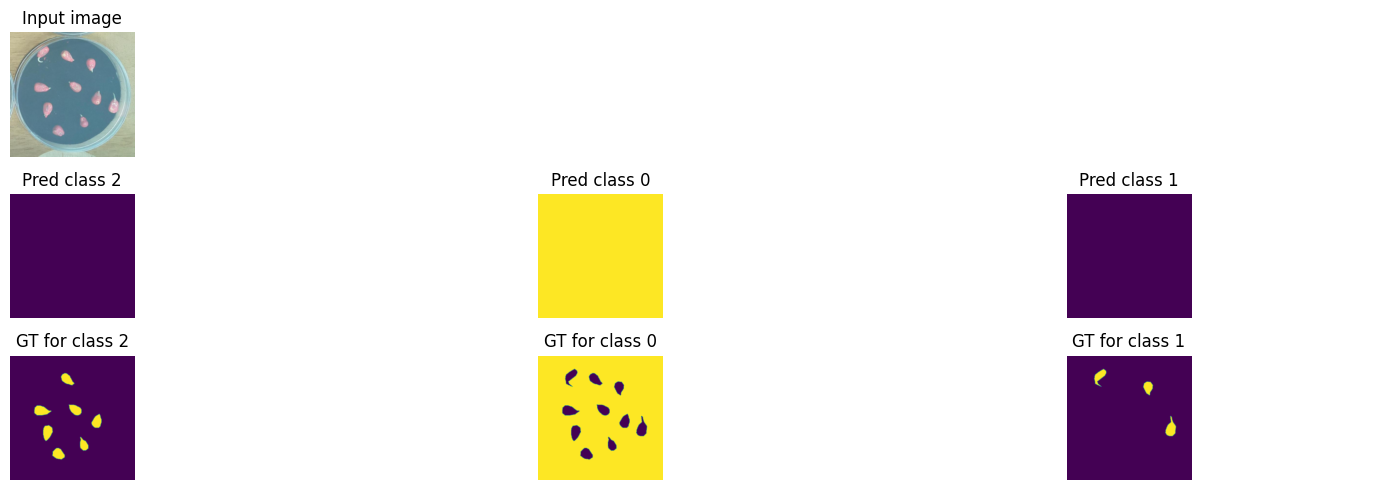

Train loss: 0.17908 | Time: 5m 40s | Val loss: 0.13867
Train_DICE_avg: 0.41719 | Train_Jaccard_avg: 0.40804 | Train_Sensitivity_avg: 0.98097 | Train_Specificity_avg: 0.96589 
Class 0 - Train_DICE: 0.96985 | Train_Jaccard: 0.94241 | Train_Sensitivity: 0.94291 | Train_Specificity: 0.95264 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95923 
Val_DICE_avg: 0.48566 | Val_Jaccard_avg: 0.48202 | Val_Sensitivity_avg: 0.99279 | Val_Specificity_avg: 0.95645 
Class 0 - Val_DICE: 0.98872 | Val_Jaccard: 0.97780 | Val_Sensitivity: 0.97836 | Val_Specificity: 0.92545 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95557 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.15188 | Time: 6m 36s | Val loss: 0.11601
Train_DICE_avg: 0.41529 | Train_Jaccard_avg: 0.40666 | Train_Sensitivity_avg: 0.98212 | Train_Specificity_avg: 0.96286 
Class 0 - Train_DICE: 0.97163 | Train_Jaccard: 0.94574 | Train_Sensitivity: 0.94636 | Train_Specificity: 0.94389 
Class 1 - Train_DICE: 0.27343 | Train_Jaccard: 0.27343 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95909 
Val_DICE_avg: 0.48602 | Val_Jaccard_avg: 0.48271 | Val_Sensitivity_avg: 0.99353 | Val_Specificity_avg: 0.95269 
Class 0 - Val_DICE: 0.98980 | Val_Jaccard: 0.97988 | Val_Sensitivity: 0.98059 | Val_Specificity: 0.91416 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.13294 | Time: 7m 32s | Val loss: 0.09875
Train_DICE_avg: 0.41984 | Train_Jaccard_avg: 0.41176 | Train_Sensitivity_avg: 0.98367 | Train_Specificity_avg: 0.95168 
Class 0 - Train_DICE: 0.97353 | Train_Jaccard: 0.94928 | Train_Sensitivity: 0.95101 | Train_Specificity: 0.90943 
Class 1 - Train_DICE: 0.28519 | Train_Jaccard: 0.28519 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98602 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95961 
Val_DICE_avg: 0.48723 | Val_Jaccard_avg: 0.48509 | Val_Sensitivity_avg: 0.99669 | Val_Specificity_avg: 0.92596 
Class 0 - Val_DICE: 0.99345 | Val_Jaccard: 0.98702 | Val_Sensitivity: 0.99006 | Val_Specificity: 0.83399 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.11563 | Time: 8m 29s | Val loss: 0.08741
Train_DICE_avg: 0.42112 | Train_Jaccard_avg: 0.41413 | Train_Sensitivity_avg: 0.98713 | Train_Specificity_avg: 0.92676 
Class 0 - Train_DICE: 0.97737 | Train_Jaccard: 0.95641 | Train_Sensitivity: 0.96139 | Train_Specificity: 0.83513 
Class 1 - Train_DICE: 0.28519 | Train_Jaccard: 0.28519 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98582 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95932 
Val_DICE_avg: 0.48717 | Val_Jaccard_avg: 0.48496 | Val_Sensitivity_avg: 0.99836 | Val_Specificity_avg: 0.88289 
Class 0 - Val_DICE: 0.99325 | Val_Jaccard: 0.98662 | Val_Sensitivity: 0.99509 | Val_Specificity: 0.70477 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.10225 | Time: 9m 25s | Val loss: 0.07766
Train_DICE_avg: 0.46097 | Train_Jaccard_avg: 0.43842 | Train_Sensitivity_avg: 0.96399 | Train_Specificity_avg: 0.90866 
Class 0 - Train_DICE: 0.97910 | Train_Jaccard: 0.95956 | Train_Sensitivity: 0.96803 | Train_Specificity: 0.77729 
Class 1 - Train_DICE: 0.28156 | Train_Jaccard: 0.28156 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.12224 | Train_Jaccard: 0.07413 | Train_Sensitivity: 0.92393 | Train_Specificity: 0.96302 
Val_DICE_avg: 0.56957 | Val_Jaccard_avg: 0.53519 | Val_Sensitivity_avg: 0.96120 | Val_Specificity_avg: 0.86161 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99655 | Val_Specificity: 0.63195 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.24855 | Val_Jaccard: 0.15333 | Val_Sensitivity: 0.88703 | Val_Specificity: 0.96454 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


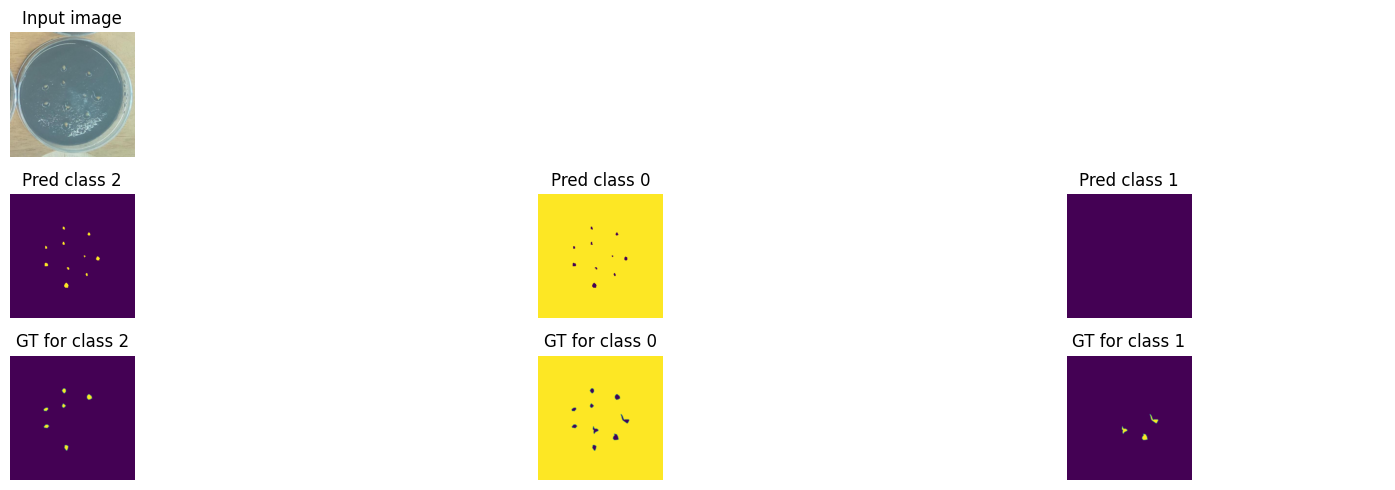

Train loss: 0.08663 | Time: 10m 24s | Val loss: 0.05798
Train_DICE_avg: 0.56674 | Train_Jaccard_avg: 0.51483 | Train_Sensitivity_avg: 0.93506 | Train_Specificity_avg: 0.90723 
Class 0 - Train_DICE: 0.97998 | Train_Jaccard: 0.96115 | Train_Sensitivity: 0.97097 | Train_Specificity: 0.76205 
Class 1 - Train_DICE: 0.27729 | Train_Jaccard: 0.27729 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98560 
Class 2 - Train_DICE: 0.44295 | Train_Jaccard: 0.30605 | Train_Sensitivity: 0.83422 | Train_Specificity: 0.97405 
Val_DICE_avg: 0.64877 | Val_Jaccard_avg: 0.59696 | Val_Sensitivity_avg: 0.95549 | Val_Specificity_avg: 0.85790 
Class 0 - Val_DICE: 0.99142 | Val_Jaccard: 0.98303 | Val_Sensitivity: 0.99701 | Val_Specificity: 0.61124 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.48664 | Val_Jaccard: 0.33958 | Val_Sensitivity: 0.86945 | Val_Specificity: 0.97411 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.07344 | Time: 11m 21s | Val loss: 0.04938
Train_DICE_avg: 0.60667 | Train_Jaccard_avg: 0.55083 | Train_Sensitivity_avg: 0.92296 | Train_Specificity_avg: 0.90406 
Class 0 - Train_DICE: 0.98109 | Train_Jaccard: 0.96319 | Train_Sensitivity: 0.97458 | Train_Specificity: 0.74694 
Class 1 - Train_DICE: 0.27649 | Train_Jaccard: 0.27649 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.56242 | Train_Jaccard: 0.41281 | Train_Sensitivity: 0.79431 | Train_Specificity: 0.97954 
Val_DICE_avg: 0.67496 | Val_Jaccard_avg: 0.62046 | Val_Sensitivity_avg: 0.95332 | Val_Specificity_avg: 0.85117 
Class 0 - Val_DICE: 0.99075 | Val_Jaccard: 0.98173 | Val_Sensitivity: 0.99735 | Val_Specificity: 0.58764 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56589 | Val_Jaccard: 0.41139 | Val_Sensitivity: 0.86262 | Val_Specificity: 0.97753 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.06658 | Time: 12m 19s | Val loss: 0.04433
Train_DICE_avg: 0.61831 | Train_Jaccard_avg: 0.56230 | Train_Sensitivity_avg: 0.92000 | Train_Specificity_avg: 0.89867 
Class 0 - Train_DICE: 0.98156 | Train_Jaccard: 0.96407 | Train_Sensitivity: 0.97708 | Train_Specificity: 0.72902 
Class 1 - Train_DICE: 0.28076 | Train_Jaccard: 0.28076 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98585 
Class 2 - Train_DICE: 0.59262 | Train_Jaccard: 0.44208 | Train_Sensitivity: 0.78292 | Train_Specificity: 0.98114 
Val_DICE_avg: 0.67952 | Val_Jaccard_avg: 0.62459 | Val_Sensitivity_avg: 0.95262 | Val_Specificity_avg: 0.84653 
Class 0 - Val_DICE: 0.99028 | Val_Jaccard: 0.98080 | Val_Sensitivity: 0.99755 | Val_Specificity: 0.57308 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58001 | Val_Jaccard: 0.42470 | Val_Sensitivity: 0.86030 | Val_Specificity: 0.97815 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.06177 | Time: 13m 17s | Val loss: 0.04102
Train_DICE_avg: 0.62188 | Train_Jaccard_avg: 0.56587 | Train_Sensitivity_avg: 0.92005 | Train_Specificity_avg: 0.89650 
Class 0 - Train_DICE: 0.98220 | Train_Jaccard: 0.96522 | Train_Sensitivity: 0.97934 | Train_Specificity: 0.72198 
Class 1 - Train_DICE: 0.28196 | Train_Jaccard: 0.28196 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98598 
Class 2 - Train_DICE: 0.60149 | Train_Jaccard: 0.45041 | Train_Sensitivity: 0.78080 | Train_Specificity: 0.98154 
Val_DICE_avg: 0.68206 | Val_Jaccard_avg: 0.62679 | Val_Sensitivity_avg: 0.95207 | Val_Specificity_avg: 0.84065 
Class 0 - Val_DICE: 0.98964 | Val_Jaccard: 0.97955 | Val_Sensitivity: 0.99774 | Val_Specificity: 0.55508 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58827 | Val_Jaccard: 0.43256 | Val_Sensitivity: 0.85846 | Val_Specificity: 0.97854 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.05849 | Time: 14m 15s | Val loss: 0.03881
Train_DICE_avg: 0.61986 | Train_Jaccard_avg: 0.56360 | Train_Sensitivity_avg: 0.92349 | Train_Specificity_avg: 0.89092 
Class 0 - Train_DICE: 0.98263 | Train_Jaccard: 0.96603 | Train_Sensitivity: 0.98176 | Train_Specificity: 0.70587 
Class 1 - Train_DICE: 0.28148 | Train_Jaccard: 0.28148 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.59546 | Train_Jaccard: 0.44329 | Train_Sensitivity: 0.78872 | Train_Specificity: 0.98110 
Val_DICE_avg: 0.67406 | Val_Jaccard_avg: 0.61889 | Val_Sensitivity_avg: 0.95198 | Val_Specificity_avg: 0.83917 
Class 0 - Val_DICE: 0.98951 | Val_Jaccard: 0.97929 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.55177 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56442 | Val_Jaccard: 0.40911 | Val_Sensitivity: 0.85811 | Val_Specificity: 0.97741 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


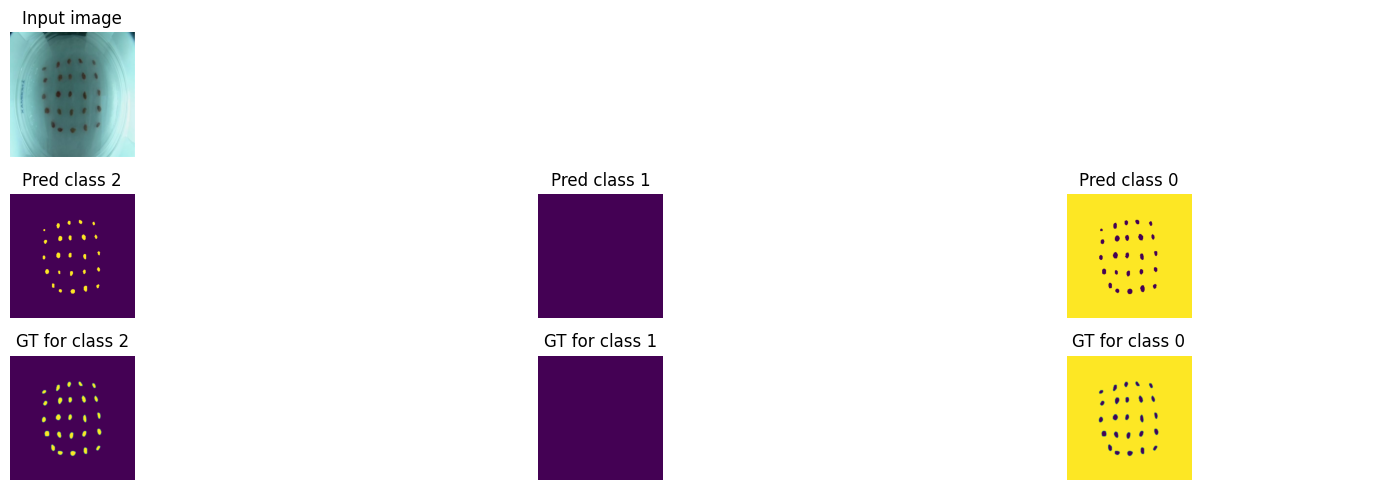

Train loss: 0.05534 | Time: 15m 13s | Val loss: 0.03732
Train_DICE_avg: 0.61638 | Train_Jaccard_avg: 0.56001 | Train_Sensitivity_avg: 0.92761 | Train_Specificity_avg: 0.88455 
Class 0 - Train_DICE: 0.98295 | Train_Jaccard: 0.96663 | Train_Sensitivity: 0.98377 | Train_Specificity: 0.68759 
Class 1 - Train_DICE: 0.27432 | Train_Jaccard: 0.27432 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98555 
Class 2 - Train_DICE: 0.59188 | Train_Jaccard: 0.43907 | Train_Sensitivity: 0.79906 | Train_Specificity: 0.98051 
Val_DICE_avg: 0.66943 | Val_Jaccard_avg: 0.61453 | Val_Sensitivity_avg: 0.95176 | Val_Specificity_avg: 0.83874 
Class 0 - Val_DICE: 0.98948 | Val_Jaccard: 0.97923 | Val_Sensitivity: 0.99787 | Val_Specificity: 0.55107 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.55057 | Val_Jaccard: 0.39610 | Val_Sensitivity: 0.85739 | Val_Specificity: 0.97682 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.05421 | Time: 16m 11s | Val loss: 0.03660
Train_DICE_avg: 0.61649 | Train_Jaccard_avg: 0.56012 | Train_Sensitivity_avg: 0.92736 | Train_Specificity_avg: 0.88524 
Class 0 - Train_DICE: 0.98293 | Train_Jaccard: 0.96658 | Train_Sensitivity: 0.98462 | Train_Specificity: 0.69002 
Class 1 - Train_DICE: 0.27931 | Train_Jaccard: 0.27931 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98540 
Class 2 - Train_DICE: 0.58724 | Train_Jaccard: 0.43446 | Train_Sensitivity: 0.79747 | Train_Specificity: 0.98029 
Val_DICE_avg: 0.66502 | Val_Jaccard_avg: 0.61021 | Val_Sensitivity_avg: 0.95154 | Val_Specificity_avg: 0.83530 
Class 0 - Val_DICE: 0.98908 | Val_Jaccard: 0.97846 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.54133 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.53773 | Val_Jaccard: 0.38393 | Val_Sensitivity: 0.85664 | Val_Specificity: 0.97623 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.05268 | Time: 17m 8s | Val loss: 0.03578
Train_DICE_avg: 0.61379 | Train_Jaccard_avg: 0.55724 | Train_Sensitivity_avg: 0.93115 | Train_Specificity_avg: 0.88237 
Class 0 - Train_DICE: 0.98294 | Train_Jaccard: 0.96659 | Train_Sensitivity: 0.98555 | Train_Specificity: 0.68169 
Class 1 - Train_DICE: 0.27729 | Train_Jaccard: 0.27729 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98559 
Class 2 - Train_DICE: 0.58114 | Train_Jaccard: 0.42785 | Train_Sensitivity: 0.80791 | Train_Specificity: 0.97983 
Val_DICE_avg: 0.66233 | Val_Jaccard_avg: 0.60786 | Val_Sensitivity_avg: 0.95123 | Val_Specificity_avg: 0.83603 
Class 0 - Val_DICE: 0.98916 | Val_Jaccard: 0.97861 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.54383 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.52957 | Val_Jaccard: 0.37672 | Val_Sensitivity: 0.85566 | Val_Specificity: 0.97594 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.05136 | Time: 18m 6s | Val loss: 0.03544
Train_DICE_avg: 0.61337 | Train_Jaccard_avg: 0.55687 | Train_Sensitivity_avg: 0.93266 | Train_Specificity_avg: 0.87905 
Class 0 - Train_DICE: 0.98311 | Train_Jaccard: 0.96691 | Train_Sensitivity: 0.98675 | Train_Specificity: 0.67206 
Class 1 - Train_DICE: 0.28108 | Train_Jaccard: 0.28108 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98559 
Class 2 - Train_DICE: 0.57591 | Train_Jaccard: 0.42262 | Train_Sensitivity: 0.81123 | Train_Specificity: 0.97950 
Val_DICE_avg: 0.66208 | Val_Jaccard_avg: 0.60738 | Val_Sensitivity_avg: 0.95110 | Val_Specificity_avg: 0.83326 
Class 0 - Val_DICE: 0.98884 | Val_Jaccard: 0.97799 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.53559 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.52914 | Val_Jaccard: 0.37591 | Val_Sensitivity: 0.85521 | Val_Specificity: 0.97585 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.05106 | Time: 19m 3s | Val loss: 0.03525
Train_DICE_avg: 0.61434 | Train_Jaccard_avg: 0.55780 | Train_Sensitivity_avg: 0.93266 | Train_Specificity_avg: 0.88104 
Class 0 - Train_DICE: 0.98295 | Train_Jaccard: 0.96659 | Train_Sensitivity: 0.98692 | Train_Specificity: 0.67773 
Class 1 - Train_DICE: 0.28478 | Train_Jaccard: 0.28478 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98583 
Class 2 - Train_DICE: 0.57528 | Train_Jaccard: 0.42202 | Train_Sensitivity: 0.81106 | Train_Specificity: 0.97954 
Val_DICE_avg: 0.65916 | Val_Jaccard_avg: 0.60471 | Val_Sensitivity_avg: 0.95093 | Val_Specificity_avg: 0.83167 
Class 0 - Val_DICE: 0.98866 | Val_Jaccard: 0.97763 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.53118 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.52058 | Val_Jaccard: 0.36826 | Val_Sensitivity: 0.85465 | Val_Specificity: 0.97549 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


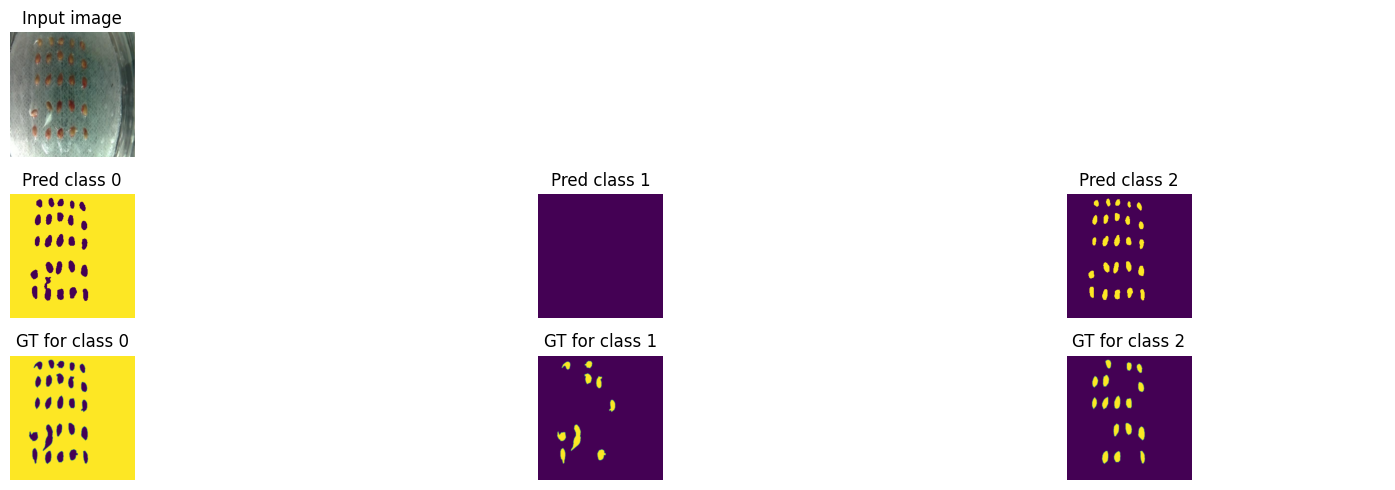

Train loss: 0.04892 | Time: 20m 1s | Val loss: 0.03423
Train_DICE_avg: 0.61240 | Train_Jaccard_avg: 0.55596 | Train_Sensitivity_avg: 0.93504 | Train_Specificity_avg: 0.87657 
Class 0 - Train_DICE: 0.98349 | Train_Jaccard: 0.96762 | Train_Sensitivity: 0.98859 | Train_Specificity: 0.66490 
Class 1 - Train_DICE: 0.28068 | Train_Jaccard: 0.28068 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.57303 | Train_Jaccard: 0.41957 | Train_Sensitivity: 0.81653 | Train_Specificity: 0.97923 
Val_DICE_avg: 0.66377 | Val_Jaccard_avg: 0.60892 | Val_Sensitivity_avg: 0.95044 | Val_Specificity_avg: 0.82951 
Class 0 - Val_DICE: 0.98831 | Val_Jaccard: 0.97696 | Val_Sensitivity: 0.99827 | Val_Specificity: 0.52396 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.53474 | Val_Jaccard: 0.38155 | Val_Sensitivity: 0.85306 | Val_Specificity: 0.97625 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.04801 | Time: 20m 59s | Val loss: 0.03381
Train_DICE_avg: 0.61546 | Train_Jaccard_avg: 0.55891 | Train_Sensitivity_avg: 0.93552 | Train_Specificity_avg: 0.87873 
Class 0 - Train_DICE: 0.98360 | Train_Jaccard: 0.96782 | Train_Sensitivity: 0.98907 | Train_Specificity: 0.67067 
Class 1 - Train_DICE: 0.28309 | Train_Jaccard: 0.28309 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.57970 | Train_Jaccard: 0.42580 | Train_Sensitivity: 0.81750 | Train_Specificity: 0.97973 
Val_DICE_avg: 0.66341 | Val_Jaccard_avg: 0.60826 | Val_Sensitivity_avg: 0.95008 | Val_Specificity_avg: 0.82654 
Class 0 - Val_DICE: 0.98794 | Val_Jaccard: 0.97623 | Val_Sensitivity: 0.99839 | Val_Specificity: 0.51517 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.53404 | Val_Jaccard: 0.38030 | Val_Sensitivity: 0.85184 | Val_Specificity: 0.97613 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.04710 | Time: 21m 56s | Val loss: 0.03343
Train_DICE_avg: 0.61631 | Train_Jaccard_avg: 0.55979 | Train_Sensitivity_avg: 0.93671 | Train_Specificity_avg: 0.87841 
Class 0 - Train_DICE: 0.98382 | Train_Jaccard: 0.96825 | Train_Sensitivity: 0.99000 | Train_Specificity: 0.66987 
Class 1 - Train_DICE: 0.28494 | Train_Jaccard: 0.28494 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98568 
Class 2 - Train_DICE: 0.58017 | Train_Jaccard: 0.42617 | Train_Sensitivity: 0.82012 | Train_Specificity: 0.97969 
Val_DICE_avg: 0.66441 | Val_Jaccard_avg: 0.60894 | Val_Sensitivity_avg: 0.94976 | Val_Specificity_avg: 0.82422 
Class 0 - Val_DICE: 0.98760 | Val_Jaccard: 0.97558 | Val_Sensitivity: 0.99849 | Val_Specificity: 0.50811 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.53739 | Val_Jaccard: 0.38298 | Val_Sensitivity: 0.85080 | Val_Specificity: 0.97622 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.04592 | Time: 22m 53s | Val loss: 0.03304
Train_DICE_avg: 0.61525 | Train_Jaccard_avg: 0.55862 | Train_Sensitivity_avg: 0.93778 | Train_Specificity_avg: 0.87629 
Class 0 - Train_DICE: 0.98411 | Train_Jaccard: 0.96881 | Train_Sensitivity: 0.99075 | Train_Specificity: 0.66373 
Class 1 - Train_DICE: 0.27971 | Train_Jaccard: 0.27971 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.58192 | Train_Jaccard: 0.42734 | Train_Sensitivity: 0.82260 | Train_Specificity: 0.97958 
Val_DICE_avg: 0.66352 | Val_Jaccard_avg: 0.60828 | Val_Sensitivity_avg: 0.94947 | Val_Specificity_avg: 0.82729 
Class 0 - Val_DICE: 0.98802 | Val_Jaccard: 0.97640 | Val_Sensitivity: 0.99852 | Val_Specificity: 0.51742 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.53428 | Val_Jaccard: 0.38020 | Val_Sensitivity: 0.84989 | Val_Specificity: 0.97613 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.04513 | Time: 23m 50s | Val loss: 0.03292
Train_DICE_avg: 0.61759 | Train_Jaccard_avg: 0.56109 | Train_Sensitivity_avg: 0.93831 | Train_Specificity_avg: 0.87615 
Class 0 - Train_DICE: 0.98448 | Train_Jaccard: 0.96952 | Train_Sensitivity: 0.99148 | Train_Specificity: 0.66315 
Class 1 - Train_DICE: 0.28253 | Train_Jaccard: 0.28253 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98551 
Class 2 - Train_DICE: 0.58578 | Train_Jaccard: 0.43123 | Train_Sensitivity: 0.82343 | Train_Specificity: 0.97978 
Val_DICE_avg: 0.66654 | Val_Jaccard_avg: 0.61103 | Val_Sensitivity_avg: 0.94931 | Val_Specificity_avg: 0.82512 
Class 0 - Val_DICE: 0.98774 | Val_Jaccard: 0.97585 | Val_Sensitivity: 0.99855 | Val_Specificity: 0.51047 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54363 | Val_Jaccard: 0.38899 | Val_Sensitivity: 0.84939 | Val_Specificity: 0.97655 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


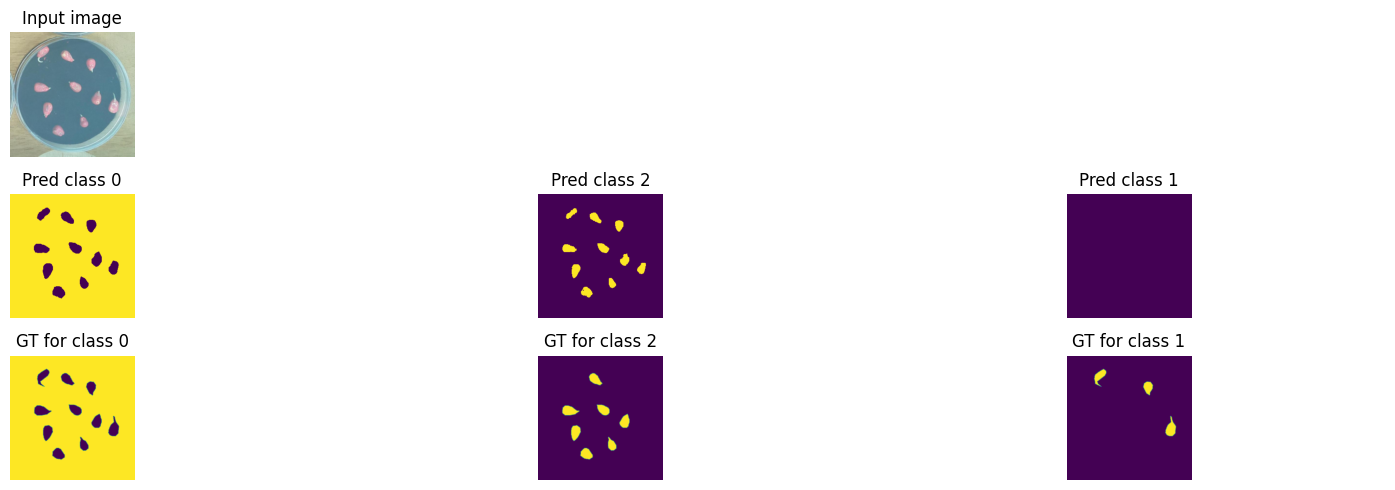

Train loss: 0.04473 | Time: 24m 48s | Val loss: 0.03267
Train_DICE_avg: 0.61889 | Train_Jaccard_avg: 0.56210 | Train_Sensitivity_avg: 0.93919 | Train_Specificity_avg: 0.87658 
Class 0 - Train_DICE: 0.98446 | Train_Jaccard: 0.96948 | Train_Sensitivity: 0.99150 | Train_Specificity: 0.66431 
Class 1 - Train_DICE: 0.28156 | Train_Jaccard: 0.28156 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98557 
Class 2 - Train_DICE: 0.59066 | Train_Jaccard: 0.43525 | Train_Sensitivity: 0.82607 | Train_Specificity: 0.97985 
Val_DICE_avg: 0.66636 | Val_Jaccard_avg: 0.61100 | Val_Sensitivity_avg: 0.94880 | Val_Specificity_avg: 0.82627 
Class 0 - Val_DICE: 0.98785 | Val_Jaccard: 0.97606 | Val_Sensitivity: 0.99860 | Val_Specificity: 0.51386 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54298 | Val_Jaccard: 0.38870 | Val_Sensitivity: 0.84779 | Val_Specificity: 0.97661 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.04379 | Time: 25m 46s | Val loss: 0.03243
Train_DICE_avg: 0.61786 | Train_Jaccard_avg: 0.56119 | Train_Sensitivity_avg: 0.93992 | Train_Specificity_avg: 0.87666 
Class 0 - Train_DICE: 0.98487 | Train_Jaccard: 0.97027 | Train_Sensitivity: 0.99216 | Train_Specificity: 0.66475 
Class 1 - Train_DICE: 0.27609 | Train_Jaccard: 0.27609 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98541 
Class 2 - Train_DICE: 0.59263 | Train_Jaccard: 0.43722 | Train_Sensitivity: 0.82759 | Train_Specificity: 0.97982 
Val_DICE_avg: 0.66617 | Val_Jaccard_avg: 0.61123 | Val_Sensitivity_avg: 0.94854 | Val_Specificity_avg: 0.82871 
Class 0 - Val_DICE: 0.98815 | Val_Jaccard: 0.97665 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.52107 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54211 | Val_Jaccard: 0.38878 | Val_Sensitivity: 0.84705 | Val_Specificity: 0.97671 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.04359 | Time: 26m 43s | Val loss: 0.03226
Train_DICE_avg: 0.61935 | Train_Jaccard_avg: 0.56287 | Train_Sensitivity_avg: 0.94045 | Train_Specificity_avg: 0.87860 
Class 0 - Train_DICE: 0.98501 | Train_Jaccard: 0.97054 | Train_Sensitivity: 0.99232 | Train_Specificity: 0.66999 
Class 1 - Train_DICE: 0.27528 | Train_Jaccard: 0.27528 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.59778 | Train_Jaccard: 0.44278 | Train_Sensitivity: 0.82904 | Train_Specificity: 0.98020 
Val_DICE_avg: 0.66849 | Val_Jaccard_avg: 0.61307 | Val_Sensitivity_avg: 0.94857 | Val_Specificity_avg: 0.82690 
Class 0 - Val_DICE: 0.98796 | Val_Jaccard: 0.97627 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.51547 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54927 | Val_Jaccard: 0.39469 | Val_Sensitivity: 0.84708 | Val_Specificity: 0.97690 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.04332 | Time: 27m 41s | Val loss: 0.03209
Train_DICE_avg: 0.62229 | Train_Jaccard_avg: 0.56576 | Train_Sensitivity_avg: 0.94139 | Train_Specificity_avg: 0.88186 
Class 0 - Train_DICE: 0.98511 | Train_Jaccard: 0.97074 | Train_Sensitivity: 0.99236 | Train_Specificity: 0.67954 
Class 1 - Train_DICE: 0.28156 | Train_Jaccard: 0.28156 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98571 
Class 2 - Train_DICE: 0.60020 | Train_Jaccard: 0.44497 | Train_Sensitivity: 0.83181 | Train_Specificity: 0.98034 
Val_DICE_avg: 0.66486 | Val_Jaccard_avg: 0.60976 | Val_Sensitivity_avg: 0.94866 | Val_Specificity_avg: 0.83142 
Class 0 - Val_DICE: 0.98860 | Val_Jaccard: 0.97751 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.52957 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.53773 | Val_Jaccard: 0.38351 | Val_Sensitivity: 0.84736 | Val_Specificity: 0.97635 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.04235 | Time: 28m 38s | Val loss: 0.03181
Train_DICE_avg: 0.62455 | Train_Jaccard_avg: 0.56805 | Train_Sensitivity_avg: 0.94184 | Train_Specificity_avg: 0.87837 
Class 0 - Train_DICE: 0.98523 | Train_Jaccard: 0.97096 | Train_Sensitivity: 0.99298 | Train_Specificity: 0.66884 
Class 1 - Train_DICE: 0.28068 | Train_Jaccard: 0.28068 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.60773 | Train_Jaccard: 0.45251 | Train_Sensitivity: 0.83253 | Train_Specificity: 0.98060 
Val_DICE_avg: 0.67131 | Val_Jaccard_avg: 0.61594 | Val_Sensitivity_avg: 0.94787 | Val_Specificity_avg: 0.82998 
Class 0 - Val_DICE: 0.98837 | Val_Jaccard: 0.97708 | Val_Sensitivity: 0.99866 | Val_Specificity: 0.52429 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.55731 | Val_Jaccard: 0.40247 | Val_Sensitivity: 0.84494 | Val_Specificity: 0.97733 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


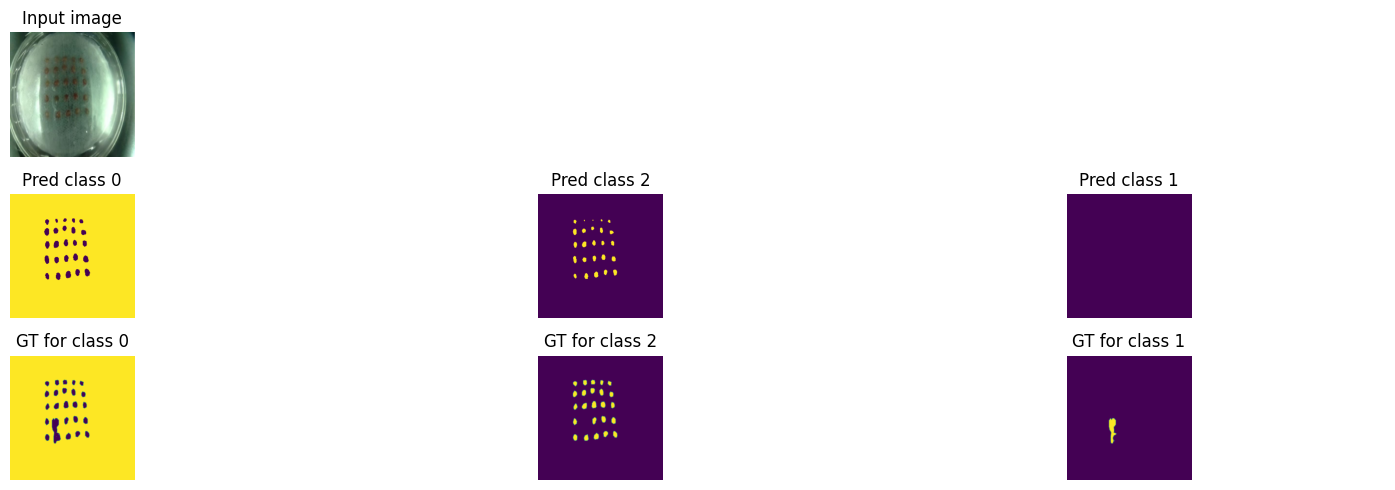

Train loss: 0.04136 | Time: 29m 36s | Val loss: 0.03147
Train_DICE_avg: 0.62228 | Train_Jaccard_avg: 0.56602 | Train_Sensitivity_avg: 0.94224 | Train_Specificity_avg: 0.87848 
Class 0 - Train_DICE: 0.98566 | Train_Jaccard: 0.97180 | Train_Sensitivity: 0.99331 | Train_Specificity: 0.66944 
Class 1 - Train_DICE: 0.27142 | Train_Jaccard: 0.27142 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98536 
Class 2 - Train_DICE: 0.60977 | Train_Jaccard: 0.45484 | Train_Sensitivity: 0.83342 | Train_Specificity: 0.98063 
Val_DICE_avg: 0.67495 | Val_Jaccard_avg: 0.61907 | Val_Sensitivity_avg: 0.94844 | Val_Specificity_avg: 0.82801 
Class 0 - Val_DICE: 0.98808 | Val_Jaccard: 0.97651 | Val_Sensitivity: 0.99875 | Val_Specificity: 0.51796 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56850 | Val_Jaccard: 0.41246 | Val_Sensitivity: 0.84656 | Val_Specificity: 0.97773 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.04080 | Time: 30m 33s | Val loss: 0.03106
Train_DICE_avg: 0.63004 | Train_Jaccard_avg: 0.57411 | Train_Sensitivity_avg: 0.94238 | Train_Specificity_avg: 0.88265 
Class 0 - Train_DICE: 0.98588 | Train_Jaccard: 0.97222 | Train_Sensitivity: 0.99335 | Train_Specificity: 0.68083 
Class 1 - Train_DICE: 0.28333 | Train_Jaccard: 0.28333 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98586 
Class 2 - Train_DICE: 0.62092 | Train_Jaccard: 0.46677 | Train_Sensitivity: 0.83379 | Train_Specificity: 0.98127 
Val_DICE_avg: 0.67551 | Val_Jaccard_avg: 0.61996 | Val_Sensitivity_avg: 0.94855 | Val_Specificity_avg: 0.83012 
Class 0 - Val_DICE: 0.98840 | Val_Jaccard: 0.97713 | Val_Sensitivity: 0.99872 | Val_Specificity: 0.52410 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56989 | Val_Jaccard: 0.41450 | Val_Sensitivity: 0.84693 | Val_Specificity: 0.97792 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.03995 | Time: 31m 31s | Val loss: 0.03081
Train_DICE_avg: 0.62798 | Train_Jaccard_avg: 0.57223 | Train_Sensitivity_avg: 0.94233 | Train_Specificity_avg: 0.88430 
Class 0 - Train_DICE: 0.98628 | Train_Jaccard: 0.97299 | Train_Sensitivity: 0.99373 | Train_Specificity: 0.68564 
Class 1 - Train_DICE: 0.27746 | Train_Jaccard: 0.27746 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98588 
Class 2 - Train_DICE: 0.62020 | Train_Jaccard: 0.46624 | Train_Sensitivity: 0.83325 | Train_Specificity: 0.98138 
Val_DICE_avg: 0.67843 | Val_Jaccard_avg: 0.62250 | Val_Sensitivity_avg: 0.94819 | Val_Specificity_avg: 0.83051 
Class 0 - Val_DICE: 0.98845 | Val_Jaccard: 0.97723 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.52501 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57858 | Val_Jaccard: 0.42203 | Val_Sensitivity: 0.84581 | Val_Specificity: 0.97819 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.03905 | Time: 32m 29s | Val loss: 0.03049
Train_DICE_avg: 0.63091 | Train_Jaccard_avg: 0.57542 | Train_Sensitivity_avg: 0.94268 | Train_Specificity_avg: 0.88426 
Class 0 - Train_DICE: 0.98659 | Train_Jaccard: 0.97359 | Train_Sensitivity: 0.99412 | Train_Specificity: 0.68570 
Class 1 - Train_DICE: 0.27971 | Train_Jaccard: 0.27971 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.62642 | Train_Jaccard: 0.47296 | Train_Sensitivity: 0.83391 | Train_Specificity: 0.98148 
Val_DICE_avg: 0.67622 | Val_Jaccard_avg: 0.62071 | Val_Sensitivity_avg: 0.94811 | Val_Specificity_avg: 0.83481 
Class 0 - Val_DICE: 0.98904 | Val_Jaccard: 0.97837 | Val_Sensitivity: 0.99874 | Val_Specificity: 0.53817 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57136 | Val_Jaccard: 0.41551 | Val_Sensitivity: 0.84559 | Val_Specificity: 0.97792 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03851 | Time: 33m 26s | Val loss: 0.03024
Train_DICE_avg: 0.63072 | Train_Jaccard_avg: 0.57528 | Train_Sensitivity_avg: 0.94304 | Train_Specificity_avg: 0.88353 
Class 0 - Train_DICE: 0.98687 | Train_Jaccard: 0.97414 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.68377 
Class 1 - Train_DICE: 0.27472 | Train_Jaccard: 0.27472 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98520 
Class 2 - Train_DICE: 0.63058 | Train_Jaccard: 0.47699 | Train_Sensitivity: 0.83482 | Train_Specificity: 0.98162 
Val_DICE_avg: 0.67844 | Val_Jaccard_avg: 0.62292 | Val_Sensitivity_avg: 0.94845 | Val_Specificity_avg: 0.83672 
Class 0 - Val_DICE: 0.98926 | Val_Jaccard: 0.97880 | Val_Sensitivity: 0.99872 | Val_Specificity: 0.54357 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57780 | Val_Jaccard: 0.42172 | Val_Sensitivity: 0.84663 | Val_Specificity: 0.97825 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


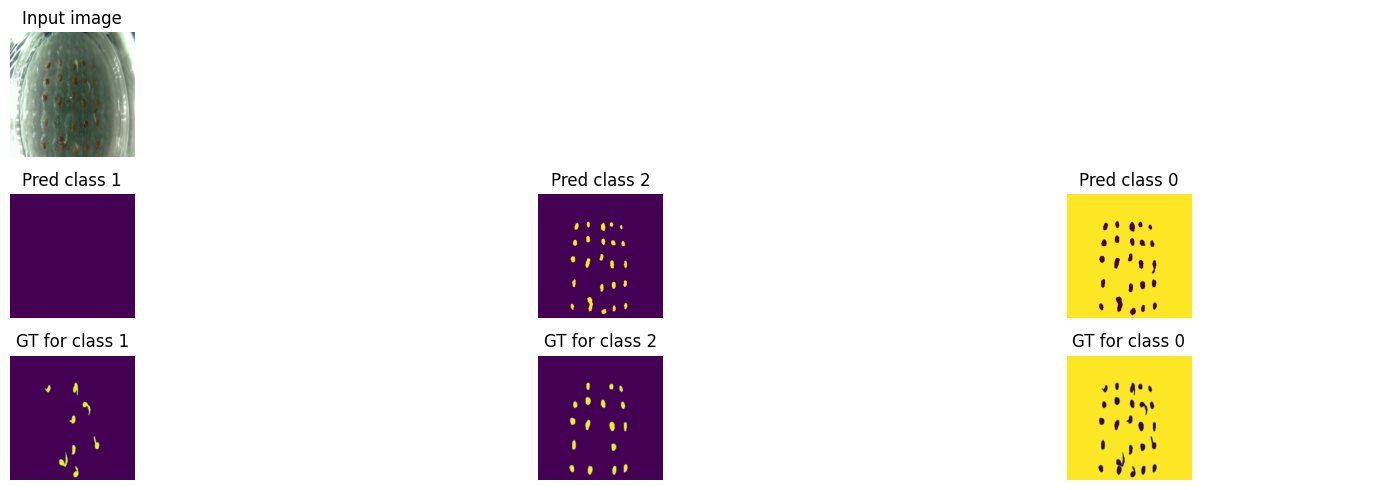

Train loss: 0.03797 | Time: 34m 25s | Val loss: 0.03015
Train_DICE_avg: 0.63474 | Train_Jaccard_avg: 0.57980 | Train_Sensitivity_avg: 0.94255 | Train_Specificity_avg: 0.88631 
Class 0 - Train_DICE: 0.98705 | Train_Jaccard: 0.97449 | Train_Sensitivity: 0.99438 | Train_Specificity: 0.69107 
Class 1 - Train_DICE: 0.27931 | Train_Jaccard: 0.27931 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98561 
Class 2 - Train_DICE: 0.63785 | Train_Jaccard: 0.48560 | Train_Sensitivity: 0.83327 | Train_Specificity: 0.98225 
Val_DICE_avg: 0.68228 | Val_Jaccard_avg: 0.62681 | Val_Sensitivity_avg: 0.94825 | Val_Specificity_avg: 0.83277 
Class 0 - Val_DICE: 0.98875 | Val_Jaccard: 0.97780 | Val_Sensitivity: 0.99883 | Val_Specificity: 0.53102 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58983 | Val_Jaccard: 0.43438 | Val_Sensitivity: 0.84592 | Val_Specificity: 0.97895 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.03751 | Time: 35m 22s | Val loss: 0.02980
Train_DICE_avg: 0.63657 | Train_Jaccard_avg: 0.58180 | Train_Sensitivity_avg: 0.94274 | Train_Specificity_avg: 0.88819 
Class 0 - Train_DICE: 0.98737 | Train_Jaccard: 0.97512 | Train_Sensitivity: 0.99445 | Train_Specificity: 0.69661 
Class 1 - Train_DICE: 0.28052 | Train_Jaccard: 0.28052 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98554 
Class 2 - Train_DICE: 0.64181 | Train_Jaccard: 0.48976 | Train_Sensitivity: 0.83377 | Train_Specificity: 0.98241 
Val_DICE_avg: 0.68070 | Val_Jaccard_avg: 0.62520 | Val_Sensitivity_avg: 0.94871 | Val_Specificity_avg: 0.83888 
Class 0 - Val_DICE: 0.98960 | Val_Jaccard: 0.97945 | Val_Sensitivity: 0.99870 | Val_Specificity: 0.54984 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58425 | Val_Jaccard: 0.42789 | Val_Sensitivity: 0.84742 | Val_Specificity: 0.97845 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03750 | Time: 36m 20s | Val loss: 0.02973
Train_DICE_avg: 0.64267 | Train_Jaccard_avg: 0.58802 | Train_Sensitivity_avg: 0.94228 | Train_Specificity_avg: 0.89153 
Class 0 - Train_DICE: 0.98731 | Train_Jaccard: 0.97499 | Train_Sensitivity: 0.99427 | Train_Specificity: 0.70561 
Class 1 - Train_DICE: 0.29203 | Train_Jaccard: 0.29203 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98616 
Class 2 - Train_DICE: 0.64869 | Train_Jaccard: 0.49703 | Train_Sensitivity: 0.83257 | Train_Specificity: 0.98282 
Val_DICE_avg: 0.68004 | Val_Jaccard_avg: 0.62492 | Val_Sensitivity_avg: 0.94836 | Val_Specificity_avg: 0.84229 
Class 0 - Val_DICE: 0.98995 | Val_Jaccard: 0.98014 | Val_Sensitivity: 0.99866 | Val_Specificity: 0.56005 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58191 | Val_Jaccard: 0.42636 | Val_Sensitivity: 0.84640 | Val_Specificity: 0.97850 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.03685 | Time: 37m 18s | Val loss: 0.02971
Train_DICE_avg: 0.63842 | Train_Jaccard_avg: 0.58394 | Train_Sensitivity_avg: 0.94226 | Train_Specificity_avg: 0.88913 
Class 0 - Train_DICE: 0.98753 | Train_Jaccard: 0.97543 | Train_Sensitivity: 0.99463 | Train_Specificity: 0.69890 
Class 1 - Train_DICE: 0.27971 | Train_Jaccard: 0.27971 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.64801 | Train_Jaccard: 0.49667 | Train_Sensitivity: 0.83216 | Train_Specificity: 0.98272 
Val_DICE_avg: 0.68538 | Val_Jaccard_avg: 0.62961 | Val_Sensitivity_avg: 0.94829 | Val_Specificity_avg: 0.83806 
Class 0 - Val_DICE: 0.98951 | Val_Jaccard: 0.97929 | Val_Sensitivity: 0.99878 | Val_Specificity: 0.54677 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.59838 | Val_Jaccard: 0.44130 | Val_Sensitivity: 0.84610 | Val_Specificity: 0.97906 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.03648 | Time: 38m 16s | Val loss: 0.02940
Train_DICE_avg: 0.63843 | Train_Jaccard_avg: 0.58406 | Train_Sensitivity_avg: 0.94234 | Train_Specificity_avg: 0.88969 
Class 0 - Train_DICE: 0.98771 | Train_Jaccard: 0.97578 | Train_Sensitivity: 0.99472 | Train_Specificity: 0.70041 
Class 1 - Train_DICE: 0.27609 | Train_Jaccard: 0.27609 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.65149 | Train_Jaccard: 0.50030 | Train_Sensitivity: 0.83231 | Train_Specificity: 0.98292 
Val_DICE_avg: 0.68713 | Val_Jaccard_avg: 0.63167 | Val_Sensitivity_avg: 0.94832 | Val_Specificity_avg: 0.83867 
Class 0 - Val_DICE: 0.98951 | Val_Jaccard: 0.97929 | Val_Sensitivity: 0.99876 | Val_Specificity: 0.54822 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60362 | Val_Jaccard: 0.44747 | Val_Sensitivity: 0.84619 | Val_Specificity: 0.97946 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


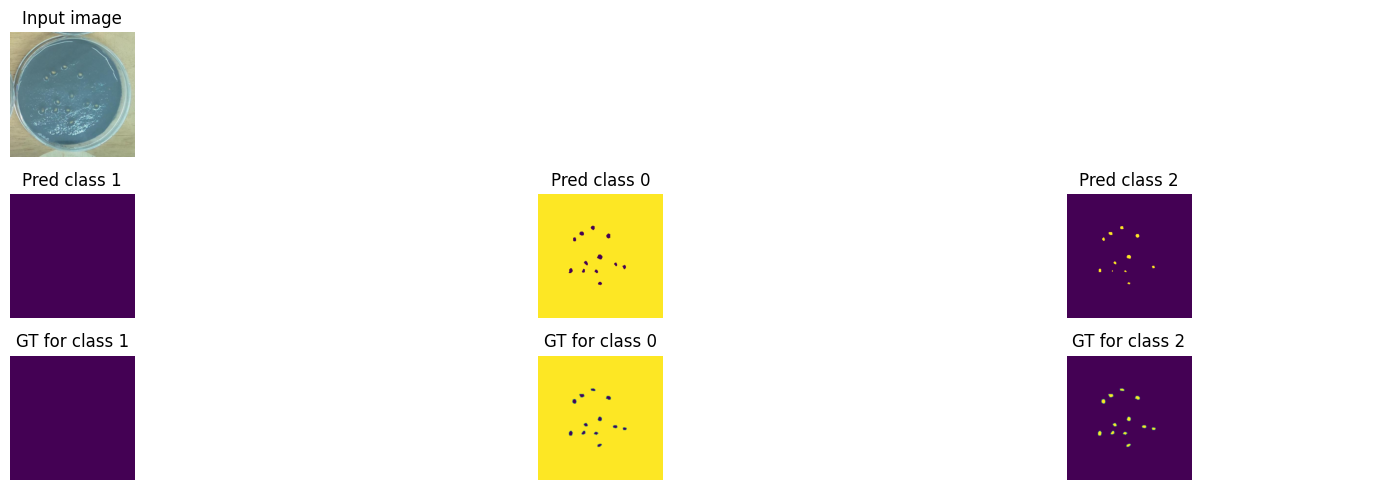

Train loss: 0.03607 | Time: 39m 14s | Val loss: 0.02942
Train_DICE_avg: 0.64096 | Train_Jaccard_avg: 0.58674 | Train_Sensitivity_avg: 0.94216 | Train_Specificity_avg: 0.89063 
Class 0 - Train_DICE: 0.98790 | Train_Jaccard: 0.97614 | Train_Sensitivity: 0.99477 | Train_Specificity: 0.70323 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98569 
Class 2 - Train_DICE: 0.65407 | Train_Jaccard: 0.50315 | Train_Sensitivity: 0.83170 | Train_Specificity: 0.98298 
Val_DICE_avg: 0.68781 | Val_Jaccard_avg: 0.63250 | Val_Sensitivity_avg: 0.94811 | Val_Specificity_avg: 0.83956 
Class 0 - Val_DICE: 0.98959 | Val_Jaccard: 0.97945 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.55069 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60560 | Val_Jaccard: 0.44980 | Val_Sensitivity: 0.84556 | Val_Specificity: 0.97965 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.03597 | Time: 40m 11s | Val loss: 0.02906
Train_DICE_avg: 0.64186 | Train_Jaccard_avg: 0.58791 | Train_Sensitivity_avg: 0.94212 | Train_Specificity_avg: 0.89085 
Class 0 - Train_DICE: 0.98804 | Train_Jaccard: 0.97641 | Train_Sensitivity: 0.99487 | Train_Specificity: 0.70367 
Class 1 - Train_DICE: 0.28027 | Train_Jaccard: 0.28027 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.65728 | Train_Jaccard: 0.50706 | Train_Sensitivity: 0.83151 | Train_Specificity: 0.98321 
Val_DICE_avg: 0.68936 | Val_Jaccard_avg: 0.63399 | Val_Sensitivity_avg: 0.94793 | Val_Specificity_avg: 0.83880 
Class 0 - Val_DICE: 0.98948 | Val_Jaccard: 0.97923 | Val_Sensitivity: 0.99884 | Val_Specificity: 0.54820 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61034 | Val_Jaccard: 0.45450 | Val_Sensitivity: 0.84496 | Val_Specificity: 0.97987 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.03578 | Time: 41m 9s | Val loss: 0.02911
Train_DICE_avg: 0.64383 | Train_Jaccard_avg: 0.59002 | Train_Sensitivity_avg: 0.94220 | Train_Specificity_avg: 0.89347 
Class 0 - Train_DICE: 0.98815 | Train_Jaccard: 0.97662 | Train_Sensitivity: 0.99474 | Train_Specificity: 0.71115 
Class 1 - Train_DICE: 0.28213 | Train_Jaccard: 0.28213 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.66123 | Train_Jaccard: 0.51132 | Train_Sensitivity: 0.83187 | Train_Specificity: 0.98353 
Val_DICE_avg: 0.68910 | Val_Jaccard_avg: 0.63393 | Val_Sensitivity_avg: 0.94815 | Val_Specificity_avg: 0.84258 
Class 0 - Val_DICE: 0.98997 | Val_Jaccard: 0.98019 | Val_Sensitivity: 0.99874 | Val_Specificity: 0.55959 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60907 | Val_Jaccard: 0.45333 | Val_Sensitivity: 0.84572 | Val_Specificity: 0.97980 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03542 | Time: 42m 6s | Val loss: 0.02899
Train_DICE_avg: 0.64160 | Train_Jaccard_avg: 0.58774 | Train_Sensitivity_avg: 0.94211 | Train_Specificity_avg: 0.89213 
Class 0 - Train_DICE: 0.98824 | Train_Jaccard: 0.97680 | Train_Sensitivity: 0.99498 | Train_Specificity: 0.70741 
Class 1 - Train_DICE: 0.27464 | Train_Jaccard: 0.27464 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98557 
Class 2 - Train_DICE: 0.66193 | Train_Jaccard: 0.51178 | Train_Sensitivity: 0.83136 | Train_Specificity: 0.98340 
Val_DICE_avg: 0.69027 | Val_Jaccard_avg: 0.63504 | Val_Sensitivity_avg: 0.94804 | Val_Specificity_avg: 0.84154 
Class 0 - Val_DICE: 0.98987 | Val_Jaccard: 0.97998 | Val_Sensitivity: 0.99878 | Val_Specificity: 0.55635 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61268 | Val_Jaccard: 0.45687 | Val_Sensitivity: 0.84535 | Val_Specificity: 0.97995 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.03535 | Time: 43m 4s | Val loss: 0.02871
Train_DICE_avg: 0.64507 | Train_Jaccard_avg: 0.59145 | Train_Sensitivity_avg: 0.94173 | Train_Specificity_avg: 0.89518 
Class 0 - Train_DICE: 0.98828 | Train_Jaccard: 0.97688 | Train_Sensitivity: 0.99472 | Train_Specificity: 0.71597 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98584 
Class 2 - Train_DICE: 0.66602 | Train_Jaccard: 0.51655 | Train_Sensitivity: 0.83046 | Train_Specificity: 0.98374 
Val_DICE_avg: 0.69029 | Val_Jaccard_avg: 0.63495 | Val_Sensitivity_avg: 0.94815 | Val_Specificity_avg: 0.84200 
Class 0 - Val_DICE: 0.98994 | Val_Jaccard: 0.98012 | Val_Sensitivity: 0.99879 | Val_Specificity: 0.55780 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61267 | Val_Jaccard: 0.45648 | Val_Sensitivity: 0.84566 | Val_Specificity: 0.97988 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


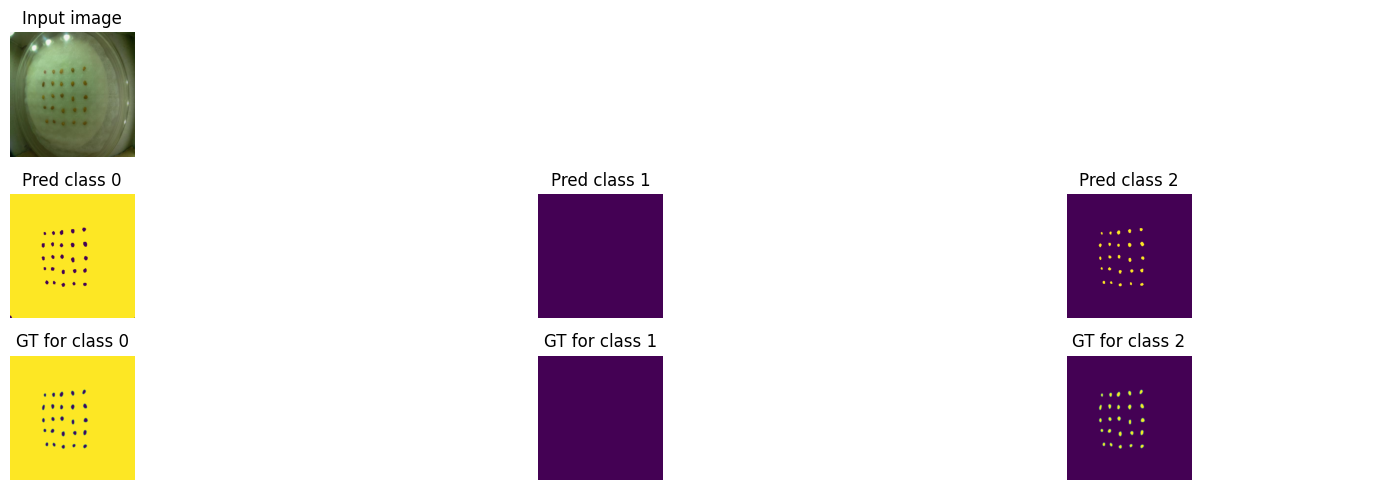

Train loss: 0.03502 | Time: 44m 2s | Val loss: 0.02886
Train_DICE_avg: 0.64305 | Train_Jaccard_avg: 0.58929 | Train_Sensitivity_avg: 0.94202 | Train_Specificity_avg: 0.89212 
Class 0 - Train_DICE: 0.98839 | Train_Jaccard: 0.97710 | Train_Sensitivity: 0.99514 | Train_Specificity: 0.70741 
Class 1 - Train_DICE: 0.27585 | Train_Jaccard: 0.27585 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98547 
Class 2 - Train_DICE: 0.66492 | Train_Jaccard: 0.51493 | Train_Sensitivity: 0.83093 | Train_Specificity: 0.98348 
Val_DICE_avg: 0.69153 | Val_Jaccard_avg: 0.63635 | Val_Sensitivity_avg: 0.94819 | Val_Specificity_avg: 0.84276 
Class 0 - Val_DICE: 0.99001 | Val_Jaccard: 0.98026 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.55983 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61633 | Val_Jaccard: 0.46054 | Val_Sensitivity: 0.84581 | Val_Specificity: 0.98012 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.03521 | Time: 45m 0s | Val loss: 0.02883
Train_DICE_avg: 0.64660 | Train_Jaccard_avg: 0.59312 | Train_Sensitivity_avg: 0.94192 | Train_Specificity_avg: 0.89623 
Class 0 - Train_DICE: 0.98842 | Train_Jaccard: 0.97715 | Train_Sensitivity: 0.99472 | Train_Specificity: 0.71878 
Class 1 - Train_DICE: 0.28229 | Train_Jaccard: 0.28229 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98603 
Class 2 - Train_DICE: 0.66909 | Train_Jaccard: 0.51993 | Train_Sensitivity: 0.83103 | Train_Specificity: 0.98387 
Val_DICE_avg: 0.69195 | Val_Jaccard_avg: 0.63685 | Val_Sensitivity_avg: 0.94827 | Val_Specificity_avg: 0.84262 
Class 0 - Val_DICE: 0.98998 | Val_Jaccard: 0.98022 | Val_Sensitivity: 0.99878 | Val_Specificity: 0.55934 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61760 | Val_Jaccard: 0.46208 | Val_Sensitivity: 0.84604 | Val_Specificity: 0.98019 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.03477 | Time: 45m 58s | Val loss: 0.02866
Train_DICE_avg: 0.64494 | Train_Jaccard_avg: 0.59164 | Train_Sensitivity_avg: 0.94176 | Train_Specificity_avg: 0.89419 
Class 0 - Train_DICE: 0.98855 | Train_Jaccard: 0.97740 | Train_Sensitivity: 0.99508 | Train_Specificity: 0.71314 
Class 1 - Train_DICE: 0.27649 | Train_Jaccard: 0.27649 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98559 
Class 2 - Train_DICE: 0.66978 | Train_Jaccard: 0.52102 | Train_Sensitivity: 0.83021 | Train_Specificity: 0.98383 
Val_DICE_avg: 0.69209 | Val_Jaccard_avg: 0.63692 | Val_Sensitivity_avg: 0.94836 | Val_Specificity_avg: 0.84382 
Class 0 - Val_DICE: 0.99014 | Val_Jaccard: 0.98052 | Val_Sensitivity: 0.99878 | Val_Specificity: 0.56297 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61787 | Val_Jaccard: 0.46199 | Val_Sensitivity: 0.84630 | Val_Specificity: 0.98017 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03482 | Time: 46m 56s | Val loss: 0.02872
Train_DICE_avg: 0.64667 | Train_Jaccard_avg: 0.59346 | Train_Sensitivity_avg: 0.94162 | Train_Specificity_avg: 0.89449 
Class 0 - Train_DICE: 0.98857 | Train_Jaccard: 0.97744 | Train_Sensitivity: 0.99508 | Train_Specificity: 0.71409 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98544 
Class 2 - Train_DICE: 0.67052 | Train_Jaccard: 0.52201 | Train_Sensitivity: 0.82979 | Train_Specificity: 0.98392 
Val_DICE_avg: 0.69074 | Val_Jaccard_avg: 0.63560 | Val_Sensitivity_avg: 0.94845 | Val_Specificity_avg: 0.84526 
Class 0 - Val_DICE: 0.99031 | Val_Jaccard: 0.98085 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.56749 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61364 | Val_Jaccard: 0.45769 | Val_Sensitivity: 0.84660 | Val_Specificity: 0.97995 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03468 | Time: 47m 54s | Val loss: 0.02872
Train_DICE_avg: 0.64959 | Train_Jaccard_avg: 0.59636 | Train_Sensitivity_avg: 0.94179 | Train_Specificity_avg: 0.89463 
Class 0 - Train_DICE: 0.98866 | Train_Jaccard: 0.97762 | Train_Sensitivity: 0.99507 | Train_Specificity: 0.71452 
Class 1 - Train_DICE: 0.28841 | Train_Jaccard: 0.28841 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98547 
Class 2 - Train_DICE: 0.67170 | Train_Jaccard: 0.52306 | Train_Sensitivity: 0.83029 | Train_Specificity: 0.98391 
Val_DICE_avg: 0.69181 | Val_Jaccard_avg: 0.63667 | Val_Sensitivity_avg: 0.94842 | Val_Specificity_avg: 0.84527 
Class 0 - Val_DICE: 0.99031 | Val_Jaccard: 0.98086 | Val_Sensitivity: 0.99878 | Val_Specificity: 0.56736 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61688 | Val_Jaccard: 0.46089 | Val_Sensitivity: 0.84648 | Val_Specificity: 0.98010 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


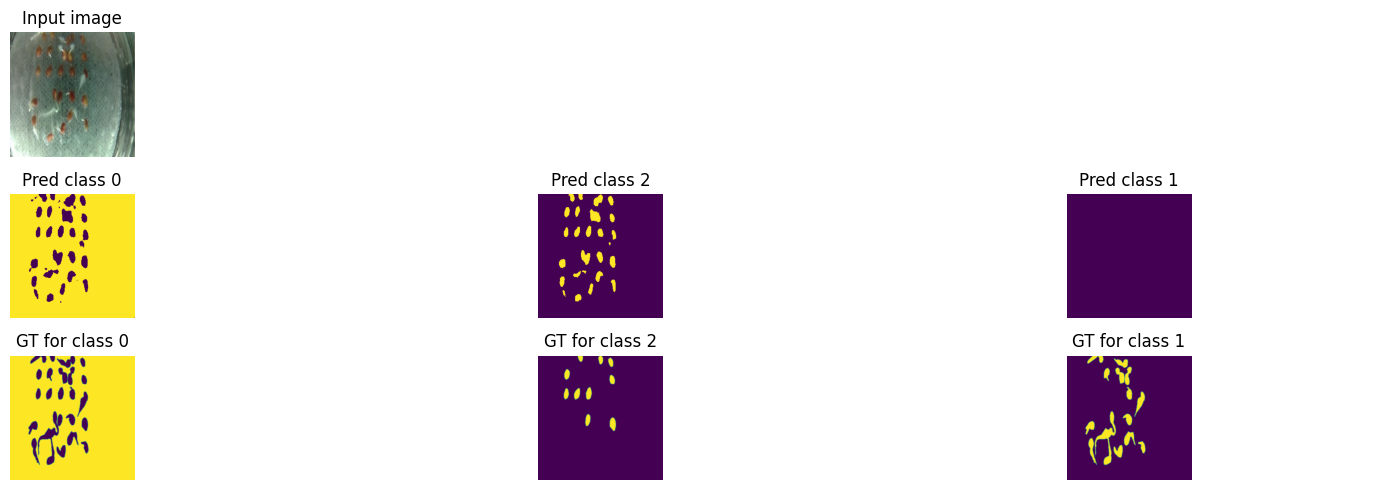

Train loss: 0.03452 | Time: 48m 52s | Val loss: 0.02840
Train_DICE_avg: 0.64789 | Train_Jaccard_avg: 0.59482 | Train_Sensitivity_avg: 0.94193 | Train_Specificity_avg: 0.89363 
Class 0 - Train_DICE: 0.98863 | Train_Jaccard: 0.97756 | Train_Sensitivity: 0.99523 | Train_Specificity: 0.71137 
Class 1 - Train_DICE: 0.28172 | Train_Jaccard: 0.28172 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98546 
Class 2 - Train_DICE: 0.67332 | Train_Jaccard: 0.52517 | Train_Sensitivity: 0.83056 | Train_Specificity: 0.98406 
Val_DICE_avg: 0.69274 | Val_Jaccard_avg: 0.63766 | Val_Sensitivity_avg: 0.94833 | Val_Specificity_avg: 0.84415 
Class 0 - Val_DICE: 0.99011 | Val_Jaccard: 0.98045 | Val_Sensitivity: 0.99886 | Val_Specificity: 0.56380 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61985 | Val_Jaccard: 0.46427 | Val_Sensitivity: 0.84613 | Val_Specificity: 0.98031 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03451 | Time: 49m 50s | Val loss: 0.02838
Train_DICE_avg: 0.65076 | Train_Jaccard_avg: 0.59770 | Train_Sensitivity_avg: 0.94150 | Train_Specificity_avg: 0.89675 
Class 0 - Train_DICE: 0.98871 | Train_Jaccard: 0.97771 | Train_Sensitivity: 0.99492 | Train_Specificity: 0.72016 
Class 1 - Train_DICE: 0.28977 | Train_Jaccard: 0.28977 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98591 
Class 2 - Train_DICE: 0.67379 | Train_Jaccard: 0.52562 | Train_Sensitivity: 0.82959 | Train_Specificity: 0.98419 
Val_DICE_avg: 0.69091 | Val_Jaccard_avg: 0.63591 | Val_Sensitivity_avg: 0.94856 | Val_Specificity_avg: 0.84691 
Class 0 - Val_DICE: 0.99048 | Val_Jaccard: 0.98118 | Val_Sensitivity: 0.99876 | Val_Specificity: 0.57239 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61400 | Val_Jaccard: 0.45829 | Val_Sensitivity: 0.84692 | Val_Specificity: 0.98001 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.03433 | Time: 50m 48s | Val loss: 0.02853
Train_DICE_avg: 0.64545 | Train_Jaccard_avg: 0.59250 | Train_Sensitivity_avg: 0.94183 | Train_Specificity_avg: 0.89508 
Class 0 - Train_DICE: 0.98870 | Train_Jaccard: 0.97769 | Train_Sensitivity: 0.99515 | Train_Specificity: 0.71532 
Class 1 - Train_DICE: 0.27206 | Train_Jaccard: 0.27206 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98572 
Class 2 - Train_DICE: 0.67558 | Train_Jaccard: 0.52775 | Train_Sensitivity: 0.83035 | Train_Specificity: 0.98422 
Val_DICE_avg: 0.69335 | Val_Jaccard_avg: 0.63818 | Val_Sensitivity_avg: 0.94833 | Val_Specificity_avg: 0.84483 
Class 0 - Val_DICE: 0.99029 | Val_Jaccard: 0.98081 | Val_Sensitivity: 0.99880 | Val_Specificity: 0.56587 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62151 | Val_Jaccard: 0.46547 | Val_Sensitivity: 0.84621 | Val_Specificity: 0.98028 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03414 | Time: 51m 45s | Val loss: 0.02831
Train_DICE_avg: 0.64770 | Train_Jaccard_avg: 0.59474 | Train_Sensitivity_avg: 0.94179 | Train_Specificity_avg: 0.89473 
Class 0 - Train_DICE: 0.98884 | Train_Jaccard: 0.97798 | Train_Sensitivity: 0.99525 | Train_Specificity: 0.71442 
Class 1 - Train_DICE: 0.27826 | Train_Jaccard: 0.27826 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.67599 | Train_Jaccard: 0.52799 | Train_Sensitivity: 0.83012 | Train_Specificity: 0.98422 
Val_DICE_avg: 0.69361 | Val_Jaccard_avg: 0.63862 | Val_Sensitivity_avg: 0.94817 | Val_Specificity_avg: 0.84545 
Class 0 - Val_DICE: 0.99032 | Val_Jaccard: 0.98088 | Val_Sensitivity: 0.99880 | Val_Specificity: 0.56759 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62225 | Val_Jaccard: 0.46673 | Val_Sensitivity: 0.84570 | Val_Specificity: 0.98041 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.03425 | Time: 52m 43s | Val loss: 0.02829
Train_DICE_avg: 0.64917 | Train_Jaccard_avg: 0.59628 | Train_Sensitivity_avg: 0.94166 | Train_Specificity_avg: 0.89536 
Class 0 - Train_DICE: 0.98881 | Train_Jaccard: 0.97792 | Train_Sensitivity: 0.99515 | Train_Specificity: 0.71618 
Class 1 - Train_DICE: 0.28293 | Train_Jaccard: 0.28293 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.67578 | Train_Jaccard: 0.52800 | Train_Sensitivity: 0.82983 | Train_Specificity: 0.98423 
Val_DICE_avg: 0.69375 | Val_Jaccard_avg: 0.63889 | Val_Sensitivity_avg: 0.94822 | Val_Specificity_avg: 0.84525 
Class 0 - Val_DICE: 0.99026 | Val_Jaccard: 0.98076 | Val_Sensitivity: 0.99879 | Val_Specificity: 0.56689 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62274 | Val_Jaccard: 0.46767 | Val_Sensitivity: 0.84588 | Val_Specificity: 0.98052 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


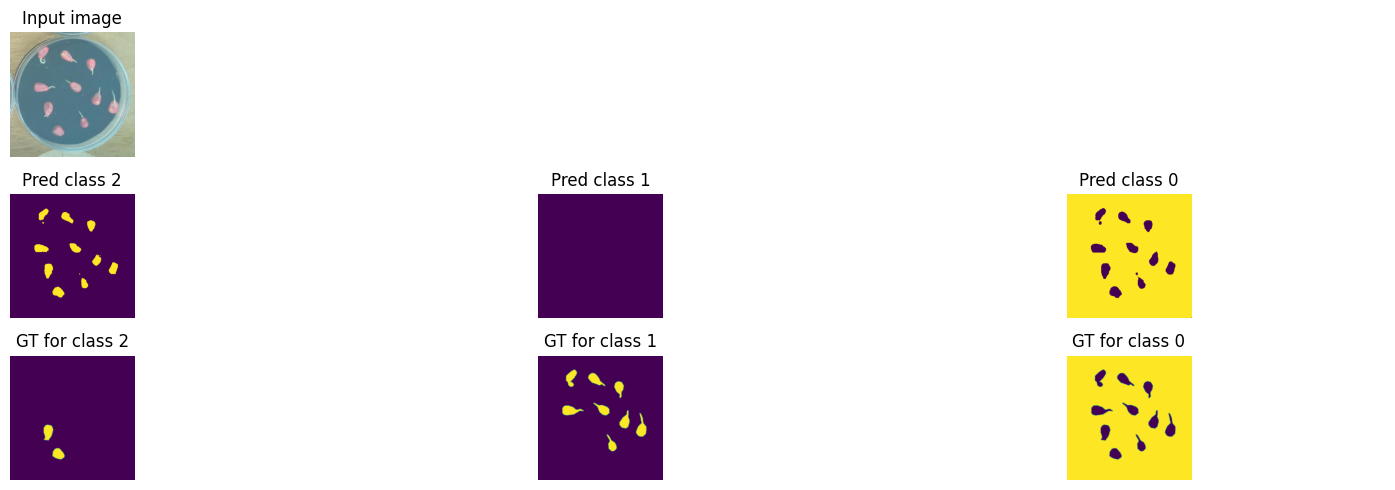

Train loss: 0.03413 | Time: 53m 42s | Val loss: 0.02818
Train_DICE_avg: 0.64903 | Train_Jaccard_avg: 0.59619 | Train_Sensitivity_avg: 0.94155 | Train_Specificity_avg: 0.89754 
Class 0 - Train_DICE: 0.98886 | Train_Jaccard: 0.97800 | Train_Sensitivity: 0.99519 | Train_Specificity: 0.72280 
Class 1 - Train_DICE: 0.28108 | Train_Jaccard: 0.28108 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.67717 | Train_Jaccard: 0.52949 | Train_Sensitivity: 0.82946 | Train_Specificity: 0.98421 
Val_DICE_avg: 0.69487 | Val_Jaccard_avg: 0.63990 | Val_Sensitivity_avg: 0.94804 | Val_Specificity_avg: 0.84395 
Class 0 - Val_DICE: 0.99010 | Val_Jaccard: 0.98045 | Val_Sensitivity: 0.99886 | Val_Specificity: 0.56286 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62624 | Val_Jaccard: 0.47100 | Val_Sensitivity: 0.84527 | Val_Specificity: 0.98064 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.03414 | Time: 54m 39s | Val loss: 0.02820
Train_DICE_avg: 0.64854 | Train_Jaccard_avg: 0.59568 | Train_Sensitivity_avg: 0.94177 | Train_Specificity_avg: 0.89669 
Class 0 - Train_DICE: 0.98890 | Train_Jaccard: 0.97808 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.72030 
Class 1 - Train_DICE: 0.27947 | Train_Jaccard: 0.27947 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98553 
Class 2 - Train_DICE: 0.67725 | Train_Jaccard: 0.52950 | Train_Sensitivity: 0.83012 | Train_Specificity: 0.98423 
Val_DICE_avg: 0.69339 | Val_Jaccard_avg: 0.63864 | Val_Sensitivity_avg: 0.94816 | Val_Specificity_avg: 0.84654 
Class 0 - Val_DICE: 0.99040 | Val_Jaccard: 0.98102 | Val_Sensitivity: 0.99881 | Val_Specificity: 0.57078 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62152 | Val_Jaccard: 0.46663 | Val_Sensitivity: 0.84568 | Val_Specificity: 0.98051 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.03400 | Time: 55m 37s | Val loss: 0.02829
Train_DICE_avg: 0.64761 | Train_Jaccard_avg: 0.59489 | Train_Sensitivity_avg: 0.94150 | Train_Specificity_avg: 0.89721 
Class 0 - Train_DICE: 0.98887 | Train_Jaccard: 0.97803 | Train_Sensitivity: 0.99513 | Train_Specificity: 0.72138 
Class 1 - Train_DICE: 0.27568 | Train_Jaccard: 0.27568 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98585 
Class 2 - Train_DICE: 0.67829 | Train_Jaccard: 0.53094 | Train_Sensitivity: 0.82936 | Train_Specificity: 0.98441 
Val_DICE_avg: 0.69466 | Val_Jaccard_avg: 0.63972 | Val_Sensitivity_avg: 0.94813 | Val_Specificity_avg: 0.84498 
Class 0 - Val_DICE: 0.99023 | Val_Jaccard: 0.98069 | Val_Sensitivity: 0.99883 | Val_Specificity: 0.56599 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62550 | Val_Jaccard: 0.47021 | Val_Sensitivity: 0.84556 | Val_Specificity: 0.98062 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.03385 | Time: 56m 34s | Val loss: 0.02823
Train_DICE_avg: 0.65019 | Train_Jaccard_avg: 0.59744 | Train_Sensitivity_avg: 0.94167 | Train_Specificity_avg: 0.89678 
Class 0 - Train_DICE: 0.98894 | Train_Jaccard: 0.97816 | Train_Sensitivity: 0.99515 | Train_Specificity: 0.71992 
Class 1 - Train_DICE: 0.28229 | Train_Jaccard: 0.28229 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98597 
Class 2 - Train_DICE: 0.67936 | Train_Jaccard: 0.53188 | Train_Sensitivity: 0.82985 | Train_Specificity: 0.98445 
Val_DICE_avg: 0.69492 | Val_Jaccard_avg: 0.64014 | Val_Sensitivity_avg: 0.94806 | Val_Specificity_avg: 0.84553 
Class 0 - Val_DICE: 0.99027 | Val_Jaccard: 0.98077 | Val_Sensitivity: 0.99884 | Val_Specificity: 0.56753 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62624 | Val_Jaccard: 0.47138 | Val_Sensitivity: 0.84534 | Val_Specificity: 0.98073 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.03386 | Time: 57m 32s | Val loss: 0.02809
Train_DICE_avg: 0.64809 | Train_Jaccard_avg: 0.59531 | Train_Sensitivity_avg: 0.94147 | Train_Specificity_avg: 0.89570 
Class 0 - Train_DICE: 0.98896 | Train_Jaccard: 0.97820 | Train_Sensitivity: 0.99533 | Train_Specificity: 0.71724 
Class 1 - Train_DICE: 0.27585 | Train_Jaccard: 0.27585 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98552 
Class 2 - Train_DICE: 0.67946 | Train_Jaccard: 0.53187 | Train_Sensitivity: 0.82908 | Train_Specificity: 0.98435 
Val_DICE_avg: 0.69469 | Val_Jaccard_avg: 0.63985 | Val_Sensitivity_avg: 0.94810 | Val_Specificity_avg: 0.84548 
Class 0 - Val_DICE: 0.99026 | Val_Jaccard: 0.98075 | Val_Sensitivity: 0.99886 | Val_Specificity: 0.56746 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62556 | Val_Jaccard: 0.47054 | Val_Sensitivity: 0.84543 | Val_Specificity: 0.98066 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


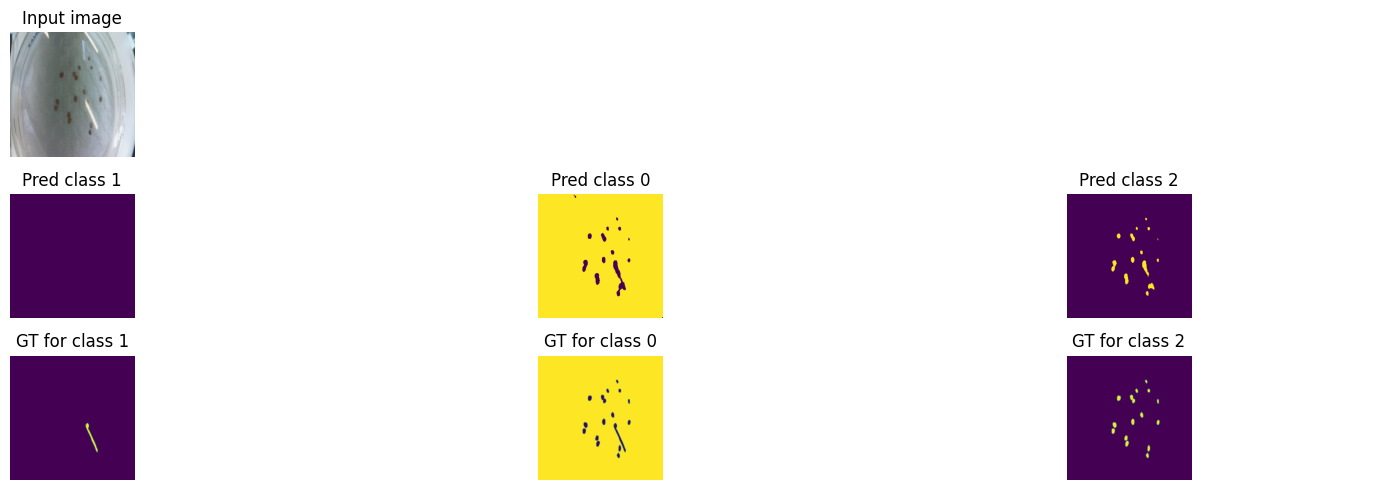

Train loss: 0.03393 | Time: 58m 30s | Val loss: 0.02818
Train_DICE_avg: 0.65082 | Train_Jaccard_avg: 0.59811 | Train_Sensitivity_avg: 0.94155 | Train_Specificity_avg: 0.89806 
Class 0 - Train_DICE: 0.98893 | Train_Jaccard: 0.97815 | Train_Sensitivity: 0.99510 | Train_Specificity: 0.72393 
Class 1 - Train_DICE: 0.28293 | Train_Jaccard: 0.28293 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.68061 | Train_Jaccard: 0.53324 | Train_Sensitivity: 0.82954 | Train_Specificity: 0.98450 
Val_DICE_avg: 0.69455 | Val_Jaccard_avg: 0.63981 | Val_Sensitivity_avg: 0.94817 | Val_Specificity_avg: 0.84650 
Class 0 - Val_DICE: 0.99040 | Val_Jaccard: 0.98102 | Val_Sensitivity: 0.99881 | Val_Specificity: 0.57051 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.62500 | Val_Jaccard: 0.47016 | Val_Sensitivity: 0.84571 | Val_Specificity: 0.98066 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]


Global Performance Metrics:
Loss mean: 0.02809, std: 0.00220
Dice Coefficient mean: 0.70664, std: 0.19454
Jaccard Index mean: 0.66371, std: 0.20124
Sensitivity mean: 0.71731, std: 0.16342
Specificity mean: 0.94985, std: 0.04018

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99442, std: 0.00326
Jaccard mean: 0.98892, std: 0.00638
Sensitivity mean: 0.99386, std: 0.00324
Specificity mean: 0.85669, std: 0.11909

Class 1:
Dice mean: 0.37454, std: 0.48230
Jaccard mean: 0.37454, std: 0.48230
Sensitivity mean: 0.37454, std: 0.48230
Specificity mean: 1.00000, std: 0.00000

Class 2:
Dice mean: 0.75095, std: 0.17262
Jaccard mean: 0.62767, std: 0.19204
Sensitivity mean: 0.78354, std: 0.09544
Specificity mean: 0.99286, std: 0.00949


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-FCN-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 4.34 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


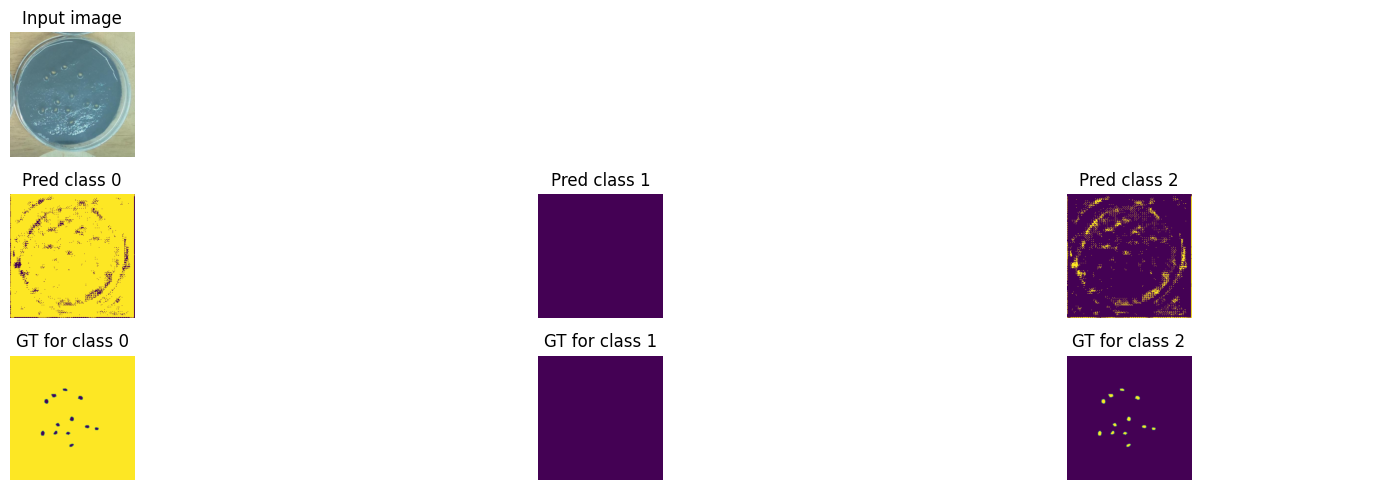

Train loss: 0.07688 | Time: 0m 57s | Val loss: 0.05782
Train_DICE_avg: 0.09825 | Train_Jaccard_avg: 0.09501 | Train_Sensitivity_avg: 0.93958 | Train_Specificity_avg: 0.66917 
Class 0 - Train_DICE: 0.02067 | Train_Jaccard: 0.01096 | Train_Sensitivity: 0.82157 | Train_Specificity: 0.06296 
Class 1 - Train_DICE: 0.27327 | Train_Jaccard: 0.27327 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98553 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 0.99718 | Train_Specificity: 0.95902 
Val_DICE_avg: 0.15823 | Val_Jaccard_avg: 0.15716 | Val_Sensitivity_avg: 0.92037 | Val_Specificity_avg: 0.65771 
Class 0 - Val_DICE: 0.00643 | Val_Jaccard: 0.00323 | Val_Sensitivity: 0.76110 | Val_Specificity: 0.02924 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.03338 | Time: 1m 53s | Val loss: 0.02527
Train_DICE_avg: 0.32564 | Train_Jaccard_avg: 0.29251 | Train_Sensitivity_avg: 0.97131 | Train_Specificity_avg: 0.68014 
Class 0 - Train_DICE: 0.70083 | Train_Jaccard: 0.60144 | Train_Sensitivity: 0.91393 | Train_Specificity: 0.09573 
Class 1 - Train_DICE: 0.27528 | Train_Jaccard: 0.27528 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95910 
Val_DICE_avg: 0.47736 | Val_Jaccard_avg: 0.46624 | Val_Sensitivity_avg: 0.99011 | Val_Specificity_avg: 0.66189 
Class 0 - Val_DICE: 0.96384 | Val_Jaccard: 0.93047 | Val_Sensitivity: 0.97033 | Val_Specificity: 0.04178 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


Train loss: 0.02166 | Time: 2m 50s | Val loss: 0.01714
Train_DICE_avg: 0.41346 | Train_Jaccard_avg: 0.40185 | Train_Sensitivity_avg: 0.97970 | Train_Specificity_avg: 0.73769 
Class 0 - Train_DICE: 0.96148 | Train_Jaccard: 0.92663 | Train_Sensitivity: 0.93909 | Train_Specificity: 0.26825 
Class 1 - Train_DICE: 0.27810 | Train_Jaccard: 0.27810 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95919 
Val_DICE_avg: 0.48304 | Val_Jaccard_avg: 0.47695 | Val_Sensitivity_avg: 0.99160 | Val_Specificity_avg: 0.70933 
Class 0 - Val_DICE: 0.98087 | Val_Jaccard: 0.96261 | Val_Sensitivity: 0.97481 | Val_Specificity: 0.18411 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.01664 | Time: 3m 47s | Val loss: 0.01272
Train_DICE_avg: 0.41652 | Train_Jaccard_avg: 0.40645 | Train_Sensitivity_avg: 0.98215 | Train_Specificity_avg: 0.81045 
Class 0 - Train_DICE: 0.96686 | Train_Jaccard: 0.93665 | Train_Sensitivity: 0.94644 | Train_Specificity: 0.48641 
Class 1 - Train_DICE: 0.28188 | Train_Jaccard: 0.28188 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95928 
Val_DICE_avg: 0.48435 | Val_Jaccard_avg: 0.47947 | Val_Sensitivity_avg: 0.99563 | Val_Specificity_avg: 0.77842 
Class 0 - Val_DICE: 0.98481 | Val_Jaccard: 0.97014 | Val_Sensitivity: 0.98689 | Val_Specificity: 0.39136 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95555 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.01358 | Time: 4m 44s | Val loss: 0.01019
Train_DICE_avg: 0.41530 | Train_Jaccard_avg: 0.40645 | Train_Sensitivity_avg: 0.98689 | Train_Specificity_avg: 0.84297 
Class 0 - Train_DICE: 0.97125 | Train_Jaccard: 0.94472 | Train_Sensitivity: 0.96067 | Train_Specificity: 0.58422 
Class 1 - Train_DICE: 0.27383 | Train_Jaccard: 0.27383 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95905 
Val_DICE_avg: 0.48484 | Val_Jaccard_avg: 0.48041 | Val_Sensitivity_avg: 0.99778 | Val_Specificity_avg: 0.80355 
Class 0 - Val_DICE: 0.98627 | Val_Jaccard: 0.97297 | Val_Sensitivity: 0.99333 | Val_Specificity: 0.46677 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95554 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


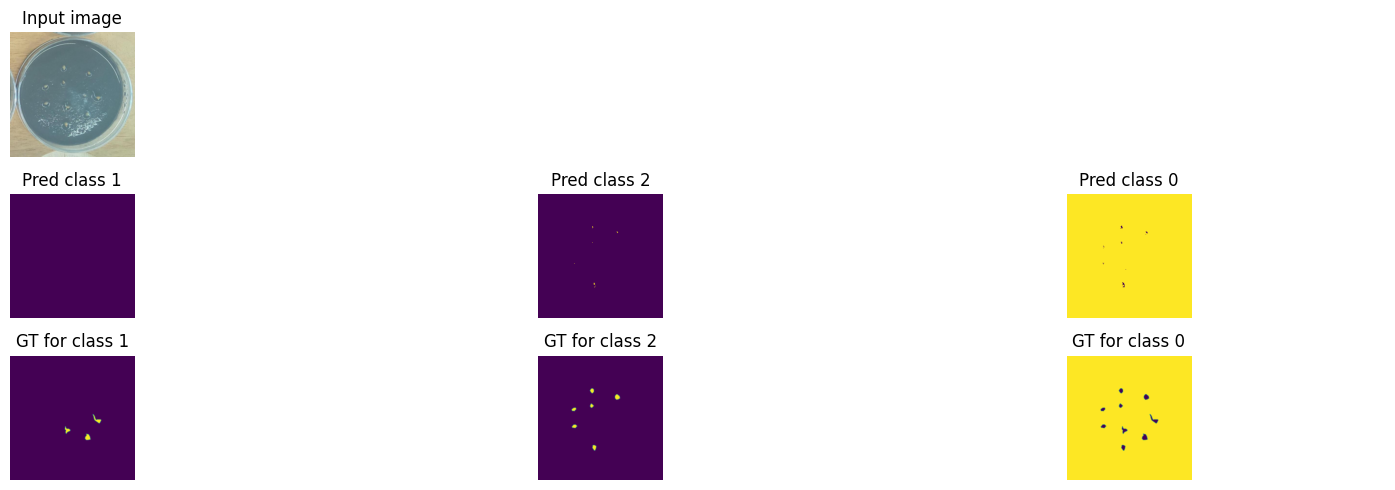

Train loss: 0.01167 | Time: 5m 41s | Val loss: 0.00876
Train_DICE_avg: 0.41581 | Train_Jaccard_avg: 0.40768 | Train_Sensitivity_avg: 0.98922 | Train_Specificity_avg: 0.85203 
Class 0 - Train_DICE: 0.97376 | Train_Jaccard: 0.94937 | Train_Sensitivity: 0.96767 | Train_Specificity: 0.61149 
Class 1 - Train_DICE: 0.27287 | Train_Jaccard: 0.27287 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98554 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95906 
Val_DICE_avg: 0.48503 | Val_Jaccard_avg: 0.48077 | Val_Sensitivity_avg: 0.99849 | Val_Specificity_avg: 0.80964 
Class 0 - Val_DICE: 0.98683 | Val_Jaccard: 0.97407 | Val_Sensitivity: 0.99546 | Val_Specificity: 0.48504 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95555 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.01055 | Time: 6m 38s | Val loss: 0.00787
Train_DICE_avg: 0.41910 | Train_Jaccard_avg: 0.41119 | Train_Sensitivity_avg: 0.98977 | Train_Specificity_avg: 0.85812 
Class 0 - Train_DICE: 0.97454 | Train_Jaccard: 0.95081 | Train_Sensitivity: 0.96930 | Train_Specificity: 0.62938 
Class 1 - Train_DICE: 0.28196 | Train_Jaccard: 0.28196 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95922 
Val_DICE_avg: 0.48506 | Val_Jaccard_avg: 0.48085 | Val_Sensitivity_avg: 0.99879 | Val_Specificity_avg: 0.81130 
Class 0 - Val_DICE: 0.98694 | Val_Jaccard: 0.97428 | Val_Sensitivity: 0.99637 | Val_Specificity: 0.49002 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95555 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.00974 | Time: 7m 34s | Val loss: 0.00720
Train_DICE_avg: 0.41860 | Train_Jaccard_avg: 0.41103 | Train_Sensitivity_avg: 0.99062 | Train_Specificity_avg: 0.86118 
Class 0 - Train_DICE: 0.97570 | Train_Jaccard: 0.95297 | Train_Sensitivity: 0.97186 | Train_Specificity: 0.63875 
Class 1 - Train_DICE: 0.27931 | Train_Jaccard: 0.27931 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98554 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95925 
Val_DICE_avg: 0.48519 | Val_Jaccard_avg: 0.48109 | Val_Sensitivity_avg: 0.99893 | Val_Specificity_avg: 0.81468 
Class 0 - Val_DICE: 0.98732 | Val_Jaccard: 0.97502 | Val_Sensitivity: 0.99680 | Val_Specificity: 0.50016 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95555 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.00911 | Time: 8m 31s | Val loss: 0.00670
Train_DICE_avg: 0.41999 | Train_Jaccard_avg: 0.41263 | Train_Sensitivity_avg: 0.99127 | Train_Specificity_avg: 0.86269 
Class 0 - Train_DICE: 0.97647 | Train_Jaccard: 0.95441 | Train_Sensitivity: 0.97382 | Train_Specificity: 0.64324 
Class 1 - Train_DICE: 0.28269 | Train_Jaccard: 0.28269 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98564 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95918 
Val_DICE_avg: 0.48514 | Val_Jaccard_avg: 0.48099 | Val_Sensitivity_avg: 0.99905 | Val_Specificity_avg: 0.81397 
Class 0 - Val_DICE: 0.98716 | Val_Jaccard: 0.97472 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.49802 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95555 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00862 | Time: 9m 27s | Val loss: 0.00627
Train_DICE_avg: 0.41962 | Train_Jaccard_avg: 0.41245 | Train_Sensitivity_avg: 0.99188 | Train_Specificity_avg: 0.86346 
Class 0 - Train_DICE: 0.97714 | Train_Jaccard: 0.95563 | Train_Sensitivity: 0.97565 | Train_Specificity: 0.64531 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98576 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95930 
Val_DICE_avg: 0.48515 | Val_Jaccard_avg: 0.48102 | Val_Sensitivity_avg: 0.99913 | Val_Specificity_avg: 0.81475 
Class 0 - Val_DICE: 0.98720 | Val_Jaccard: 0.97481 | Val_Sensitivity: 0.99739 | Val_Specificity: 0.50037 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


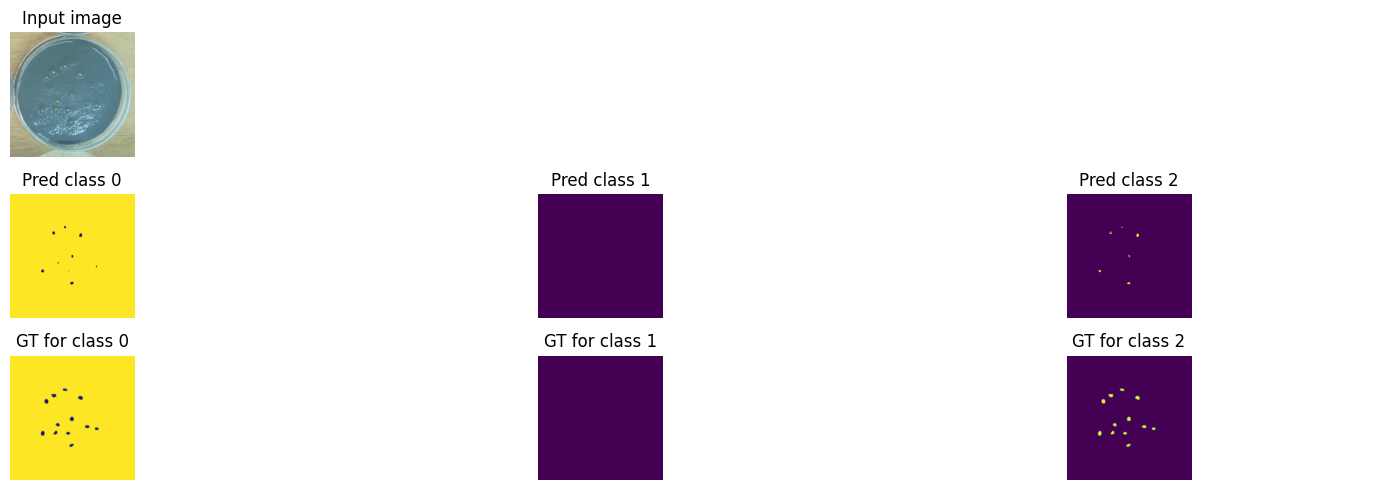

Train loss: 0.00777 | Time: 10m 24s | Val loss: 0.00525
Train_DICE_avg: 0.42037 | Train_Jaccard_avg: 0.41355 | Train_Sensitivity_avg: 0.99242 | Train_Specificity_avg: 0.86688 
Class 0 - Train_DICE: 0.97833 | Train_Jaccard: 0.95789 | Train_Sensitivity: 0.97726 | Train_Specificity: 0.65565 
Class 1 - Train_DICE: 0.28196 | Train_Jaccard: 0.28196 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.00081 | Train_Jaccard: 0.00081 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.95925 
Val_DICE_avg: 0.48518 | Val_Jaccard_avg: 0.48107 | Val_Sensitivity_avg: 0.99921 | Val_Specificity_avg: 0.81652 
Class 0 - Val_DICE: 0.98728 | Val_Jaccard: 0.97497 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.50566 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00722 | Time: 11m 22s | Val loss: 0.00490
Train_DICE_avg: 0.41936 | Train_Jaccard_avg: 0.41261 | Train_Sensitivity_avg: 0.99206 | Train_Specificity_avg: 0.86325 
Class 0 - Train_DICE: 0.97858 | Train_Jaccard: 0.95833 | Train_Sensitivity: 0.97984 | Train_Specificity: 0.64465 
Class 1 - Train_DICE: 0.27866 | Train_Jaccard: 0.27866 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.00085 | Train_Jaccard: 0.00083 | Train_Sensitivity: 0.99634 | Train_Specificity: 0.95933 
Val_DICE_avg: 0.48645 | Val_Jaccard_avg: 0.48227 | Val_Sensitivity_avg: 0.97489 | Val_Specificity_avg: 0.82556 
Class 0 - Val_DICE: 0.98844 | Val_Jaccard: 0.97723 | Val_Sensitivity: 0.99755 | Val_Specificity: 0.53272 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.00266 | Val_Jaccard: 0.00134 | Val_Sensitivity: 0.92712 | Val_Specificity: 0.95564 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00684 | Time: 12m 19s | Val loss: 0.00465
Train_DICE_avg: 0.47024 | Train_Jaccard_avg: 0.44423 | Train_Sensitivity_avg: 0.95212 | Train_Specificity_avg: 0.86505 
Class 0 - Train_DICE: 0.97917 | Train_Jaccard: 0.95945 | Train_Sensitivity: 0.98094 | Train_Specificity: 0.64605 
Class 1 - Train_DICE: 0.28776 | Train_Jaccard: 0.28776 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.14378 | Train_Jaccard: 0.08549 | Train_Sensitivity: 0.87542 | Train_Specificity: 0.96330 
Val_DICE_avg: 0.57986 | Val_Jaccard_avg: 0.54028 | Val_Sensitivity_avg: 0.95465 | Val_Specificity_avg: 0.82364 
Class 0 - Val_DICE: 0.98780 | Val_Jaccard: 0.97597 | Val_Sensitivity: 0.99783 | Val_Specificity: 0.51724 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.28353 | Val_Jaccard: 0.17660 | Val_Sensitivity: 0.86613 | Val_Specificity: 0.96533 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.00653 | Time: 13m 16s | Val loss: 0.00447
Train_DICE_avg: 0.54683 | Train_Jaccard_avg: 0.49707 | Train_Sensitivity_avg: 0.93772 | Train_Specificity_avg: 0.86769 
Class 0 - Train_DICE: 0.97982 | Train_Jaccard: 0.96067 | Train_Sensitivity: 0.98227 | Train_Specificity: 0.64672 
Class 1 - Train_DICE: 0.28148 | Train_Jaccard: 0.28148 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98538 
Class 2 - Train_DICE: 0.37919 | Train_Jaccard: 0.24904 | Train_Sensitivity: 0.83089 | Train_Specificity: 0.97098 
Val_DICE_avg: 0.61964 | Val_Jaccard_avg: 0.57060 | Val_Sensitivity_avg: 0.95206 | Val_Specificity_avg: 0.82389 
Class 0 - Val_DICE: 0.98759 | Val_Jaccard: 0.97557 | Val_Sensitivity: 0.99797 | Val_Specificity: 0.51310 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.40309 | Val_Jaccard: 0.26799 | Val_Sensitivity: 0.85820 | Val_Specificity: 0.97023 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.00634 | Time: 14m 13s | Val loss: 0.00436
Train_DICE_avg: 0.57411 | Train_Jaccard_avg: 0.51954 | Train_Sensitivity_avg: 0.93564 | Train_Specificity_avg: 0.86927 
Class 0 - Train_DICE: 0.98017 | Train_Jaccard: 0.96132 | Train_Sensitivity: 0.98257 | Train_Specificity: 0.64786 
Class 1 - Train_DICE: 0.27770 | Train_Jaccard: 0.27770 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98550 
Class 2 - Train_DICE: 0.46445 | Train_Jaccard: 0.31959 | Train_Sensitivity: 0.82436 | Train_Specificity: 0.97446 
Val_DICE_avg: 0.64173 | Val_Jaccard_avg: 0.58871 | Val_Sensitivity_avg: 0.95086 | Val_Specificity_avg: 0.82278 
Class 0 - Val_DICE: 0.98732 | Val_Jaccard: 0.97505 | Val_Sensitivity: 0.99808 | Val_Specificity: 0.50706 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.46962 | Val_Jaccard: 0.32284 | Val_Sensitivity: 0.85450 | Val_Specificity: 0.97295 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


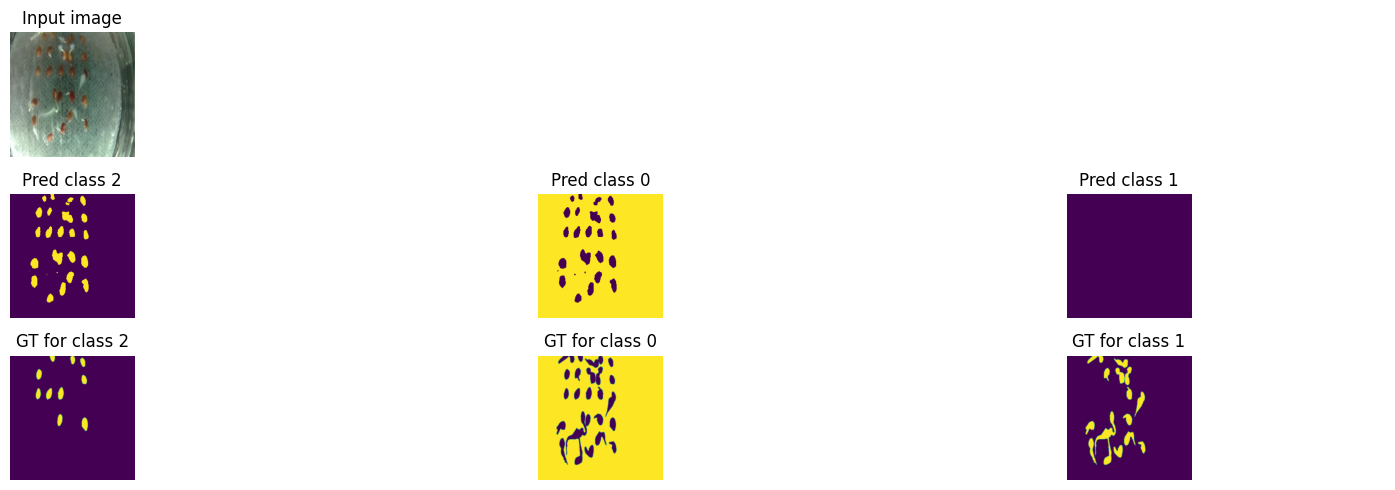

Train loss: 0.00624 | Time: 15m 11s | Val loss: 0.00426
Train_DICE_avg: 0.59296 | Train_Jaccard_avg: 0.53666 | Train_Sensitivity_avg: 0.93274 | Train_Specificity_avg: 0.87278 
Class 0 - Train_DICE: 0.98046 | Train_Jaccard: 0.96188 | Train_Sensitivity: 0.98295 | Train_Specificity: 0.65608 
Class 1 - Train_DICE: 0.28519 | Train_Jaccard: 0.28519 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.51324 | Train_Jaccard: 0.36292 | Train_Sensitivity: 0.81527 | Train_Specificity: 0.97654 
Val_DICE_avg: 0.64865 | Val_Jaccard_avg: 0.59474 | Val_Sensitivity_avg: 0.95050 | Val_Specificity_avg: 0.82592 
Class 0 - Val_DICE: 0.98777 | Val_Jaccard: 0.97592 | Val_Sensitivity: 0.99812 | Val_Specificity: 0.51562 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.48992 | Val_Jaccard: 0.34005 | Val_Sensitivity: 0.85339 | Val_Specificity: 0.97380 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00618 | Time: 16m 8s | Val loss: 0.00420
Train_DICE_avg: 0.60205 | Train_Jaccard_avg: 0.54494 | Train_Sensitivity_avg: 0.93091 | Train_Specificity_avg: 0.87472 
Class 0 - Train_DICE: 0.98033 | Train_Jaccard: 0.96162 | Train_Sensitivity: 0.98244 | Train_Specificity: 0.66033 
Class 1 - Train_DICE: 0.28357 | Train_Jaccard: 0.28357 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98589 
Class 2 - Train_DICE: 0.54225 | Train_Jaccard: 0.38962 | Train_Sensitivity: 0.81030 | Train_Specificity: 0.97794 
Val_DICE_avg: 0.65830 | Val_Jaccard_avg: 0.60363 | Val_Sensitivity_avg: 0.94997 | Val_Specificity_avg: 0.82501 
Class 0 - Val_DICE: 0.98751 | Val_Jaccard: 0.97542 | Val_Sensitivity: 0.99820 | Val_Specificity: 0.51133 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.51912 | Val_Jaccard: 0.36723 | Val_Sensitivity: 0.85170 | Val_Specificity: 0.97537 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00604 | Time: 17m 6s | Val loss: 0.00415
Train_DICE_avg: 0.60477 | Train_Jaccard_avg: 0.54784 | Train_Sensitivity_avg: 0.93059 | Train_Specificity_avg: 0.87454 
Class 0 - Train_DICE: 0.98099 | Train_Jaccard: 0.96288 | Train_Sensitivity: 0.98370 | Train_Specificity: 0.65963 
Class 1 - Train_DICE: 0.28092 | Train_Jaccard: 0.28092 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98560 
Class 2 - Train_DICE: 0.55239 | Train_Jaccard: 0.39971 | Train_Sensitivity: 0.80808 | Train_Specificity: 0.97837 
Val_DICE_avg: 0.66661 | Val_Jaccard_avg: 0.61087 | Val_Sensitivity_avg: 0.94924 | Val_Specificity_avg: 0.82258 
Class 0 - Val_DICE: 0.98715 | Val_Jaccard: 0.97471 | Val_Sensitivity: 0.99831 | Val_Specificity: 0.50300 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54444 | Val_Jaccard: 0.38964 | Val_Sensitivity: 0.84940 | Val_Specificity: 0.97639 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00591 | Time: 18m 3s | Val loss: 0.00408
Train_DICE_avg: 0.60727 | Train_Jaccard_avg: 0.55025 | Train_Sensitivity_avg: 0.93063 | Train_Specificity_avg: 0.87482 
Class 0 - Train_DICE: 0.98147 | Train_Jaccard: 0.96378 | Train_Sensitivity: 0.98443 | Train_Specificity: 0.65993 
Class 1 - Train_DICE: 0.27424 | Train_Jaccard: 0.27424 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.56610 | Train_Jaccard: 0.41273 | Train_Sensitivity: 0.80746 | Train_Specificity: 0.97898 
Val_DICE_avg: 0.66970 | Val_Jaccard_avg: 0.61388 | Val_Sensitivity_avg: 0.94916 | Val_Specificity_avg: 0.82435 
Class 0 - Val_DICE: 0.98740 | Val_Jaccard: 0.97520 | Val_Sensitivity: 0.99832 | Val_Specificity: 0.50790 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.55344 | Val_Jaccard: 0.39820 | Val_Sensitivity: 0.84916 | Val_Specificity: 0.97683 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00598 | Time: 19m 0s | Val loss: 0.00405
Train_DICE_avg: 0.61349 | Train_Jaccard_avg: 0.55637 | Train_Sensitivity_avg: 0.92952 | Train_Specificity_avg: 0.87777 
Class 0 - Train_DICE: 0.98105 | Train_Jaccard: 0.96300 | Train_Sensitivity: 0.98342 | Train_Specificity: 0.66754 
Class 1 - Train_DICE: 0.28277 | Train_Jaccard: 0.28277 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98605 
Class 2 - Train_DICE: 0.57664 | Train_Jaccard: 0.42334 | Train_Sensitivity: 0.80513 | Train_Specificity: 0.97972 
Val_DICE_avg: 0.66693 | Val_Jaccard_avg: 0.61146 | Val_Sensitivity_avg: 0.94916 | Val_Specificity_avg: 0.82725 
Class 0 - Val_DICE: 0.98784 | Val_Jaccard: 0.97605 | Val_Sensitivity: 0.99830 | Val_Specificity: 0.51697 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54470 | Val_Jaccard: 0.39007 | Val_Sensitivity: 0.84917 | Val_Specificity: 0.97644 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


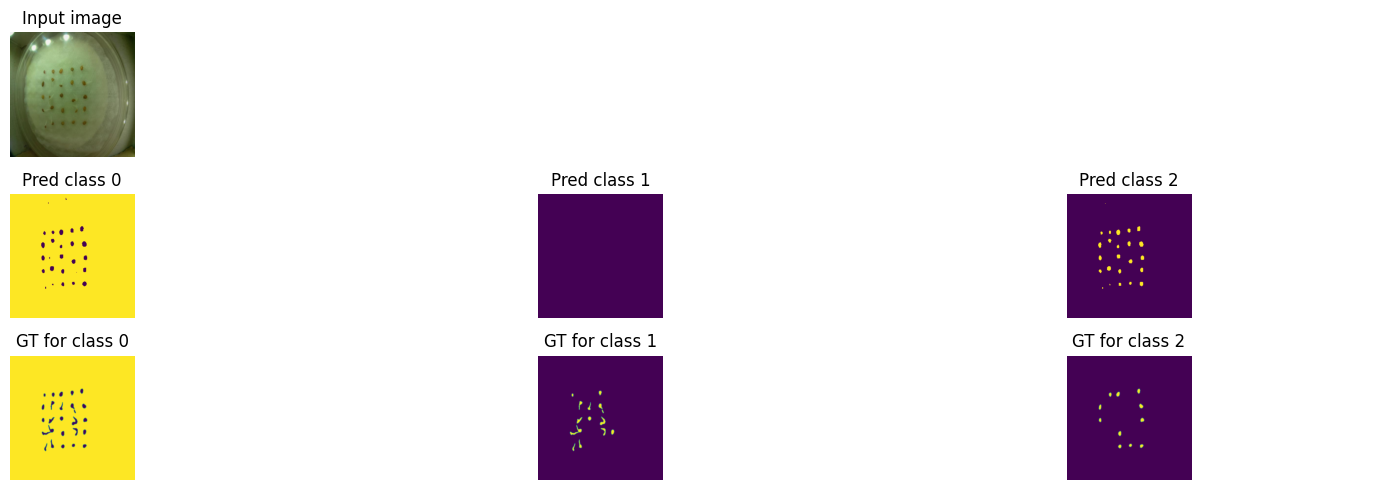

Train loss: 0.00588 | Time: 19m 58s | Val loss: 0.00397
Train_DICE_avg: 0.61582 | Train_Jaccard_avg: 0.55850 | Train_Sensitivity_avg: 0.93088 | Train_Specificity_avg: 0.87797 
Class 0 - Train_DICE: 0.98141 | Train_Jaccard: 0.96368 | Train_Sensitivity: 0.98398 | Train_Specificity: 0.66848 
Class 1 - Train_DICE: 0.28494 | Train_Jaccard: 0.28494 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.58111 | Train_Jaccard: 0.42687 | Train_Sensitivity: 0.80865 | Train_Specificity: 0.97980 
Val_DICE_avg: 0.67652 | Val_Jaccard_avg: 0.61975 | Val_Sensitivity_avg: 0.94864 | Val_Specificity_avg: 0.82131 
Class 0 - Val_DICE: 0.98706 | Val_Jaccard: 0.97453 | Val_Sensitivity: 0.99850 | Val_Specificity: 0.49804 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57424 | Val_Jaccard: 0.41646 | Val_Sensitivity: 0.84742 | Val_Specificity: 0.97756 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.00570 | Time: 20m 55s | Val loss: 0.00386
Train_DICE_avg: 0.61705 | Train_Jaccard_avg: 0.55983 | Train_Sensitivity_avg: 0.93137 | Train_Specificity_avg: 0.87688 
Class 0 - Train_DICE: 0.98188 | Train_Jaccard: 0.96456 | Train_Sensitivity: 0.98540 | Train_Specificity: 0.66481 
Class 1 - Train_DICE: 0.27874 | Train_Jaccard: 0.27874 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98560 
Class 2 - Train_DICE: 0.59053 | Train_Jaccard: 0.43619 | Train_Sensitivity: 0.80871 | Train_Specificity: 0.98024 
Val_DICE_avg: 0.66991 | Val_Jaccard_avg: 0.61402 | Val_Sensitivity_avg: 0.94881 | Val_Specificity_avg: 0.82814 
Class 0 - Val_DICE: 0.98790 | Val_Jaccard: 0.97619 | Val_Sensitivity: 0.99852 | Val_Specificity: 0.51914 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.55358 | Val_Jaccard: 0.39760 | Val_Sensitivity: 0.84791 | Val_Specificity: 0.97695 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.00565 | Time: 21m 52s | Val loss: 0.00381
Train_DICE_avg: 0.61807 | Train_Jaccard_avg: 0.56104 | Train_Sensitivity_avg: 0.93100 | Train_Specificity_avg: 0.87908 
Class 0 - Train_DICE: 0.98218 | Train_Jaccard: 0.96514 | Train_Sensitivity: 0.98569 | Train_Specificity: 0.67131 
Class 1 - Train_DICE: 0.28027 | Train_Jaccard: 0.28027 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.59177 | Train_Jaccard: 0.43772 | Train_Sensitivity: 0.80731 | Train_Specificity: 0.98039 
Val_DICE_avg: 0.67334 | Val_Jaccard_avg: 0.61708 | Val_Sensitivity_avg: 0.94839 | Val_Specificity_avg: 0.82694 
Class 0 - Val_DICE: 0.98775 | Val_Jaccard: 0.97589 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.51511 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56401 | Val_Jaccard: 0.40710 | Val_Sensitivity: 0.84658 | Val_Specificity: 0.97737 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00555 | Time: 22m 49s | Val loss: 0.00379
Train_DICE_avg: 0.61852 | Train_Jaccard_avg: 0.56134 | Train_Sensitivity_avg: 0.93137 | Train_Specificity_avg: 0.87772 
Class 0 - Train_DICE: 0.98247 | Train_Jaccard: 0.96569 | Train_Sensitivity: 0.98646 | Train_Specificity: 0.66718 
Class 1 - Train_DICE: 0.27568 | Train_Jaccard: 0.27568 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98553 
Class 2 - Train_DICE: 0.59741 | Train_Jaccard: 0.44263 | Train_Sensitivity: 0.80765 | Train_Specificity: 0.98044 
Val_DICE_avg: 0.67912 | Val_Jaccard_avg: 0.62249 | Val_Sensitivity_avg: 0.94755 | Val_Specificity_avg: 0.82296 
Class 0 - Val_DICE: 0.98713 | Val_Jaccard: 0.97469 | Val_Sensitivity: 0.99868 | Val_Specificity: 0.50230 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58198 | Val_Jaccard: 0.42453 | Val_Sensitivity: 0.84396 | Val_Specificity: 0.97823 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00552 | Time: 23m 47s | Val loss: 0.00374
Train_DICE_avg: 0.62194 | Train_Jaccard_avg: 0.56493 | Train_Sensitivity_avg: 0.93182 | Train_Specificity_avg: 0.88040 
Class 0 - Train_DICE: 0.98273 | Train_Jaccard: 0.96618 | Train_Sensitivity: 0.98648 | Train_Specificity: 0.67439 
Class 1 - Train_DICE: 0.28011 | Train_Jaccard: 0.28011 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98581 
Class 2 - Train_DICE: 0.60297 | Train_Jaccard: 0.44849 | Train_Sensitivity: 0.80897 | Train_Specificity: 0.98100 
Val_DICE_avg: 0.67167 | Val_Jaccard_avg: 0.61580 | Val_Sensitivity_avg: 0.94777 | Val_Specificity_avg: 0.82950 
Class 0 - Val_DICE: 0.98813 | Val_Jaccard: 0.97662 | Val_Sensitivity: 0.99862 | Val_Specificity: 0.52294 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.55862 | Val_Jaccard: 0.40252 | Val_Sensitivity: 0.84469 | Val_Specificity: 0.97724 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


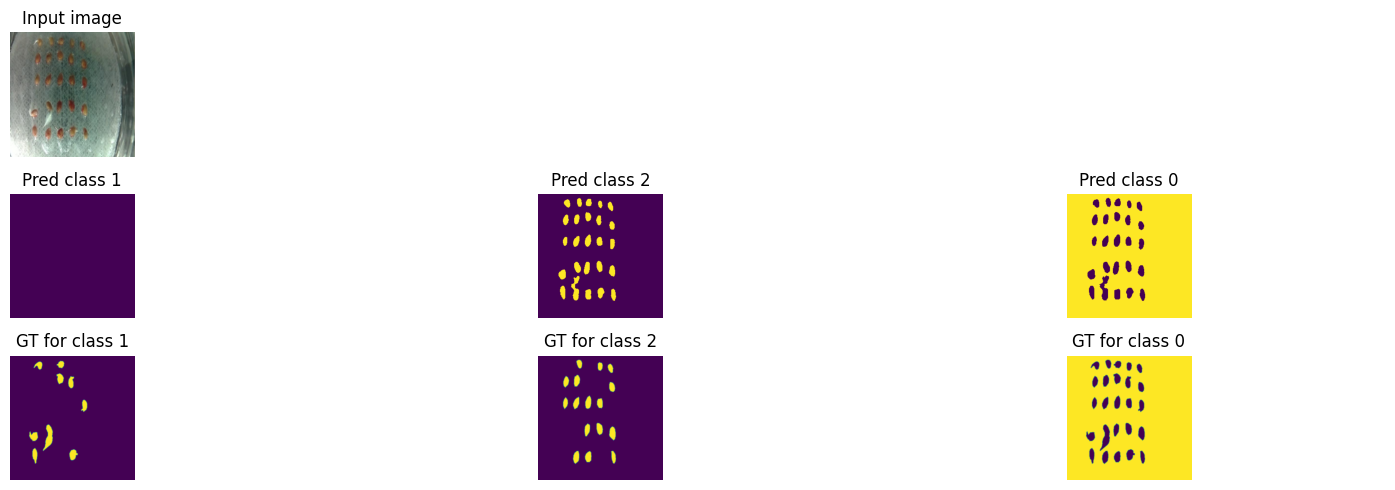

Train loss: 0.00543 | Time: 24m 45s | Val loss: 0.00369
Train_DICE_avg: 0.62257 | Train_Jaccard_avg: 0.56564 | Train_Sensitivity_avg: 0.93239 | Train_Specificity_avg: 0.87907 
Class 0 - Train_DICE: 0.98291 | Train_Jaccard: 0.96652 | Train_Sensitivity: 0.98697 | Train_Specificity: 0.67068 
Class 1 - Train_DICE: 0.28156 | Train_Jaccard: 0.28156 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.60324 | Train_Jaccard: 0.44883 | Train_Sensitivity: 0.81019 | Train_Specificity: 0.98074 
Val_DICE_avg: 0.67451 | Val_Jaccard_avg: 0.61841 | Val_Sensitivity_avg: 0.94738 | Val_Specificity_avg: 0.82794 
Class 0 - Val_DICE: 0.98790 | Val_Jaccard: 0.97619 | Val_Sensitivity: 0.99868 | Val_Specificity: 0.51788 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56739 | Val_Jaccard: 0.41079 | Val_Sensitivity: 0.84345 | Val_Specificity: 0.97761 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.00536 | Time: 25m 42s | Val loss: 0.00365
Train_DICE_avg: 0.62431 | Train_Jaccard_avg: 0.56752 | Train_Sensitivity_avg: 0.93285 | Train_Specificity_avg: 0.88053 
Class 0 - Train_DICE: 0.98323 | Train_Jaccard: 0.96715 | Train_Sensitivity: 0.98748 | Train_Specificity: 0.67461 
Class 1 - Train_DICE: 0.28494 | Train_Jaccard: 0.28494 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98598 
Class 2 - Train_DICE: 0.60477 | Train_Jaccard: 0.45046 | Train_Sensitivity: 0.81107 | Train_Specificity: 0.98100 
Val_DICE_avg: 0.67635 | Val_Jaccard_avg: 0.62027 | Val_Sensitivity_avg: 0.94729 | Val_Specificity_avg: 0.82714 
Class 0 - Val_DICE: 0.98773 | Val_Jaccard: 0.97584 | Val_Sensitivity: 0.99872 | Val_Specificity: 0.51505 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57306 | Val_Jaccard: 0.41672 | Val_Sensitivity: 0.84316 | Val_Specificity: 0.97802 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.00532 | Time: 26m 39s | Val loss: 0.00361
Train_DICE_avg: 0.62332 | Train_Jaccard_avg: 0.56633 | Train_Sensitivity_avg: 0.93257 | Train_Specificity_avg: 0.88056 
Class 0 - Train_DICE: 0.98328 | Train_Jaccard: 0.96724 | Train_Sensitivity: 0.98768 | Train_Specificity: 0.67535 
Class 1 - Train_DICE: 0.27995 | Train_Jaccard: 0.27995 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98553 
Class 2 - Train_DICE: 0.60672 | Train_Jaccard: 0.45179 | Train_Sensitivity: 0.81003 | Train_Specificity: 0.98082 
Val_DICE_avg: 0.67292 | Val_Jaccard_avg: 0.61692 | Val_Sensitivity_avg: 0.94723 | Val_Specificity_avg: 0.82963 
Class 0 - Val_DICE: 0.98821 | Val_Jaccard: 0.97677 | Val_Sensitivity: 0.99869 | Val_Specificity: 0.52320 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56231 | Val_Jaccard: 0.40575 | Val_Sensitivity: 0.84300 | Val_Specificity: 0.97735 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.00525 | Time: 27m 36s | Val loss: 0.00358
Train_DICE_avg: 0.62575 | Train_Jaccard_avg: 0.56892 | Train_Sensitivity_avg: 0.93405 | Train_Specificity_avg: 0.88136 
Class 0 - Train_DICE: 0.98359 | Train_Jaccard: 0.96783 | Train_Sensitivity: 0.98814 | Train_Specificity: 0.67733 
Class 1 - Train_DICE: 0.28470 | Train_Jaccard: 0.28470 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.60895 | Train_Jaccard: 0.45424 | Train_Sensitivity: 0.81401 | Train_Specificity: 0.98102 
Val_DICE_avg: 0.67576 | Val_Jaccard_avg: 0.61926 | Val_Sensitivity_avg: 0.94715 | Val_Specificity_avg: 0.82434 
Class 0 - Val_DICE: 0.98759 | Val_Jaccard: 0.97556 | Val_Sensitivity: 0.99880 | Val_Specificity: 0.50701 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57145 | Val_Jaccard: 0.41396 | Val_Sensitivity: 0.84266 | Val_Specificity: 0.97768 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.00519 | Time: 28m 33s | Val loss: 0.00349
Train_DICE_avg: 0.62682 | Train_Jaccard_avg: 0.56990 | Train_Sensitivity_avg: 0.93543 | Train_Specificity_avg: 0.88389 
Class 0 - Train_DICE: 0.98387 | Train_Jaccard: 0.96837 | Train_Sensitivity: 0.98836 | Train_Specificity: 0.68461 
Class 1 - Train_DICE: 0.28293 | Train_Jaccard: 0.28293 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98588 
Class 2 - Train_DICE: 0.61366 | Train_Jaccard: 0.45841 | Train_Sensitivity: 0.81793 | Train_Specificity: 0.98117 
Val_DICE_avg: 0.67308 | Val_Jaccard_avg: 0.61703 | Val_Sensitivity_avg: 0.94722 | Val_Specificity_avg: 0.83063 
Class 0 - Val_DICE: 0.98833 | Val_Jaccard: 0.97702 | Val_Sensitivity: 0.99873 | Val_Specificity: 0.52619 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56264 | Val_Jaccard: 0.40583 | Val_Sensitivity: 0.84292 | Val_Specificity: 0.97735 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


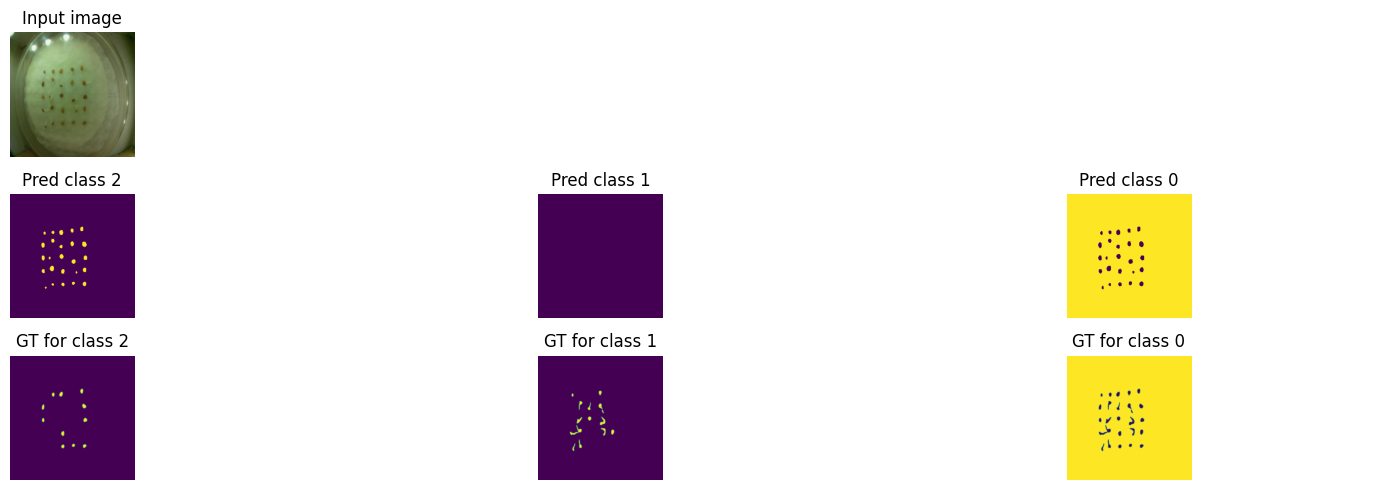

Train loss: 0.00496 | Time: 29m 31s | Val loss: 0.00344
Train_DICE_avg: 0.62797 | Train_Jaccard_avg: 0.57133 | Train_Sensitivity_avg: 0.93817 | Train_Specificity_avg: 0.88196 
Class 0 - Train_DICE: 0.98451 | Train_Jaccard: 0.96960 | Train_Sensitivity: 0.98943 | Train_Specificity: 0.67908 
Class 1 - Train_DICE: 0.28253 | Train_Jaccard: 0.28253 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.61688 | Train_Jaccard: 0.46185 | Train_Sensitivity: 0.82507 | Train_Specificity: 0.98109 
Val_DICE_avg: 0.67835 | Val_Jaccard_avg: 0.62190 | Val_Sensitivity_avg: 0.94731 | Val_Specificity_avg: 0.82794 
Class 0 - Val_DICE: 0.98806 | Val_Jaccard: 0.97647 | Val_Sensitivity: 0.99883 | Val_Specificity: 0.51745 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57872 | Val_Jaccard: 0.42097 | Val_Sensitivity: 0.84311 | Val_Specificity: 0.97802 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00483 | Time: 30m 28s | Val loss: 0.00336
Train_DICE_avg: 0.62908 | Train_Jaccard_avg: 0.57280 | Train_Sensitivity_avg: 0.93880 | Train_Specificity_avg: 0.88585 
Class 0 - Train_DICE: 0.98511 | Train_Jaccard: 0.97074 | Train_Sensitivity: 0.99003 | Train_Specificity: 0.69032 
Class 1 - Train_DICE: 0.27705 | Train_Jaccard: 0.27705 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98569 
Class 2 - Train_DICE: 0.62507 | Train_Jaccard: 0.47060 | Train_Sensitivity: 0.82637 | Train_Specificity: 0.98155 
Val_DICE_avg: 0.67878 | Val_Jaccard_avg: 0.62262 | Val_Sensitivity_avg: 0.94711 | Val_Specificity_avg: 0.83305 
Class 0 - Val_DICE: 0.98873 | Val_Jaccard: 0.97779 | Val_Sensitivity: 0.99876 | Val_Specificity: 0.53269 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.57934 | Val_Jaccard: 0.42181 | Val_Sensitivity: 0.84256 | Val_Specificity: 0.97813 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00469 | Time: 31m 25s | Val loss: 0.00334
Train_DICE_avg: 0.63249 | Train_Jaccard_avg: 0.57669 | Train_Sensitivity_avg: 0.94000 | Train_Specificity_avg: 0.88628 
Class 0 - Train_DICE: 0.98563 | Train_Jaccard: 0.97176 | Train_Sensitivity: 0.99067 | Train_Specificity: 0.69130 
Class 1 - Train_DICE: 0.27971 | Train_Jaccard: 0.27971 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98564 
Class 2 - Train_DICE: 0.63214 | Train_Jaccard: 0.47860 | Train_Sensitivity: 0.82932 | Train_Specificity: 0.98191 
Val_DICE_avg: 0.68325 | Val_Jaccard_avg: 0.62726 | Val_Sensitivity_avg: 0.94668 | Val_Specificity_avg: 0.83314 
Class 0 - Val_DICE: 0.98876 | Val_Jaccard: 0.97784 | Val_Sensitivity: 0.99879 | Val_Specificity: 0.53222 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.59272 | Val_Jaccard: 0.43570 | Val_Sensitivity: 0.84123 | Val_Specificity: 0.97887 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00459 | Time: 32m 23s | Val loss: 0.00327
Train_DICE_avg: 0.63424 | Train_Jaccard_avg: 0.57887 | Train_Sensitivity_avg: 0.94000 | Train_Specificity_avg: 0.88961 
Class 0 - Train_DICE: 0.98603 | Train_Jaccard: 0.97254 | Train_Sensitivity: 0.99106 | Train_Specificity: 0.70060 
Class 1 - Train_DICE: 0.27689 | Train_Jaccard: 0.27689 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98584 
Class 2 - Train_DICE: 0.63980 | Train_Jaccard: 0.48718 | Train_Sensitivity: 0.82893 | Train_Specificity: 0.98239 
Val_DICE_avg: 0.68349 | Val_Jaccard_avg: 0.62766 | Val_Sensitivity_avg: 0.94699 | Val_Specificity_avg: 0.84020 
Class 0 - Val_DICE: 0.98967 | Val_Jaccard: 0.97962 | Val_Sensitivity: 0.99862 | Val_Specificity: 0.55342 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.59254 | Val_Jaccard: 0.43510 | Val_Sensitivity: 0.84235 | Val_Specificity: 0.97885 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00445 | Time: 33m 21s | Val loss: 0.00331
Train_DICE_avg: 0.63806 | Train_Jaccard_avg: 0.58297 | Train_Sensitivity_avg: 0.94012 | Train_Specificity_avg: 0.89081 
Class 0 - Train_DICE: 0.98664 | Train_Jaccard: 0.97370 | Train_Sensitivity: 0.99171 | Train_Specificity: 0.70432 
Class 1 - Train_DICE: 0.28333 | Train_Jaccard: 0.28333 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.64421 | Train_Jaccard: 0.49186 | Train_Sensitivity: 0.82864 | Train_Specificity: 0.98254 
Val_DICE_avg: 0.68754 | Val_Jaccard_avg: 0.63198 | Val_Sensitivity_avg: 0.94651 | Val_Specificity_avg: 0.84170 
Class 0 - Val_DICE: 0.98981 | Val_Jaccard: 0.97989 | Val_Sensitivity: 0.99860 | Val_Specificity: 0.55719 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60456 | Val_Jaccard: 0.44780 | Val_Sensitivity: 0.84094 | Val_Specificity: 0.97958 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


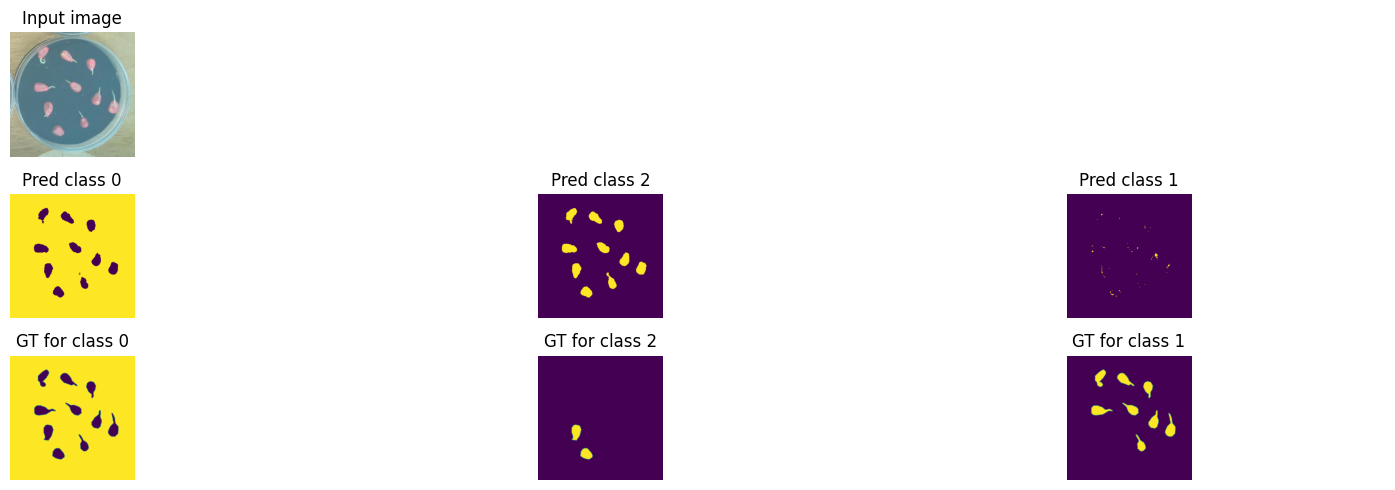

Train loss: 0.00438 | Time: 34m 19s | Val loss: 0.00331
Train_DICE_avg: 0.63841 | Train_Jaccard_avg: 0.58388 | Train_Sensitivity_avg: 0.93973 | Train_Specificity_avg: 0.89421 
Class 0 - Train_DICE: 0.98706 | Train_Jaccard: 0.97453 | Train_Sensitivity: 0.99182 | Train_Specificity: 0.71376 
Class 1 - Train_DICE: 0.27609 | Train_Jaccard: 0.27609 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98580 
Class 2 - Train_DICE: 0.65209 | Train_Jaccard: 0.50104 | Train_Sensitivity: 0.82736 | Train_Specificity: 0.98309 
Val_DICE_avg: 0.68828 | Val_Jaccard_avg: 0.63301 | Val_Sensitivity_avg: 0.94632 | Val_Specificity_avg: 0.84522 
Class 0 - Val_DICE: 0.99020 | Val_Jaccard: 0.98066 | Val_Sensitivity: 0.99856 | Val_Specificity: 0.56758 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60639 | Val_Jaccard: 0.45012 | Val_Sensitivity: 0.84040 | Val_Specificity: 0.97974 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.00428 | Time: 35m 17s | Val loss: 0.00330
Train_DICE_avg: 0.64112 | Train_Jaccard_avg: 0.58685 | Train_Sensitivity_avg: 0.93960 | Train_Specificity_avg: 0.89461 
Class 0 - Train_DICE: 0.98739 | Train_Jaccard: 0.97517 | Train_Sensitivity: 0.99234 | Train_Specificity: 0.71501 
Class 1 - Train_DICE: 0.27971 | Train_Jaccard: 0.27971 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.65627 | Train_Jaccard: 0.50568 | Train_Sensitivity: 0.82645 | Train_Specificity: 0.98318 
Val_DICE_avg: 0.68838 | Val_Jaccard_avg: 0.63311 | Val_Sensitivity_avg: 0.94641 | Val_Specificity_avg: 0.84829 
Class 0 - Val_DICE: 0.99061 | Val_Jaccard: 0.98145 | Val_Sensitivity: 0.99852 | Val_Specificity: 0.57689 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60628 | Val_Jaccard: 0.44964 | Val_Sensitivity: 0.84072 | Val_Specificity: 0.97966 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.00424 | Time: 36m 14s | Val loss: 0.00324
Train_DICE_avg: 0.64256 | Train_Jaccard_avg: 0.58845 | Train_Sensitivity_avg: 0.93939 | Train_Specificity_avg: 0.89375 
Class 0 - Train_DICE: 0.98759 | Train_Jaccard: 0.97555 | Train_Sensitivity: 0.99240 | Train_Specificity: 0.71244 
Class 1 - Train_DICE: 0.28237 | Train_Jaccard: 0.28237 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98553 
Class 2 - Train_DICE: 0.65773 | Train_Jaccard: 0.50744 | Train_Sensitivity: 0.82576 | Train_Specificity: 0.98328 
Val_DICE_avg: 0.69116 | Val_Jaccard_avg: 0.63602 | Val_Sensitivity_avg: 0.94615 | Val_Specificity_avg: 0.84766 
Class 0 - Val_DICE: 0.99050 | Val_Jaccard: 0.98124 | Val_Sensitivity: 0.99854 | Val_Specificity: 0.57448 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61472 | Val_Jaccard: 0.45858 | Val_Sensitivity: 0.83992 | Val_Specificity: 0.98016 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00420 | Time: 37m 11s | Val loss: 0.00321
Train_DICE_avg: 0.64055 | Train_Jaccard_avg: 0.58672 | Train_Sensitivity_avg: 0.93903 | Train_Specificity_avg: 0.89635 
Class 0 - Train_DICE: 0.98779 | Train_Jaccard: 0.97595 | Train_Sensitivity: 0.99258 | Train_Specificity: 0.71995 
Class 1 - Train_DICE: 0.27222 | Train_Jaccard: 0.27222 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98548 
Class 2 - Train_DICE: 0.66164 | Train_Jaccard: 0.51198 | Train_Sensitivity: 0.82451 | Train_Specificity: 0.98361 
Val_DICE_avg: 0.69026 | Val_Jaccard_avg: 0.63512 | Val_Sensitivity_avg: 0.94611 | Val_Specificity_avg: 0.84961 
Class 0 - Val_DICE: 0.99076 | Val_Jaccard: 0.98174 | Val_Sensitivity: 0.99853 | Val_Specificity: 0.58052 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61176 | Val_Jaccard: 0.45535 | Val_Sensitivity: 0.83980 | Val_Specificity: 0.97998 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.00414 | Time: 38m 9s | Val loss: 0.00322
Train_DICE_avg: 0.64255 | Train_Jaccard_avg: 0.58889 | Train_Sensitivity_avg: 0.93940 | Train_Specificity_avg: 0.89608 
Class 0 - Train_DICE: 0.98808 | Train_Jaccard: 0.97650 | Train_Sensitivity: 0.99281 | Train_Specificity: 0.71923 
Class 1 - Train_DICE: 0.27585 | Train_Jaccard: 0.27585 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98533 
Class 2 - Train_DICE: 0.66373 | Train_Jaccard: 0.51433 | Train_Sensitivity: 0.82540 | Train_Specificity: 0.98368 
Val_DICE_avg: 0.68901 | Val_Jaccard_avg: 0.63402 | Val_Sensitivity_avg: 0.94636 | Val_Specificity_avg: 0.85264 
Class 0 - Val_DICE: 0.99107 | Val_Jaccard: 0.98235 | Val_Sensitivity: 0.99849 | Val_Specificity: 0.58979 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60769 | Val_Jaccard: 0.45144 | Val_Sensitivity: 0.84059 | Val_Specificity: 0.97979 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


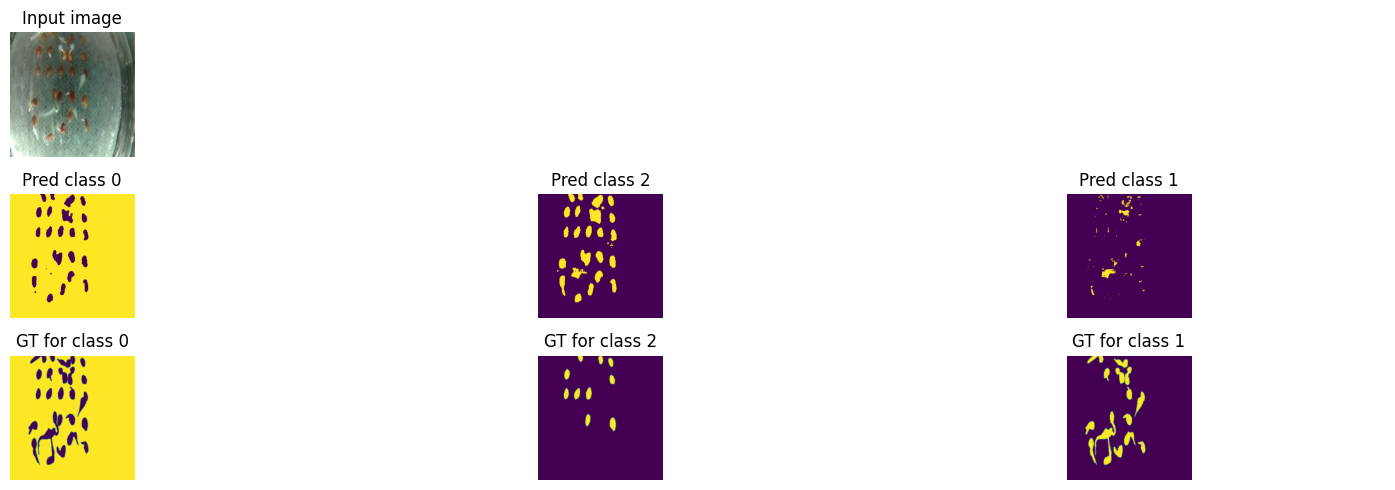

Train loss: 0.00413 | Time: 39m 7s | Val loss: 0.00324
Train_DICE_avg: 0.64718 | Train_Jaccard_avg: 0.59383 | Train_Sensitivity_avg: 0.93873 | Train_Specificity_avg: 0.90082 
Class 0 - Train_DICE: 0.98807 | Train_Jaccard: 0.97648 | Train_Sensitivity: 0.99247 | Train_Specificity: 0.73236 
Class 1 - Train_DICE: 0.28494 | Train_Jaccard: 0.28494 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98590 
Class 2 - Train_DICE: 0.66854 | Train_Jaccard: 0.52008 | Train_Sensitivity: 0.82372 | Train_Specificity: 0.98422 
Val_DICE_avg: 0.69042 | Val_Jaccard_avg: 0.63552 | Val_Sensitivity_avg: 0.94600 | Val_Specificity_avg: 0.85186 
Class 0 - Val_DICE: 0.99095 | Val_Jaccard: 0.98212 | Val_Sensitivity: 0.99854 | Val_Specificity: 0.58714 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61206 | Val_Jaccard: 0.45620 | Val_Sensitivity: 0.83945 | Val_Specificity: 0.98010 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00409 | Time: 40m 4s | Val loss: 0.00321
Train_DICE_avg: 0.64571 | Train_Jaccard_avg: 0.59250 | Train_Sensitivity_avg: 0.93875 | Train_Specificity_avg: 0.89999 
Class 0 - Train_DICE: 0.98824 | Train_Jaccard: 0.97682 | Train_Sensitivity: 0.99288 | Train_Specificity: 0.73032 
Class 1 - Train_DICE: 0.28132 | Train_Jaccard: 0.28132 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.66757 | Train_Jaccard: 0.51936 | Train_Sensitivity: 0.82335 | Train_Specificity: 0.98395 
Val_DICE_avg: 0.69074 | Val_Jaccard_avg: 0.63582 | Val_Sensitivity_avg: 0.94632 | Val_Specificity_avg: 0.85284 
Class 0 - Val_DICE: 0.99111 | Val_Jaccard: 0.98243 | Val_Sensitivity: 0.99852 | Val_Specificity: 0.59011 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61286 | Val_Jaccard: 0.45678 | Val_Sensitivity: 0.84043 | Val_Specificity: 0.98007 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00406 | Time: 41m 2s | Val loss: 0.00315
Train_DICE_avg: 0.64604 | Train_Jaccard_avg: 0.59278 | Train_Sensitivity_avg: 0.93915 | Train_Specificity_avg: 0.89927 
Class 0 - Train_DICE: 0.98835 | Train_Jaccard: 0.97703 | Train_Sensitivity: 0.99305 | Train_Specificity: 0.72821 
Class 1 - Train_DICE: 0.28068 | Train_Jaccard: 0.28068 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98562 
Class 2 - Train_DICE: 0.66909 | Train_Jaccard: 0.52064 | Train_Sensitivity: 0.82440 | Train_Specificity: 0.98399 
Val_DICE_avg: 0.69100 | Val_Jaccard_avg: 0.63626 | Val_Sensitivity_avg: 0.94648 | Val_Specificity_avg: 0.85357 
Class 0 - Val_DICE: 0.99114 | Val_Jaccard: 0.98248 | Val_Sensitivity: 0.99851 | Val_Specificity: 0.59217 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61359 | Val_Jaccard: 0.45804 | Val_Sensitivity: 0.84094 | Val_Specificity: 0.98021 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.00406 | Time: 41m 59s | Val loss: 0.00311
Train_DICE_avg: 0.64715 | Train_Jaccard_avg: 0.59414 | Train_Sensitivity_avg: 0.93914 | Train_Specificity_avg: 0.90023 
Class 0 - Train_DICE: 0.98830 | Train_Jaccard: 0.97693 | Train_Sensitivity: 0.99272 | Train_Specificity: 0.73063 
Class 1 - Train_DICE: 0.28253 | Train_Jaccard: 0.28253 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.67061 | Train_Jaccard: 0.52296 | Train_Sensitivity: 0.82469 | Train_Specificity: 0.98428 
Val_DICE_avg: 0.68884 | Val_Jaccard_avg: 0.63427 | Val_Sensitivity_avg: 0.94657 | Val_Specificity_avg: 0.85546 
Class 0 - Val_DICE: 0.99129 | Val_Jaccard: 0.98278 | Val_Sensitivity: 0.99852 | Val_Specificity: 0.59807 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60699 | Val_Jaccard: 0.45176 | Val_Sensitivity: 0.84119 | Val_Specificity: 0.97998 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.00398 | Time: 42m 57s | Val loss: 0.00309
Train_DICE_avg: 0.64336 | Train_Jaccard_avg: 0.59056 | Train_Sensitivity_avg: 0.93930 | Train_Specificity_avg: 0.90004 
Class 0 - Train_DICE: 0.98870 | Train_Jaccard: 0.97771 | Train_Sensitivity: 0.99324 | Train_Specificity: 0.73049 
Class 1 - Train_DICE: 0.27142 | Train_Jaccard: 0.27142 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98542 
Class 2 - Train_DICE: 0.66996 | Train_Jaccard: 0.52255 | Train_Sensitivity: 0.82466 | Train_Specificity: 0.98421 
Val_DICE_avg: 0.68912 | Val_Jaccard_avg: 0.63464 | Val_Sensitivity_avg: 0.94619 | Val_Specificity_avg: 0.85460 
Class 0 - Val_DICE: 0.99112 | Val_Jaccard: 0.98244 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.59535 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60799 | Val_Jaccard: 0.45324 | Val_Sensitivity: 0.83995 | Val_Specificity: 0.98010 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


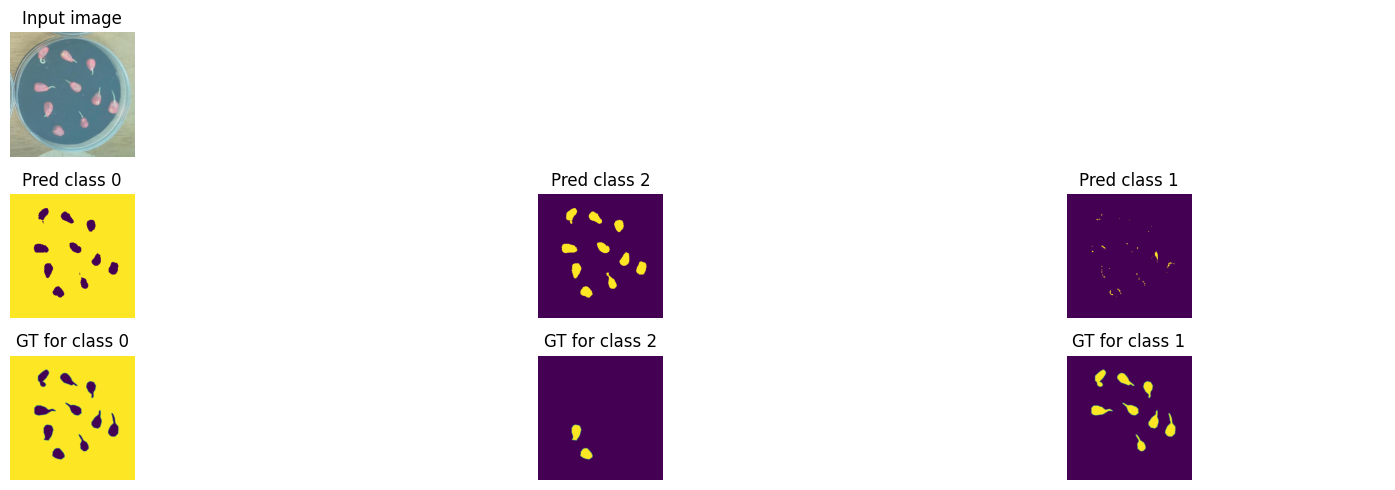

Train loss: 0.00400 | Time: 43m 55s | Val loss: 0.00308
Train_DICE_avg: 0.64718 | Train_Jaccard_avg: 0.59429 | Train_Sensitivity_avg: 0.93912 | Train_Specificity_avg: 0.90138 
Class 0 - Train_DICE: 0.98857 | Train_Jaccard: 0.97747 | Train_Sensitivity: 0.99316 | Train_Specificity: 0.73398 
Class 1 - Train_DICE: 0.28188 | Train_Jaccard: 0.28188 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98584 
Class 2 - Train_DICE: 0.67109 | Train_Jaccard: 0.52352 | Train_Sensitivity: 0.82419 | Train_Specificity: 0.98431 
Val_DICE_avg: 0.69070 | Val_Jaccard_avg: 0.63624 | Val_Sensitivity_avg: 0.94621 | Val_Specificity_avg: 0.85375 
Class 0 - Val_DICE: 0.99105 | Val_Jaccard: 0.98230 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.59258 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61280 | Val_Jaccard: 0.45816 | Val_Sensitivity: 0.84000 | Val_Specificity: 0.98034 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.00398 | Time: 44m 53s | Val loss: 0.00308
Train_DICE_avg: 0.64831 | Train_Jaccard_avg: 0.59531 | Train_Sensitivity_avg: 0.93956 | Train_Specificity_avg: 0.90177 
Class 0 - Train_DICE: 0.98865 | Train_Jaccard: 0.97761 | Train_Sensitivity: 0.99311 | Train_Specificity: 0.73524 
Class 1 - Train_DICE: 0.28293 | Train_Jaccard: 0.28293 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98582 
Class 2 - Train_DICE: 0.67336 | Train_Jaccard: 0.52538 | Train_Sensitivity: 0.82556 | Train_Specificity: 0.98425 
Val_DICE_avg: 0.69061 | Val_Jaccard_avg: 0.63618 | Val_Sensitivity_avg: 0.94662 | Val_Specificity_avg: 0.85439 
Class 0 - Val_DICE: 0.99115 | Val_Jaccard: 0.98251 | Val_Sensitivity: 0.99856 | Val_Specificity: 0.59452 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61241 | Val_Jaccard: 0.45777 | Val_Sensitivity: 0.84130 | Val_Specificity: 0.98031 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00394 | Time: 45m 50s | Val loss: 0.00306
Train_DICE_avg: 0.64624 | Train_Jaccard_avg: 0.59345 | Train_Sensitivity_avg: 0.93962 | Train_Specificity_avg: 0.90095 
Class 0 - Train_DICE: 0.98872 | Train_Jaccard: 0.97775 | Train_Sensitivity: 0.99329 | Train_Specificity: 0.73292 
Class 1 - Train_DICE: 0.27689 | Train_Jaccard: 0.27689 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98559 
Class 2 - Train_DICE: 0.67310 | Train_Jaccard: 0.52572 | Train_Sensitivity: 0.82557 | Train_Specificity: 0.98434 
Val_DICE_avg: 0.69051 | Val_Jaccard_avg: 0.63593 | Val_Sensitivity_avg: 0.94641 | Val_Specificity_avg: 0.85439 
Class 0 - Val_DICE: 0.99114 | Val_Jaccard: 0.98249 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.59459 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61215 | Val_Jaccard: 0.45706 | Val_Sensitivity: 0.84059 | Val_Specificity: 0.98025 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00394 | Time: 46m 48s | Val loss: 0.00305
Train_DICE_avg: 0.64732 | Train_Jaccard_avg: 0.59461 | Train_Sensitivity_avg: 0.93944 | Train_Specificity_avg: 0.90178 
Class 0 - Train_DICE: 0.98881 | Train_Jaccard: 0.97793 | Train_Sensitivity: 0.99340 | Train_Specificity: 0.73511 
Class 1 - Train_DICE: 0.27907 | Train_Jaccard: 0.27907 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.67406 | Train_Jaccard: 0.52684 | Train_Sensitivity: 0.82492 | Train_Specificity: 0.98450 
Val_DICE_avg: 0.69081 | Val_Jaccard_avg: 0.63635 | Val_Sensitivity_avg: 0.94679 | Val_Specificity_avg: 0.85482 
Class 0 - Val_DICE: 0.99122 | Val_Jaccard: 0.98265 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.59585 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61295 | Val_Jaccard: 0.45816 | Val_Sensitivity: 0.84178 | Val_Specificity: 0.98028 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00394 | Time: 47m 45s | Val loss: 0.00305
Train_DICE_avg: 0.64676 | Train_Jaccard_avg: 0.59379 | Train_Sensitivity_avg: 0.93949 | Train_Specificity_avg: 0.90201 
Class 0 - Train_DICE: 0.98876 | Train_Jaccard: 0.97783 | Train_Sensitivity: 0.99331 | Train_Specificity: 0.73630 
Class 1 - Train_DICE: 0.27866 | Train_Jaccard: 0.27866 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98559 
Class 2 - Train_DICE: 0.67286 | Train_Jaccard: 0.52488 | Train_Sensitivity: 0.82515 | Train_Specificity: 0.98413 
Val_DICE_avg: 0.69060 | Val_Jaccard_avg: 0.63624 | Val_Sensitivity_avg: 0.94658 | Val_Specificity_avg: 0.85524 
Class 0 - Val_DICE: 0.99120 | Val_Jaccard: 0.98261 | Val_Sensitivity: 0.99862 | Val_Specificity: 0.59707 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61233 | Val_Jaccard: 0.45784 | Val_Sensitivity: 0.84111 | Val_Specificity: 0.98032 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


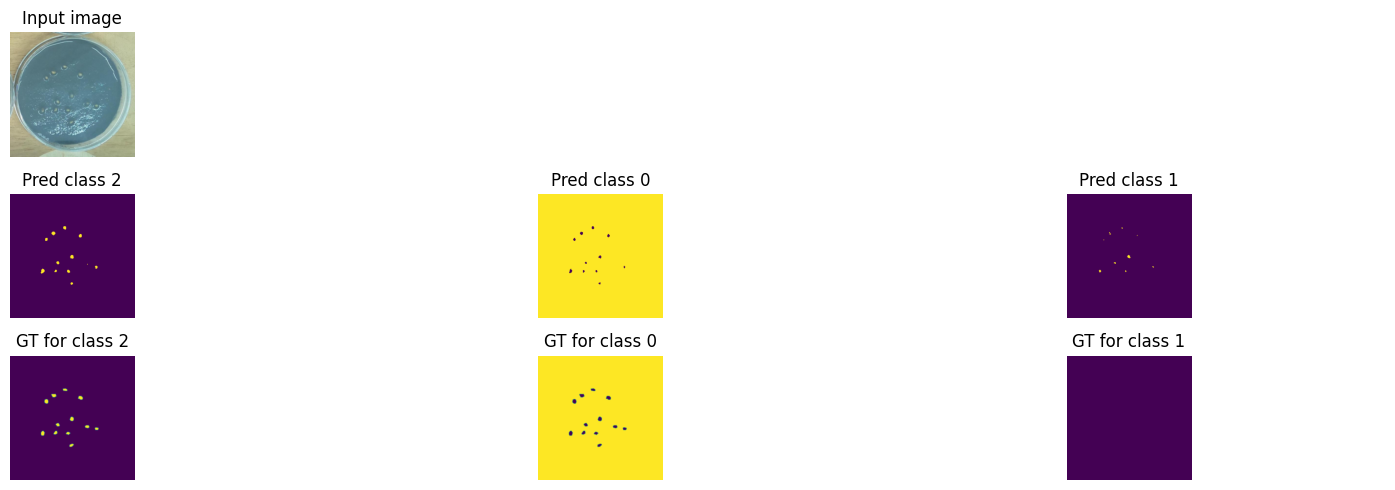

Train loss: 0.00393 | Time: 48m 44s | Val loss: 0.00304
Train_DICE_avg: 0.64953 | Train_Jaccard_avg: 0.59697 | Train_Sensitivity_avg: 0.93938 | Train_Specificity_avg: 0.90480 
Class 0 - Train_DICE: 0.98888 | Train_Jaccard: 0.97806 | Train_Sensitivity: 0.99315 | Train_Specificity: 0.74373 
Class 1 - Train_DICE: 0.28333 | Train_Jaccard: 0.28333 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98602 
Class 2 - Train_DICE: 0.67638 | Train_Jaccard: 0.52952 | Train_Sensitivity: 0.82498 | Train_Specificity: 0.98466 
Val_DICE_avg: 0.68903 | Val_Jaccard_avg: 0.63457 | Val_Sensitivity_avg: 0.94682 | Val_Specificity_avg: 0.85717 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98311 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.60321 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60739 | Val_Jaccard: 0.45234 | Val_Sensitivity: 0.84187 | Val_Specificity: 0.97997 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.00393 | Time: 49m 42s | Val loss: 0.00305
Train_DICE_avg: 0.65131 | Train_Jaccard_avg: 0.59893 | Train_Sensitivity_avg: 0.93959 | Train_Specificity_avg: 0.90290 
Class 0 - Train_DICE: 0.98891 | Train_Jaccard: 0.97813 | Train_Sensitivity: 0.99347 | Train_Specificity: 0.73796 
Class 1 - Train_DICE: 0.29002 | Train_Jaccard: 0.29002 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98605 
Class 2 - Train_DICE: 0.67499 | Train_Jaccard: 0.52864 | Train_Sensitivity: 0.82532 | Train_Specificity: 0.98468 
Val_DICE_avg: 0.68995 | Val_Jaccard_avg: 0.63544 | Val_Sensitivity_avg: 0.94697 | Val_Specificity_avg: 0.85653 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98310 | Val_Sensitivity: 0.99856 | Val_Specificity: 0.60117 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61014 | Val_Jaccard: 0.45498 | Val_Sensitivity: 0.84236 | Val_Specificity: 0.98008 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.00392 | Time: 50m 39s | Val loss: 0.00305
Train_DICE_avg: 0.64742 | Train_Jaccard_avg: 0.59491 | Train_Sensitivity_avg: 0.93990 | Train_Specificity_avg: 0.90321 
Class 0 - Train_DICE: 0.98884 | Train_Jaccard: 0.97798 | Train_Sensitivity: 0.99330 | Train_Specificity: 0.73899 
Class 1 - Train_DICE: 0.27874 | Train_Jaccard: 0.27874 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98598 
Class 2 - Train_DICE: 0.67468 | Train_Jaccard: 0.52799 | Train_Sensitivity: 0.82639 | Train_Specificity: 0.98464 
Val_DICE_avg: 0.69062 | Val_Jaccard_avg: 0.63612 | Val_Sensitivity_avg: 0.94720 | Val_Specificity_avg: 0.85678 
Class 0 - Val_DICE: 0.99146 | Val_Jaccard: 0.98311 | Val_Sensitivity: 0.99856 | Val_Specificity: 0.60185 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61216 | Val_Jaccard: 0.45701 | Val_Sensitivity: 0.84303 | Val_Specificity: 0.98016 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.00389 | Time: 51m 37s | Val loss: 0.00306
Train_DICE_avg: 0.64868 | Train_Jaccard_avg: 0.59613 | Train_Sensitivity_avg: 0.93985 | Train_Specificity_avg: 0.90345 
Class 0 - Train_DICE: 0.98891 | Train_Jaccard: 0.97813 | Train_Sensitivity: 0.99334 | Train_Specificity: 0.74013 
Class 1 - Train_DICE: 0.28108 | Train_Jaccard: 0.28108 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98572 
Class 2 - Train_DICE: 0.67606 | Train_Jaccard: 0.52918 | Train_Sensitivity: 0.82621 | Train_Specificity: 0.98452 
Val_DICE_avg: 0.69012 | Val_Jaccard_avg: 0.63571 | Val_Sensitivity_avg: 0.94717 | Val_Specificity_avg: 0.85730 
Class 0 - Val_DICE: 0.99150 | Val_Jaccard: 0.98320 | Val_Sensitivity: 0.99855 | Val_Specificity: 0.60343 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61060 | Val_Jaccard: 0.45568 | Val_Sensitivity: 0.84295 | Val_Specificity: 0.98013 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.00386 | Time: 52m 35s | Val loss: 0.00302
Train_DICE_avg: 0.64708 | Train_Jaccard_avg: 0.59446 | Train_Sensitivity_avg: 0.94003 | Train_Specificity_avg: 0.90280 
Class 0 - Train_DICE: 0.98902 | Train_Jaccard: 0.97832 | Train_Sensitivity: 0.99348 | Train_Specificity: 0.73841 
Class 1 - Train_DICE: 0.27673 | Train_Jaccard: 0.27673 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.67550 | Train_Jaccard: 0.52833 | Train_Sensitivity: 0.82662 | Train_Specificity: 0.98440 
Val_DICE_avg: 0.69014 | Val_Jaccard_avg: 0.63581 | Val_Sensitivity_avg: 0.94700 | Val_Specificity_avg: 0.85644 
Class 0 - Val_DICE: 0.99138 | Val_Jaccard: 0.98295 | Val_Sensitivity: 0.99859 | Val_Specificity: 0.60079 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61079 | Val_Jaccard: 0.45622 | Val_Sensitivity: 0.84242 | Val_Specificity: 0.98020 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


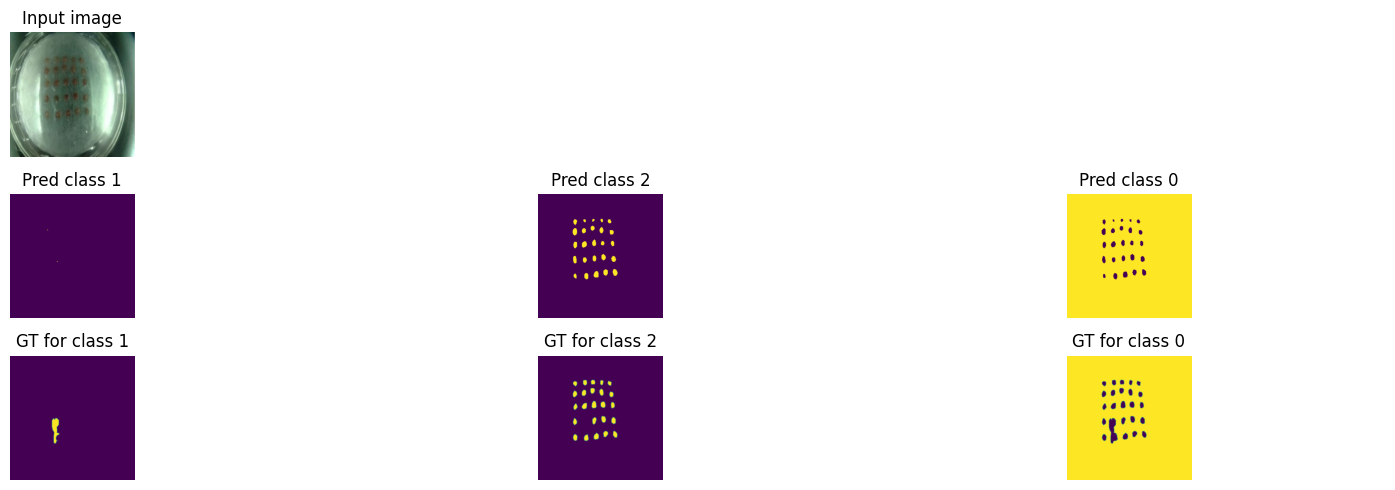

Train loss: 0.00385 | Time: 53m 33s | Val loss: 0.00303
Train_DICE_avg: 0.65092 | Train_Jaccard_avg: 0.59837 | Train_Sensitivity_avg: 0.94033 | Train_Specificity_avg: 0.90248 
Class 0 - Train_DICE: 0.98906 | Train_Jaccard: 0.97842 | Train_Sensitivity: 0.99378 | Train_Specificity: 0.73731 
Class 1 - Train_DICE: 0.28776 | Train_Jaccard: 0.28776 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.67593 | Train_Jaccard: 0.52894 | Train_Sensitivity: 0.82720 | Train_Specificity: 0.98455 
Val_DICE_avg: 0.69006 | Val_Jaccard_avg: 0.63563 | Val_Sensitivity_avg: 0.94722 | Val_Specificity_avg: 0.85695 
Class 0 - Val_DICE: 0.99147 | Val_Jaccard: 0.98314 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.60239 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61044 | Val_Jaccard: 0.45550 | Val_Sensitivity: 0.84307 | Val_Specificity: 0.98012 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.00386 | Time: 54m 31s | Val loss: 0.00303
Train_DICE_avg: 0.64865 | Train_Jaccard_avg: 0.59603 | Train_Sensitivity_avg: 0.94007 | Train_Specificity_avg: 0.90466 
Class 0 - Train_DICE: 0.98904 | Train_Jaccard: 0.97837 | Train_Sensitivity: 0.99334 | Train_Specificity: 0.74349 
Class 1 - Train_DICE: 0.28052 | Train_Jaccard: 0.28052 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98594 
Class 2 - Train_DICE: 0.67639 | Train_Jaccard: 0.52920 | Train_Sensitivity: 0.82688 | Train_Specificity: 0.98455 
Val_DICE_avg: 0.69181 | Val_Jaccard_avg: 0.63738 | Val_Sensitivity_avg: 0.94735 | Val_Specificity_avg: 0.85590 
Class 0 - Val_DICE: 0.99138 | Val_Jaccard: 0.98295 | Val_Sensitivity: 0.99859 | Val_Specificity: 0.59899 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61578 | Val_Jaccard: 0.46093 | Val_Sensitivity: 0.84345 | Val_Specificity: 0.98036 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00384 | Time: 55m 28s | Val loss: 0.00305
Train_DICE_avg: 0.64671 | Train_Jaccard_avg: 0.59416 | Train_Sensitivity_avg: 0.94037 | Train_Specificity_avg: 0.90211 
Class 0 - Train_DICE: 0.98907 | Train_Jaccard: 0.97843 | Train_Sensitivity: 0.99371 | Train_Specificity: 0.73625 
Class 1 - Train_DICE: 0.27625 | Train_Jaccard: 0.27625 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.67480 | Train_Jaccard: 0.52779 | Train_Sensitivity: 0.82739 | Train_Specificity: 0.98442 
Val_DICE_avg: 0.69119 | Val_Jaccard_avg: 0.63679 | Val_Sensitivity_avg: 0.94733 | Val_Specificity_avg: 0.85656 
Class 0 - Val_DICE: 0.99144 | Val_Jaccard: 0.98308 | Val_Sensitivity: 0.99859 | Val_Specificity: 0.60107 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61387 | Val_Jaccard: 0.45903 | Val_Sensitivity: 0.84338 | Val_Specificity: 0.98028 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.00387 | Time: 56m 26s | Val loss: 0.00303
Train_DICE_avg: 0.65120 | Train_Jaccard_avg: 0.59889 | Train_Sensitivity_avg: 0.93998 | Train_Specificity_avg: 0.90525 
Class 0 - Train_DICE: 0.98910 | Train_Jaccard: 0.97848 | Train_Sensitivity: 0.99338 | Train_Specificity: 0.74534 
Class 1 - Train_DICE: 0.28816 | Train_Jaccard: 0.28816 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98570 
Class 2 - Train_DICE: 0.67633 | Train_Jaccard: 0.53001 | Train_Sensitivity: 0.82655 | Train_Specificity: 0.98471 
Val_DICE_avg: 0.69031 | Val_Jaccard_avg: 0.63581 | Val_Sensitivity_avg: 0.94731 | Val_Specificity_avg: 0.85772 
Class 0 - Val_DICE: 0.99159 | Val_Jaccard: 0.98337 | Val_Sensitivity: 0.99859 | Val_Specificity: 0.60475 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61109 | Val_Jaccard: 0.45580 | Val_Sensitivity: 0.84333 | Val_Specificity: 0.98007 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.00384 | Time: 57m 23s | Val loss: 0.00303
Train_DICE_avg: 0.64881 | Train_Jaccard_avg: 0.59633 | Train_Sensitivity_avg: 0.94007 | Train_Specificity_avg: 0.90350 
Class 0 - Train_DICE: 0.98908 | Train_Jaccard: 0.97845 | Train_Sensitivity: 0.99355 | Train_Specificity: 0.73998 
Class 1 - Train_DICE: 0.27931 | Train_Jaccard: 0.27931 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98580 
Class 2 - Train_DICE: 0.67806 | Train_Jaccard: 0.53124 | Train_Sensitivity: 0.82666 | Train_Specificity: 0.98471 
Val_DICE_avg: 0.69063 | Val_Jaccard_avg: 0.63635 | Val_Sensitivity_avg: 0.94741 | Val_Specificity_avg: 0.85765 
Class 0 - Val_DICE: 0.99153 | Val_Jaccard: 0.98325 | Val_Sensitivity: 0.99857 | Val_Specificity: 0.60438 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61211 | Val_Jaccard: 0.45754 | Val_Sensitivity: 0.84366 | Val_Specificity: 0.98022 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


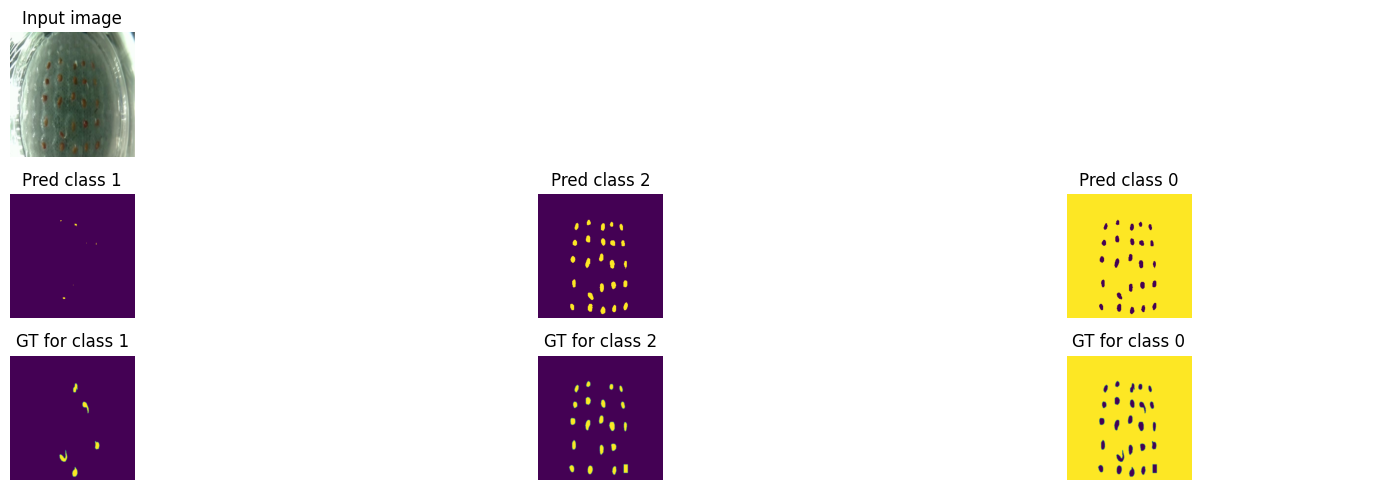

Train loss: 0.00382 | Time: 58m 22s | Val loss: 0.00303
Train_DICE_avg: 0.65053 | Train_Jaccard_avg: 0.59825 | Train_Sensitivity_avg: 0.94027 | Train_Specificity_avg: 0.90471 
Class 0 - Train_DICE: 0.98916 | Train_Jaccard: 0.97860 | Train_Sensitivity: 0.99352 | Train_Specificity: 0.74376 
Class 1 - Train_DICE: 0.28438 | Train_Jaccard: 0.28438 | Train_Sensitivity: 1.00000 | Train_Specificity: 0.98566 
Class 2 - Train_DICE: 0.67804 | Train_Jaccard: 0.53177 | Train_Sensitivity: 0.82730 | Train_Specificity: 0.98473 
Val_DICE_avg: 0.69123 | Val_Jaccard_avg: 0.63690 | Val_Sensitivity_avg: 0.94751 | Val_Specificity_avg: 0.85713 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98317 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.60276 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61395 | Val_Jaccard: 0.45926 | Val_Sensitivity: 0.84396 | Val_Specificity: 0.98029 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Global Performance Metrics:
Loss mean: 0.00302, std: 0.00023
Dice Coefficient mean: 0.66740, std: 0.12688
Jaccard Index mean: 0.61319, std: 0.13781
Sensitivity mean: 0.76844, std: 0.14392
Specificity mean: 0.90728, std: 0.06187

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99407, std: 0.00359
Jaccard mean: 0.98824, std: 0.00701
Sensitivity mean: 0.99766, std: 0.00155
Specificity mean: 0.73395, std: 0.18336

Class 1:
Dice mean: 0.25469, std: 0.33354
Jaccard mean: 0.21307, std: 0.33316
Sensitivity mean: 0.44953, std: 0.43571
Specificity mean: 0.99860, std: 0.00222

Class 2:
Dice mean: 0.75345, std: 0.19722
Jaccard mean: 0.63827, std: 0.21522
Sensitivity mean: 0.85813, std: 0.08203
Specificity mean: 0.98929, std: 0.01275


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","SeedGermination-FCN-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 4.34 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


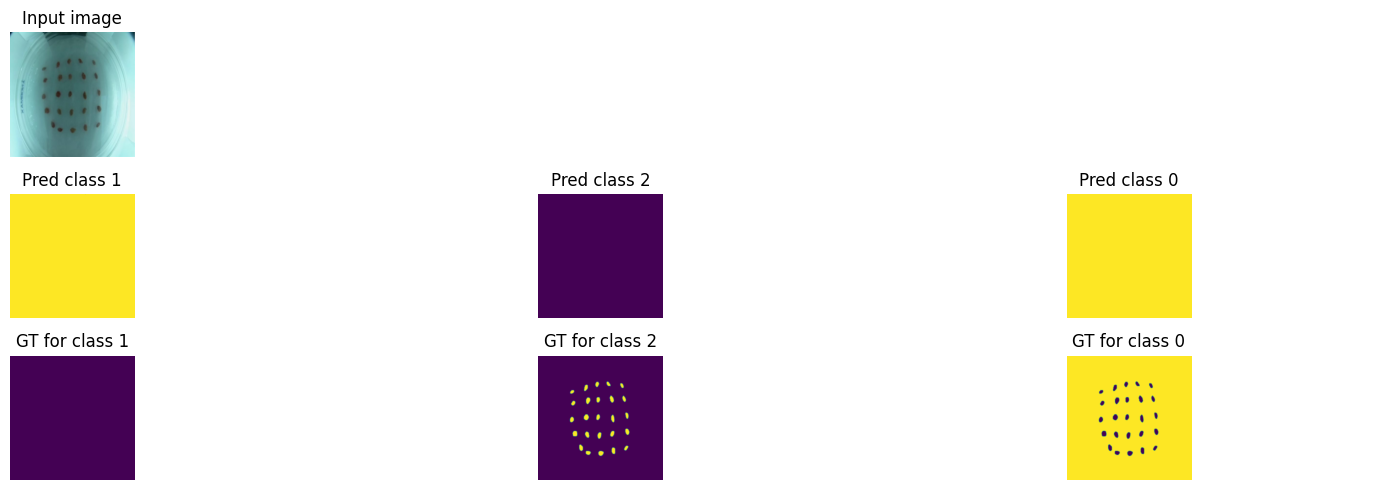

Train loss: 0.69500 | Time: 0m 57s | Val loss: 0.68353
Train_DICE_avg: 0.32692 | Train_Jaccard_avg: 0.31277 | Train_Sensitivity_avg: 0.40458 | Train_Specificity_avg: 0.98577 
Class 0 - Train_DICE: 0.96276 | Train_Jaccard: 0.92910 | Train_Sensitivity: 0.92910 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01650 | Train_Jaccard: 0.00845 | Train_Sensitivity: 0.00853 | Train_Specificity: 0.99242 
Class 2 - Train_DICE: 0.00149 | Train_Jaccard: 0.00075 | Train_Sensitivity: 0.27610 | Train_Specificity: 0.96490 
Val_DICE_avg: 0.33210 | Val_Jaccard_avg: 0.32265 | Val_Sensitivity_avg: 0.63717 | Val_Specificity_avg: 0.98280 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01700 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 0.98265 
Class 2 - Val_DICE: 0.00043 | Val_Jaccard: 0.00021 | Val_Sensitivity: 0.94380 | Val_Specificity: 0.96576 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.66560 | Time: 1m 53s | Val loss: 0.61953
Train_DICE_avg: 0.43141 | Train_Jaccard_avg: 0.38253 | Train_Sensitivity_avg: 0.44385 | Train_Specificity_avg: 0.99411 
Class 0 - Train_DICE: 0.96277 | Train_Jaccard: 0.92909 | Train_Sensitivity: 0.92909 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01586 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 0.99919 
Class 2 - Train_DICE: 0.31561 | Train_Jaccard: 0.21040 | Train_Sensitivity: 0.39435 | Train_Specificity: 0.98315 
Val_DICE_avg: 0.51511 | Val_Jaccard_avg: 0.45850 | Val_Sensitivity_avg: 0.46662 | Val_Specificity_avg: 0.99898 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.54943 | Val_Jaccard: 0.40776 | Val_Sensitivity: 0.43214 | Val_Specificity: 0.99694 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.61037 | Time: 2m 50s | Val loss: 0.56381
Train_DICE_avg: 0.51222 | Train_Jaccard_avg: 0.44976 | Train_Sensitivity_avg: 0.45867 | Train_Specificity_avg: 0.99895 
Class 0 - Train_DICE: 0.96186 | Train_Jaccard: 0.92739 | Train_Sensitivity: 0.92739 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01585 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.55896 | Train_Jaccard: 0.41378 | Train_Sensitivity: 0.44051 | Train_Specificity: 0.99684 
Val_DICE_avg: 0.54988 | Val_Jaccard_avg: 0.49499 | Val_Sensitivity_avg: 0.50520 | Val_Specificity_avg: 0.99913 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.65373 | Val_Jaccard: 0.51725 | Val_Sensitivity: 0.54786 | Val_Specificity: 0.99740 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.54162 | Time: 3m 47s | Val loss: 0.50625
Train_DICE_avg: 0.55798 | Train_Jaccard_avg: 0.49775 | Train_Sensitivity_avg: 0.52768 | Train_Specificity_avg: 0.99796 
Class 0 - Train_DICE: 0.96194 | Train_Jaccard: 0.92759 | Train_Sensitivity: 0.92759 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01586 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.69614 | Train_Jaccard: 0.55756 | Train_Sensitivity: 0.64735 | Train_Specificity: 0.99389 
Val_DICE_avg: 0.57797 | Val_Jaccard_avg: 0.52588 | Val_Sensitivity_avg: 0.55067 | Val_Specificity_avg: 0.99846 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.73801 | Val_Jaccard: 0.60990 | Val_Sensitivity: 0.68427 | Val_Specificity: 0.99539 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.49450 | Time: 4m 44s | Val loss: 0.47287
Train_DICE_avg: 0.56979 | Train_Jaccard_avg: 0.51049 | Train_Sensitivity_avg: 0.55638 | Train_Specificity_avg: 0.99733 
Class 0 - Train_DICE: 0.96201 | Train_Jaccard: 0.92768 | Train_Sensitivity: 0.92768 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01585 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.73150 | Train_Jaccard: 0.59568 | Train_Sensitivity: 0.73336 | Train_Specificity: 0.99200 
Val_DICE_avg: 0.58755 | Val_Jaccard_avg: 0.53663 | Val_Sensitivity_avg: 0.56860 | Val_Specificity_avg: 0.99816 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.76676 | Val_Jaccard: 0.64217 | Val_Sensitivity: 0.73806 | Val_Specificity: 0.99449 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


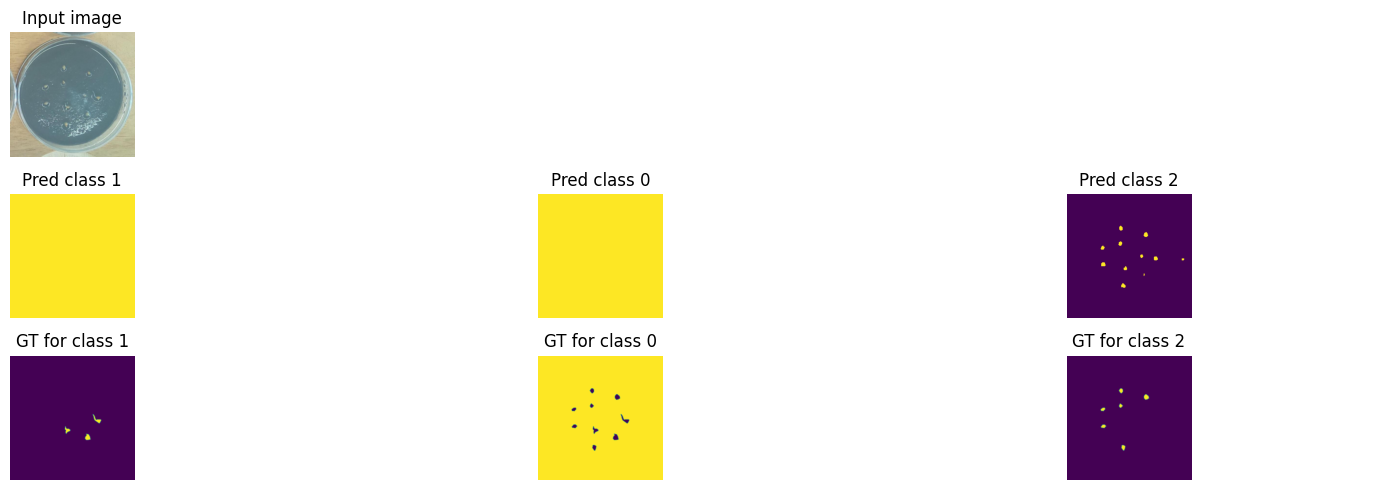

Train loss: 0.46922 | Time: 5m 41s | Val loss: 0.45257
Train_DICE_avg: 0.57426 | Train_Jaccard_avg: 0.51563 | Train_Sensitivity_avg: 0.56788 | Train_Specificity_avg: 0.99715 
Class 0 - Train_DICE: 0.96317 | Train_Jaccard: 0.92983 | Train_Sensitivity: 0.92983 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01585 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.74377 | Train_Jaccard: 0.60893 | Train_Sensitivity: 0.76569 | Train_Specificity: 0.99146 
Val_DICE_avg: 0.59115 | Val_Jaccard_avg: 0.54074 | Val_Sensitivity_avg: 0.57772 | Val_Specificity_avg: 0.99799 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.77754 | Val_Jaccard: 0.65449 | Val_Sensitivity: 0.76544 | Val_Specificity: 0.99398 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.45481 | Time: 6m 38s | Val loss: 0.43940
Train_DICE_avg: 0.57693 | Train_Jaccard_avg: 0.51865 | Train_Sensitivity_avg: 0.57270 | Train_Specificity_avg: 0.99716 
Class 0 - Train_DICE: 0.96240 | Train_Jaccard: 0.92840 | Train_Sensitivity: 0.92840 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01585 | Train_Jaccard: 0.00812 | Train_Sensitivity: 0.00812 | Train_Specificity: 1.00000 
Class 2 - Train_DICE: 0.75255 | Train_Jaccard: 0.61944 | Train_Sensitivity: 0.78160 | Train_Specificity: 0.99147 
Val_DICE_avg: 0.59337 | Val_Jaccard_avg: 0.54342 | Val_Sensitivity_avg: 0.58472 | Val_Specificity_avg: 0.99790 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.01702 | Val_Jaccard: 0.00880 | Val_Sensitivity: 0.00880 | Val_Specificity: 1.00000 
Class 2 - Val_DICE: 0.78422 | Val_Jaccard: 0.66252 | Val_Sensitivity: 0.78643 | Val_Specificity: 0.99371 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.44555 | Time: 7m 35s | Val loss: 0.43159
Train_DICE_avg: 0.57859 | Train_Jaccard_avg: 0.52082 | Train_Sensitivity_avg: 0.57607 | Train_Specificity_avg: 0.99670 
Class 0 - Train_DICE: 0.96241 | Train_Jaccard: 0.92843 | Train_Sensitivity: 0.92843 | Train_Specificity: 1.00000 
Class 1 - Train_DICE: 0.01595 | Train_Jaccard: 0.00817 | Train_Sensitivity: 0.00817 | Train_Specificity: 0.99854 
Class 2 - Train_DICE: 0.75739 | Train_Jaccard: 0.62585 | Train_Sensitivity: 0.79160 | Train_Specificity: 0.99156 
Val_DICE_avg: 0.59619 | Val_Jaccard_avg: 0.54631 | Val_Sensitivity_avg: 0.58778 | Val_Specificity_avg: 0.99650 
Class 0 - Val_DICE: 0.97888 | Val_Jaccard: 0.95893 | Val_Sensitivity: 0.95893 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.02012 | Val_Jaccard: 0.01045 | Val_Sensitivity: 0.01049 | Val_Specificity: 0.99572 
Class 2 - Val_DICE: 0.78957 | Val_Jaccard: 0.66955 | Val_Sensitivity: 0.79393 | Val_Specificity: 0.99380 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.43893 | Time: 8m 32s | Val loss: 0.42606
Train_DICE_avg: 0.58963 | Train_Jaccard_avg: 0.52862 | Train_Sensitivity_avg: 0.58397 | Train_Specificity_avg: 0.99625 
Class 0 - Train_DICE: 0.96377 | Train_Jaccard: 0.93092 | Train_Sensitivity: 0.93093 | Train_Specificity: 0.99970 
Class 1 - Train_DICE: 0.04243 | Train_Jaccard: 0.02274 | Train_Sensitivity: 0.02336 | Train_Specificity: 0.99732 
Class 2 - Train_DICE: 0.76268 | Train_Jaccard: 0.63218 | Train_Sensitivity: 0.79764 | Train_Specificity: 0.99174 
Val_DICE_avg: 0.61988 | Val_Jaccard_avg: 0.56386 | Val_Sensitivity_avg: 0.60501 | Val_Specificity_avg: 0.99648 
Class 0 - Val_DICE: 0.98460 | Val_Jaccard: 0.96980 | Val_Sensitivity: 0.96981 | Val_Specificity: 0.99828 
Class 1 - Val_DICE: 0.08129 | Val_Jaccard: 0.04665 | Val_Sensitivity: 0.04929 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.79377 | Val_Jaccard: 0.67513 | Val_Sensitivity: 0.79593 | Val_Specificity: 0.99398 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.43395 | Time: 9m 29s | Val loss: 0.42079
Train_DICE_avg: 0.61281 | Train_Jaccard_avg: 0.54517 | Train_Sensitivity_avg: 0.60218 | Train_Specificity_avg: 0.99547 
Class 0 - Train_DICE: 0.96806 | Train_Jaccard: 0.93891 | Train_Sensitivity: 0.93893 | Train_Specificity: 0.99734 
Class 1 - Train_DICE: 0.10437 | Train_Jaccard: 0.06029 | Train_Sensitivity: 0.06764 | Train_Specificity: 0.99719 
Class 2 - Train_DICE: 0.76601 | Train_Jaccard: 0.63631 | Train_Sensitivity: 0.79997 | Train_Specificity: 0.99187 
Val_DICE_avg: 0.63856 | Val_Jaccard_avg: 0.57856 | Val_Sensitivity_avg: 0.62539 | Val_Specificity_avg: 0.99412 
Class 0 - Val_DICE: 0.98854 | Val_Jaccard: 0.97745 | Val_Sensitivity: 0.97750 | Val_Specificity: 0.99172 
Class 1 - Val_DICE: 0.13119 | Val_Jaccard: 0.08032 | Val_Sensitivity: 0.09540 | Val_Specificity: 0.99668 
Class 2 - Val_DICE: 0.79595 | Val_Jaccard: 0.67793 | Val_Sensitivity: 0.80328 | Val_Specificity: 0.99396 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


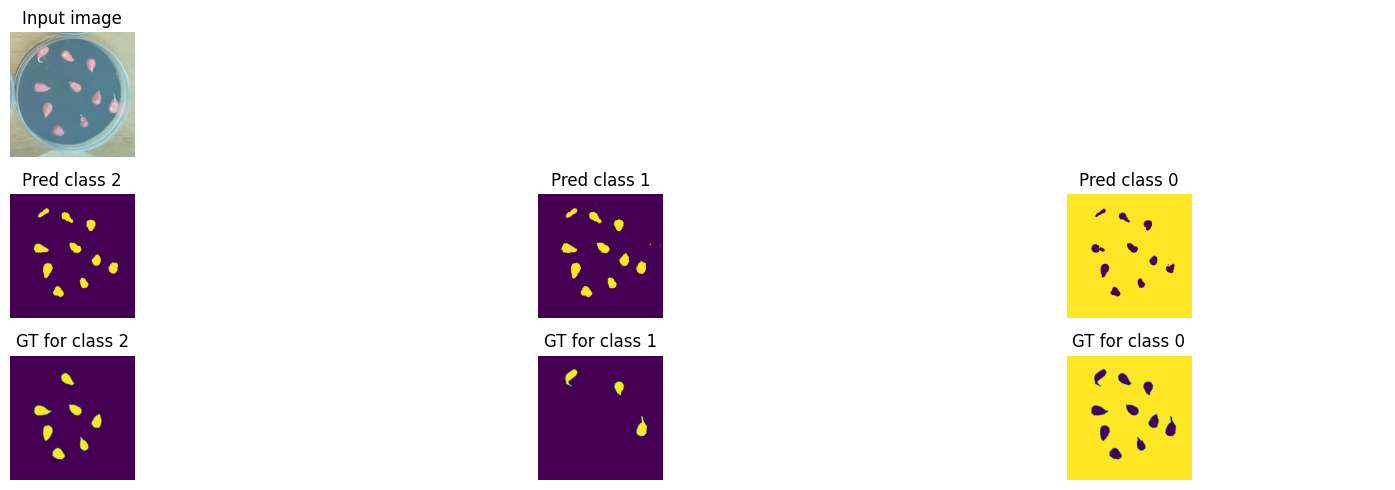

Train loss: 0.42783 | Time: 10m 27s | Val loss: 0.41405
Train_DICE_avg: 0.62762 | Train_Jaccard_avg: 0.55723 | Train_Sensitivity_avg: 0.62016 | Train_Specificity_avg: 0.99333 
Class 0 - Train_DICE: 0.97233 | Train_Jaccard: 0.94690 | Train_Sensitivity: 0.94700 | Train_Specificity: 0.99150 
Class 1 - Train_DICE: 0.14152 | Train_Jaccard: 0.08478 | Train_Sensitivity: 0.10861 | Train_Specificity: 0.99655 
Class 2 - Train_DICE: 0.76900 | Train_Jaccard: 0.64000 | Train_Sensitivity: 0.80487 | Train_Specificity: 0.99195 
Val_DICE_avg: 0.64315 | Val_Jaccard_avg: 0.58279 | Val_Sensitivity_avg: 0.63698 | Val_Specificity_avg: 0.98908 
Class 0 - Val_DICE: 0.99112 | Val_Jaccard: 0.98247 | Val_Sensitivity: 0.98273 | Val_Specificity: 0.97756 
Class 1 - Val_DICE: 0.14162 | Val_Jaccard: 0.08734 | Val_Sensitivity: 0.11667 | Val_Specificity: 0.99594 
Class 2 - Val_DICE: 0.79673 | Val_Jaccard: 0.67857 | Val_Sensitivity: 0.81154 | Val_Specificity: 0.99374 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.42257 | Time: 11m 24s | Val loss: 0.40894
Train_DICE_avg: 0.63022 | Train_Jaccard_avg: 0.56032 | Train_Sensitivity_avg: 0.62491 | Train_Specificity_avg: 0.99043 
Class 0 - Train_DICE: 0.97379 | Train_Jaccard: 0.94966 | Train_Sensitivity: 0.94992 | Train_Specificity: 0.98317 
Class 1 - Train_DICE: 0.14431 | Train_Jaccard: 0.08657 | Train_Sensitivity: 0.12056 | Train_Specificity: 0.99595 
Class 2 - Train_DICE: 0.77256 | Train_Jaccard: 0.64475 | Train_Sensitivity: 0.80425 | Train_Specificity: 0.99217 
Val_DICE_avg: 0.64253 | Val_Jaccard_avg: 0.58308 | Val_Sensitivity_avg: 0.63987 | Val_Specificity_avg: 0.98625 
Class 0 - Val_DICE: 0.99213 | Val_Jaccard: 0.98445 | Val_Sensitivity: 0.98491 | Val_Specificity: 0.96942 
Class 1 - Val_DICE: 0.13720 | Val_Jaccard: 0.08421 | Val_Sensitivity: 0.11877 | Val_Specificity: 0.99552 
Class 2 - Val_DICE: 0.79825 | Val_Jaccard: 0.68058 | Val_Sensitivity: 0.81593 | Val_Specificity: 0.99380 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.41623 | Time: 12m 22s | Val loss: 0.40318
Train_DICE_avg: 0.63133 | Train_Jaccard_avg: 0.56269 | Train_Sensitivity_avg: 0.62703 | Train_Specificity_avg: 0.98866 
Class 0 - Train_DICE: 0.97595 | Train_Jaccard: 0.95373 | Train_Sensitivity: 0.95412 | Train_Specificity: 0.97794 
Class 1 - Train_DICE: 0.14132 | Train_Jaccard: 0.08460 | Train_Sensitivity: 0.12054 | Train_Specificity: 0.99569 
Class 2 - Train_DICE: 0.77671 | Train_Jaccard: 0.64974 | Train_Sensitivity: 0.80644 | Train_Specificity: 0.99235 
Val_DICE_avg: 0.64317 | Val_Jaccard_avg: 0.58478 | Val_Sensitivity_avg: 0.63974 | Val_Specificity_avg: 0.98413 
Class 0 - Val_DICE: 0.99271 | Val_Jaccard: 0.98559 | Val_Sensitivity: 0.98621 | Val_Specificity: 0.96291 
Class 1 - Val_DICE: 0.13446 | Val_Jaccard: 0.08234 | Val_Sensitivity: 0.11807 | Val_Specificity: 0.99537 
Class 2 - Val_DICE: 0.80232 | Val_Jaccard: 0.68640 | Val_Sensitivity: 0.81495 | Val_Specificity: 0.99411 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.40943 | Time: 13m 20s | Val loss: 0.39554
Train_DICE_avg: 0.63144 | Train_Jaccard_avg: 0.56310 | Train_Sensitivity_avg: 0.62638 | Train_Specificity_avg: 0.98760 
Class 0 - Train_DICE: 0.97536 | Train_Jaccard: 0.95260 | Train_Sensitivity: 0.95310 | Train_Specificity: 0.97460 
Class 1 - Train_DICE: 0.13988 | Train_Jaccard: 0.08372 | Train_Sensitivity: 0.12056 | Train_Specificity: 0.99561 
Class 2 - Train_DICE: 0.77909 | Train_Jaccard: 0.65299 | Train_Sensitivity: 0.80547 | Train_Specificity: 0.99259 
Val_DICE_avg: 0.64354 | Val_Jaccard_avg: 0.58572 | Val_Sensitivity_avg: 0.63974 | Val_Specificity_avg: 0.98298 
Class 0 - Val_DICE: 0.99300 | Val_Jaccard: 0.98616 | Val_Sensitivity: 0.98689 | Val_Specificity: 0.95937 
Class 1 - Val_DICE: 0.13303 | Val_Jaccard: 0.08136 | Val_Sensitivity: 0.11752 | Val_Specificity: 0.99529 
Class 2 - Val_DICE: 0.80459 | Val_Jaccard: 0.68963 | Val_Sensitivity: 0.81482 | Val_Specificity: 0.99429 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.39955 | Time: 14m 17s | Val loss: 0.38714
Train_DICE_avg: 0.63297 | Train_Jaccard_avg: 0.56535 | Train_Sensitivity_avg: 0.62746 | Train_Specificity_avg: 0.98690 
Class 0 - Train_DICE: 0.97688 | Train_Jaccard: 0.95548 | Train_Sensitivity: 0.95604 | Train_Specificity: 0.97241 
Class 1 - Train_DICE: 0.13978 | Train_Jaccard: 0.08359 | Train_Sensitivity: 0.12074 | Train_Specificity: 0.99557 
Class 2 - Train_DICE: 0.78225 | Train_Jaccard: 0.65696 | Train_Sensitivity: 0.80561 | Train_Specificity: 0.99273 
Val_DICE_avg: 0.64408 | Val_Jaccard_avg: 0.58657 | Val_Sensitivity_avg: 0.64024 | Val_Specificity_avg: 0.98194 
Class 0 - Val_DICE: 0.99328 | Val_Jaccard: 0.98671 | Val_Sensitivity: 0.98754 | Val_Specificity: 0.95612 
Class 1 - Val_DICE: 0.13305 | Val_Jaccard: 0.08135 | Val_Sensitivity: 0.11807 | Val_Specificity: 0.99528 
Class 2 - Val_DICE: 0.80590 | Val_Jaccard: 0.69164 | Val_Sensitivity: 0.81510 | Val_Specificity: 0.99442 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


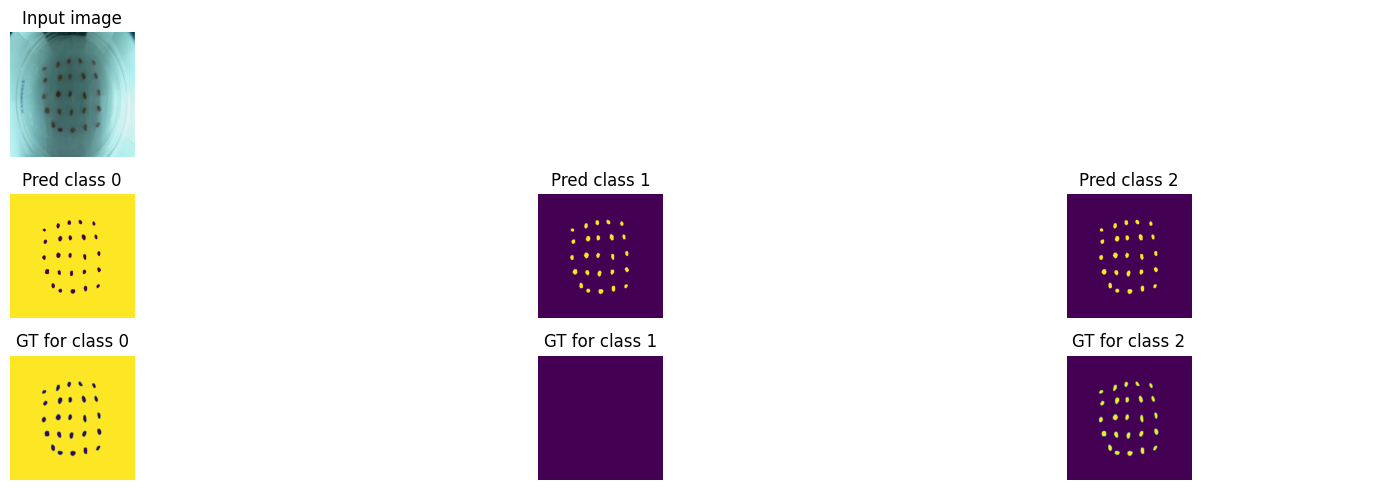

Train loss: 0.39176 | Time: 15m 16s | Val loss: 0.38179
Train_DICE_avg: 0.63344 | Train_Jaccard_avg: 0.56579 | Train_Sensitivity_avg: 0.62726 | Train_Specificity_avg: 0.98599 
Class 0 - Train_DICE: 0.97644 | Train_Jaccard: 0.95468 | Train_Sensitivity: 0.95531 | Train_Specificity: 0.96960 
Class 1 - Train_DICE: 0.14055 | Train_Jaccard: 0.08407 | Train_Sensitivity: 0.12222 | Train_Specificity: 0.99555 
Class 2 - Train_DICE: 0.78333 | Train_Jaccard: 0.65861 | Train_Sensitivity: 0.80425 | Train_Specificity: 0.99282 
Val_DICE_avg: 0.64611 | Val_Jaccard_avg: 0.58910 | Val_Sensitivity_avg: 0.63871 | Val_Specificity_avg: 0.97948 
Class 0 - Val_DICE: 0.99366 | Val_Jaccard: 0.98747 | Val_Sensitivity: 0.98852 | Val_Specificity: 0.94827 
Class 1 - Val_DICE: 0.13541 | Val_Jaccard: 0.08294 | Val_Sensitivity: 0.11948 | Val_Specificity: 0.99535 
Class 2 - Val_DICE: 0.80926 | Val_Jaccard: 0.69690 | Val_Sensitivity: 0.80813 | Val_Specificity: 0.99481 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.38618 | Time: 16m 13s | Val loss: 0.37708
Train_DICE_avg: 0.63415 | Train_Jaccard_avg: 0.56639 | Train_Sensitivity_avg: 0.62716 | Train_Specificity_avg: 0.98515 
Class 0 - Train_DICE: 0.97629 | Train_Jaccard: 0.95439 | Train_Sensitivity: 0.95509 | Train_Specificity: 0.96698 
Class 1 - Train_DICE: 0.14153 | Train_Jaccard: 0.08475 | Train_Sensitivity: 0.12224 | Train_Specificity: 0.99559 
Class 2 - Train_DICE: 0.78463 | Train_Jaccard: 0.66003 | Train_Sensitivity: 0.80415 | Train_Specificity: 0.99288 
Val_DICE_avg: 0.64543 | Val_Jaccard_avg: 0.58799 | Val_Sensitivity_avg: 0.64126 | Val_Specificity_avg: 0.98032 
Class 0 - Val_DICE: 0.99363 | Val_Jaccard: 0.98739 | Val_Sensitivity: 0.98836 | Val_Specificity: 0.95122 
Class 1 - Val_DICE: 0.13551 | Val_Jaccard: 0.08297 | Val_Sensitivity: 0.12039 | Val_Specificity: 0.99531 
Class 2 - Val_DICE: 0.80714 | Val_Jaccard: 0.69360 | Val_Sensitivity: 0.81505 | Val_Specificity: 0.99443 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.38266 | Time: 17m 11s | Val loss: 0.37418
Train_DICE_avg: 0.63481 | Train_Jaccard_avg: 0.56684 | Train_Sensitivity_avg: 0.62754 | Train_Specificity_avg: 0.98485 
Class 0 - Train_DICE: 0.97581 | Train_Jaccard: 0.95351 | Train_Sensitivity: 0.95424 | Train_Specificity: 0.96607 
Class 1 - Train_DICE: 0.14318 | Train_Jaccard: 0.08580 | Train_Sensitivity: 0.12381 | Train_Specificity: 0.99562 
Class 2 - Train_DICE: 0.78544 | Train_Jaccard: 0.66121 | Train_Sensitivity: 0.80457 | Train_Specificity: 0.99288 
Val_DICE_avg: 0.64622 | Val_Jaccard_avg: 0.58878 | Val_Sensitivity_avg: 0.64187 | Val_Specificity_avg: 0.97997 
Class 0 - Val_DICE: 0.99377 | Val_Jaccard: 0.98766 | Val_Sensitivity: 0.98867 | Val_Specificity: 0.95012 
Class 1 - Val_DICE: 0.13721 | Val_Jaccard: 0.08411 | Val_Sensitivity: 0.12170 | Val_Specificity: 0.99536 
Class 2 - Val_DICE: 0.80770 | Val_Jaccard: 0.69458 | Val_Sensitivity: 0.81525 | Val_Specificity: 0.99444 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.37980 | Time: 18m 8s | Val loss: 0.37219
Train_DICE_avg: 0.63590 | Train_Jaccard_avg: 0.56821 | Train_Sensitivity_avg: 0.62825 | Train_Specificity_avg: 0.98439 
Class 0 - Train_DICE: 0.97690 | Train_Jaccard: 0.95555 | Train_Sensitivity: 0.95632 | Train_Specificity: 0.96456 
Class 1 - Train_DICE: 0.14464 | Train_Jaccard: 0.08685 | Train_Sensitivity: 0.12464 | Train_Specificity: 0.99568 
Class 2 - Train_DICE: 0.78615 | Train_Jaccard: 0.66223 | Train_Sensitivity: 0.80379 | Train_Specificity: 0.99294 
Val_DICE_avg: 0.64658 | Val_Jaccard_avg: 0.58889 | Val_Sensitivity_avg: 0.64276 | Val_Specificity_avg: 0.98016 
Class 0 - Val_DICE: 0.99386 | Val_Jaccard: 0.98786 | Val_Sensitivity: 0.98888 | Val_Specificity: 0.95062 
Class 1 - Val_DICE: 0.13923 | Val_Jaccard: 0.08549 | Val_Sensitivity: 0.12329 | Val_Specificity: 0.99542 
Class 2 - Val_DICE: 0.80663 | Val_Jaccard: 0.69331 | Val_Sensitivity: 0.81611 | Val_Specificity: 0.99442 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.37813 | Time: 19m 5s | Val loss: 0.37055
Train_DICE_avg: 0.63667 | Train_Jaccard_avg: 0.56872 | Train_Sensitivity_avg: 0.62848 | Train_Specificity_avg: 0.98416 
Class 0 - Train_DICE: 0.97684 | Train_Jaccard: 0.95543 | Train_Sensitivity: 0.95623 | Train_Specificity: 0.96374 
Class 1 - Train_DICE: 0.14690 | Train_Jaccard: 0.08823 | Train_Sensitivity: 0.12631 | Train_Specificity: 0.99573 
Class 2 - Train_DICE: 0.78626 | Train_Jaccard: 0.66250 | Train_Sensitivity: 0.80291 | Train_Specificity: 0.99300 
Val_DICE_avg: 0.64734 | Val_Jaccard_avg: 0.58967 | Val_Sensitivity_avg: 0.64341 | Val_Specificity_avg: 0.98008 
Class 0 - Val_DICE: 0.99396 | Val_Jaccard: 0.98804 | Val_Sensitivity: 0.98908 | Val_Specificity: 0.95036 
Class 1 - Val_DICE: 0.14077 | Val_Jaccard: 0.08654 | Val_Sensitivity: 0.12452 | Val_Specificity: 0.99546 
Class 2 - Val_DICE: 0.80731 | Val_Jaccard: 0.69444 | Val_Sensitivity: 0.81663 | Val_Specificity: 0.99443 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


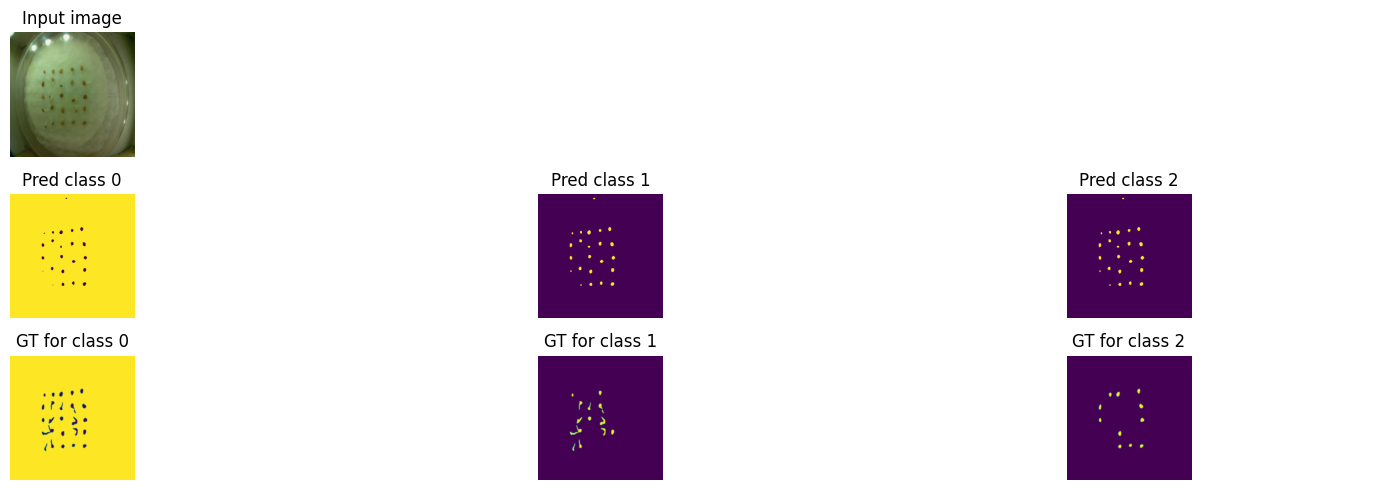

Train loss: 0.37542 | Time: 20m 3s | Val loss: 0.36784
Train_DICE_avg: 0.63807 | Train_Jaccard_avg: 0.57037 | Train_Sensitivity_avg: 0.62987 | Train_Specificity_avg: 0.98410 
Class 0 - Train_DICE: 0.97747 | Train_Jaccard: 0.95662 | Train_Sensitivity: 0.95745 | Train_Specificity: 0.96346 
Class 1 - Train_DICE: 0.14877 | Train_Jaccard: 0.08952 | Train_Sensitivity: 0.12762 | Train_Specificity: 0.99578 
Class 2 - Train_DICE: 0.78799 | Train_Jaccard: 0.66498 | Train_Sensitivity: 0.80454 | Train_Specificity: 0.99307 
Val_DICE_avg: 0.64890 | Val_Jaccard_avg: 0.59126 | Val_Sensitivity_avg: 0.64430 | Val_Specificity_avg: 0.97976 
Class 0 - Val_DICE: 0.99417 | Val_Jaccard: 0.98846 | Val_Sensitivity: 0.98956 | Val_Specificity: 0.94916 
Class 1 - Val_DICE: 0.14401 | Val_Jaccard: 0.08880 | Val_Sensitivity: 0.12633 | Val_Specificity: 0.99556 
Class 2 - Val_DICE: 0.80853 | Val_Jaccard: 0.69651 | Val_Sensitivity: 0.81701 | Val_Specificity: 0.99455 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.37306 | Time: 21m 0s | Val loss: 0.36632
Train_DICE_avg: 0.63985 | Train_Jaccard_avg: 0.57230 | Train_Sensitivity_avg: 0.63003 | Train_Specificity_avg: 0.98389 
Class 0 - Train_DICE: 0.97741 | Train_Jaccard: 0.95654 | Train_Sensitivity: 0.95743 | Train_Specificity: 0.96249 
Class 1 - Train_DICE: 0.15138 | Train_Jaccard: 0.09135 | Train_Sensitivity: 0.12887 | Train_Specificity: 0.99588 
Class 2 - Train_DICE: 0.79074 | Train_Jaccard: 0.66901 | Train_Sensitivity: 0.80379 | Train_Specificity: 0.99331 
Val_DICE_avg: 0.65087 | Val_Jaccard_avg: 0.59372 | Val_Sensitivity_avg: 0.64363 | Val_Specificity_avg: 0.97834 
Class 0 - Val_DICE: 0.99438 | Val_Jaccard: 0.98886 | Val_Sensitivity: 0.99009 | Val_Specificity: 0.94455 
Class 1 - Val_DICE: 0.14662 | Val_Jaccard: 0.09070 | Val_Sensitivity: 0.12728 | Val_Specificity: 0.99565 
Class 2 - Val_DICE: 0.81163 | Val_Jaccard: 0.70159 | Val_Sensitivity: 0.81352 | Val_Specificity: 0.99481 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.37187 | Time: 21m 57s | Val loss: 0.36524
Train_DICE_avg: 0.64060 | Train_Jaccard_avg: 0.57293 | Train_Sensitivity_avg: 0.62999 | Train_Specificity_avg: 0.98365 
Class 0 - Train_DICE: 0.97693 | Train_Jaccard: 0.95562 | Train_Sensitivity: 0.95654 | Train_Specificity: 0.96159 
Class 1 - Train_DICE: 0.15269 | Train_Jaccard: 0.09223 | Train_Sensitivity: 0.12970 | Train_Specificity: 0.99593 
Class 2 - Train_DICE: 0.79217 | Train_Jaccard: 0.67095 | Train_Sensitivity: 0.80372 | Train_Specificity: 0.99342 
Val_DICE_avg: 0.65112 | Val_Jaccard_avg: 0.59400 | Val_Sensitivity_avg: 0.64464 | Val_Specificity_avg: 0.97880 
Class 0 - Val_DICE: 0.99442 | Val_Jaccard: 0.98896 | Val_Sensitivity: 0.99018 | Val_Specificity: 0.94592 
Class 1 - Val_DICE: 0.14688 | Val_Jaccard: 0.09098 | Val_Sensitivity: 0.12760 | Val_Specificity: 0.99569 
Class 2 - Val_DICE: 0.81204 | Val_Jaccard: 0.70206 | Val_Sensitivity: 0.81613 | Val_Specificity: 0.99478 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.37025 | Time: 22m 55s | Val loss: 0.36440
Train_DICE_avg: 0.64193 | Train_Jaccard_avg: 0.57451 | Train_Sensitivity_avg: 0.63073 | Train_Specificity_avg: 0.98381 
Class 0 - Train_DICE: 0.97741 | Train_Jaccard: 0.95652 | Train_Sensitivity: 0.95745 | Train_Specificity: 0.96193 
Class 1 - Train_DICE: 0.15408 | Train_Jaccard: 0.09320 | Train_Sensitivity: 0.13014 | Train_Specificity: 0.99599 
Class 2 - Train_DICE: 0.79429 | Train_Jaccard: 0.67382 | Train_Sensitivity: 0.80460 | Train_Specificity: 0.99352 
Val_DICE_avg: 0.65150 | Val_Jaccard_avg: 0.59415 | Val_Sensitivity_avg: 0.64505 | Val_Specificity_avg: 0.97893 
Class 0 - Val_DICE: 0.99447 | Val_Jaccard: 0.98905 | Val_Sensitivity: 0.99026 | Val_Specificity: 0.94631 
Class 1 - Val_DICE: 0.14860 | Val_Jaccard: 0.09217 | Val_Sensitivity: 0.12860 | Val_Specificity: 0.99574 
Class 2 - Val_DICE: 0.81141 | Val_Jaccard: 0.70122 | Val_Sensitivity: 0.81629 | Val_Specificity: 0.99474 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Train loss: 0.36938 | Time: 23m 52s | Val loss: 0.36349
Train_DICE_avg: 0.64262 | Train_Jaccard_avg: 0.57538 | Train_Sensitivity_avg: 0.63130 | Train_Specificity_avg: 0.98375 
Class 0 - Train_DICE: 0.97794 | Train_Jaccard: 0.95756 | Train_Sensitivity: 0.95850 | Train_Specificity: 0.96162 
Class 1 - Train_DICE: 0.15517 | Train_Jaccard: 0.09397 | Train_Sensitivity: 0.13071 | Train_Specificity: 0.99603 
Class 2 - Train_DICE: 0.79476 | Train_Jaccard: 0.67460 | Train_Sensitivity: 0.80470 | Train_Specificity: 0.99359 
Val_DICE_avg: 0.65179 | Val_Jaccard_avg: 0.59476 | Val_Sensitivity_avg: 0.64654 | Val_Specificity_avg: 0.97997 
Class 0 - Val_DICE: 0.99459 | Val_Jaccard: 0.98929 | Val_Sensitivity: 0.99055 | Val_Specificity: 0.94920 
Class 1 - Val_DICE: 0.14864 | Val_Jaccard: 0.09233 | Val_Sensitivity: 0.12892 | Val_Specificity: 0.99579 
Class 2 - Val_DICE: 0.81215 | Val_Jaccard: 0.70266 | Val_Sensitivity: 0.82014 | Val_Specificity: 0.99492 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


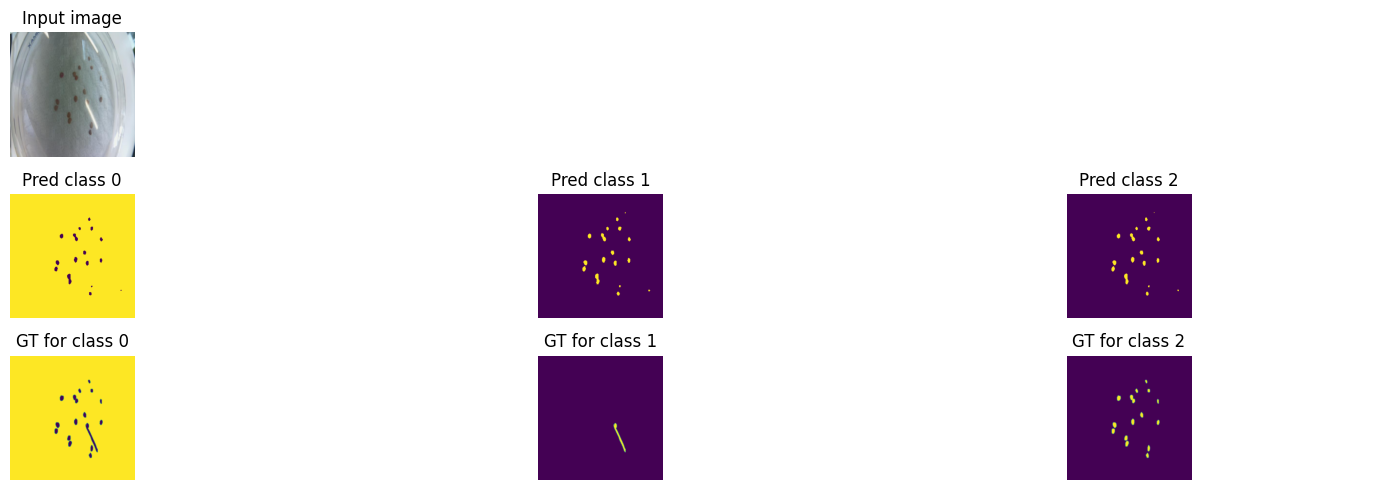

Train loss: 0.36833 | Time: 24m 50s | Val loss: 0.36315
Train_DICE_avg: 0.64329 | Train_Jaccard_avg: 0.57607 | Train_Sensitivity_avg: 0.63181 | Train_Specificity_avg: 0.98392 
Class 0 - Train_DICE: 0.97809 | Train_Jaccard: 0.95782 | Train_Sensitivity: 0.95876 | Train_Specificity: 0.96207 
Class 1 - Train_DICE: 0.15590 | Train_Jaccard: 0.09445 | Train_Sensitivity: 0.13113 | Train_Specificity: 0.99607 
Class 2 - Train_DICE: 0.79588 | Train_Jaccard: 0.67594 | Train_Sensitivity: 0.80552 | Train_Specificity: 0.99362 
Val_DICE_avg: 0.65302 | Val_Jaccard_avg: 0.59595 | Val_Sensitivity_avg: 0.64518 | Val_Specificity_avg: 0.97864 
Class 0 - Val_DICE: 0.99463 | Val_Jaccard: 0.98935 | Val_Sensitivity: 0.99065 | Val_Specificity: 0.94511 
Class 1 - Val_DICE: 0.15138 | Val_Jaccard: 0.09422 | Val_Sensitivity: 0.13002 | Val_Specificity: 0.99585 
Class 2 - Val_DICE: 0.81306 | Val_Jaccard: 0.70426 | Val_Sensitivity: 0.81488 | Val_Specificity: 0.99495 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.36793 | Time: 25m 47s | Val loss: 0.36251
Train_DICE_avg: 0.64378 | Train_Jaccard_avg: 0.57654 | Train_Sensitivity_avg: 0.63159 | Train_Specificity_avg: 0.98385 
Class 0 - Train_DICE: 0.97799 | Train_Jaccard: 0.95762 | Train_Sensitivity: 0.95858 | Train_Specificity: 0.96172 
Class 1 - Train_DICE: 0.15726 | Train_Jaccard: 0.09540 | Train_Sensitivity: 0.13204 | Train_Specificity: 0.99612 
Class 2 - Train_DICE: 0.79610 | Train_Jaccard: 0.67659 | Train_Sensitivity: 0.80414 | Train_Specificity: 0.99371 
Val_DICE_avg: 0.65333 | Val_Jaccard_avg: 0.59632 | Val_Sensitivity_avg: 0.64591 | Val_Specificity_avg: 0.97911 
Class 0 - Val_DICE: 0.99468 | Val_Jaccard: 0.98945 | Val_Sensitivity: 0.99074 | Val_Specificity: 0.94648 
Class 1 - Val_DICE: 0.15170 | Val_Jaccard: 0.09449 | Val_Sensitivity: 0.13027 | Val_Specificity: 0.99589 
Class 2 - Val_DICE: 0.81361 | Val_Jaccard: 0.70502 | Val_Sensitivity: 0.81673 | Val_Specificity: 0.99497 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Train loss: 0.36743 | Time: 26m 44s | Val loss: 0.36210
Train_DICE_avg: 0.64414 | Train_Jaccard_avg: 0.57695 | Train_Sensitivity_avg: 0.63193 | Train_Specificity_avg: 0.98378 
Class 0 - Train_DICE: 0.97802 | Train_Jaccard: 0.95768 | Train_Sensitivity: 0.95865 | Train_Specificity: 0.96147 
Class 1 - Train_DICE: 0.15777 | Train_Jaccard: 0.09578 | Train_Sensitivity: 0.13216 | Train_Specificity: 0.99614 
Class 2 - Train_DICE: 0.79661 | Train_Jaccard: 0.67740 | Train_Sensitivity: 0.80499 | Train_Specificity: 0.99372 
Val_DICE_avg: 0.65366 | Val_Jaccard_avg: 0.59639 | Val_Sensitivity_avg: 0.64584 | Val_Specificity_avg: 0.97878 
Class 0 - Val_DICE: 0.99468 | Val_Jaccard: 0.98947 | Val_Sensitivity: 0.99074 | Val_Specificity: 0.94556 
Class 1 - Val_DICE: 0.15366 | Val_Jaccard: 0.09588 | Val_Sensitivity: 0.13140 | Val_Specificity: 0.99592 
Class 2 - Val_DICE: 0.81262 | Val_Jaccard: 0.70382 | Val_Sensitivity: 0.81537 | Val_Specificity: 0.99486 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.36712 | Time: 27m 42s | Val loss: 0.36200
Train_DICE_avg: 0.64433 | Train_Jaccard_avg: 0.57704 | Train_Sensitivity_avg: 0.63178 | Train_Specificity_avg: 0.98380 
Class 0 - Train_DICE: 0.97754 | Train_Jaccard: 0.95679 | Train_Sensitivity: 0.95776 | Train_Specificity: 0.96147 
Class 1 - Train_DICE: 0.15809 | Train_Jaccard: 0.09605 | Train_Sensitivity: 0.13210 | Train_Specificity: 0.99617 
Class 2 - Train_DICE: 0.79735 | Train_Jaccard: 0.67827 | Train_Sensitivity: 0.80548 | Train_Specificity: 0.99376 
Val_DICE_avg: 0.65527 | Val_Jaccard_avg: 0.59875 | Val_Sensitivity_avg: 0.64463 | Val_Specificity_avg: 0.97717 
Class 0 - Val_DICE: 0.99490 | Val_Jaccard: 0.98989 | Val_Sensitivity: 0.99140 | Val_Specificity: 0.94012 
Class 1 - Val_DICE: 0.15445 | Val_Jaccard: 0.09653 | Val_Sensitivity: 0.13104 | Val_Specificity: 0.99602 
Class 2 - Val_DICE: 0.81646 | Val_Jaccard: 0.70985 | Val_Sensitivity: 0.81144 | Val_Specificity: 0.99537 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.36645 | Time: 28m 39s | Val loss: 0.36148
Train_DICE_avg: 0.64490 | Train_Jaccard_avg: 0.57779 | Train_Sensitivity_avg: 0.63218 | Train_Specificity_avg: 0.98373 
Class 0 - Train_DICE: 0.97794 | Train_Jaccard: 0.95754 | Train_Sensitivity: 0.95854 | Train_Specificity: 0.96116 
Class 1 - Train_DICE: 0.15866 | Train_Jaccard: 0.09642 | Train_Sensitivity: 0.13266 | Train_Specificity: 0.99620 
Class 2 - Train_DICE: 0.79811 | Train_Jaccard: 0.67940 | Train_Sensitivity: 0.80535 | Train_Specificity: 0.99383 
Val_DICE_avg: 0.65483 | Val_Jaccard_avg: 0.59822 | Val_Sensitivity_avg: 0.64572 | Val_Specificity_avg: 0.97815 
Class 0 - Val_DICE: 0.99487 | Val_Jaccard: 0.98983 | Val_Sensitivity: 0.99126 | Val_Specificity: 0.94323 
Class 1 - Val_DICE: 0.15357 | Val_Jaccard: 0.09590 | Val_Sensitivity: 0.13090 | Val_Specificity: 0.99600 
Class 2 - Val_DICE: 0.81604 | Val_Jaccard: 0.70892 | Val_Sensitivity: 0.81500 | Val_Specificity: 0.99522 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


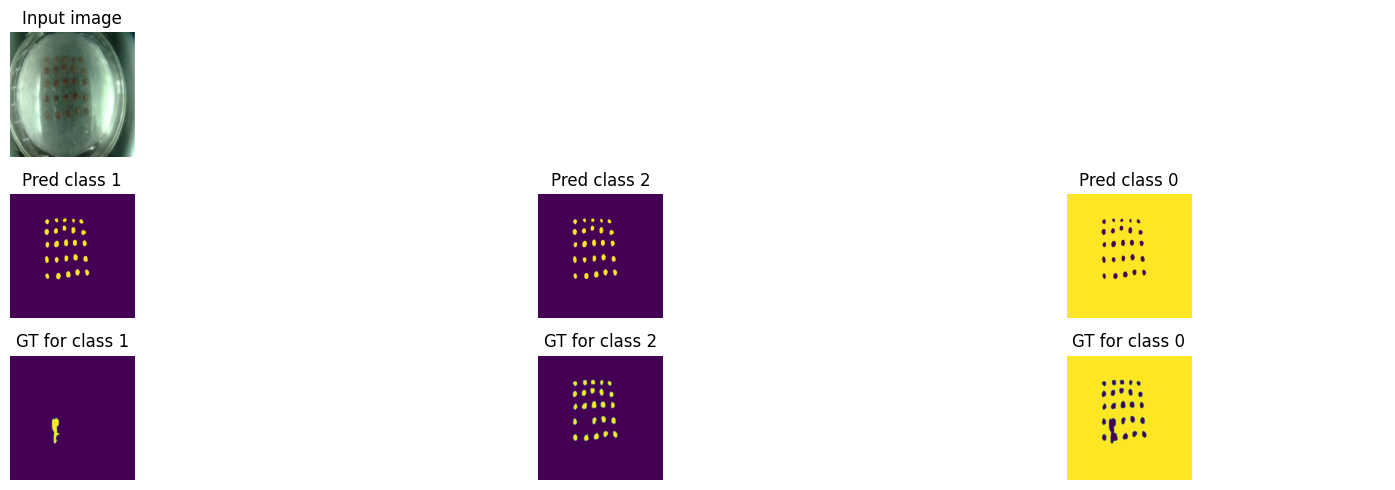

Train loss: 0.36602 | Time: 29m 36s | Val loss: 0.36083
Train_DICE_avg: 0.64515 | Train_Jaccard_avg: 0.57803 | Train_Sensitivity_avg: 0.63260 | Train_Specificity_avg: 0.98381 
Class 0 - Train_DICE: 0.97780 | Train_Jaccard: 0.95728 | Train_Sensitivity: 0.95828 | Train_Specificity: 0.96140 
Class 1 - Train_DICE: 0.15899 | Train_Jaccard: 0.09667 | Train_Sensitivity: 0.13274 | Train_Specificity: 0.99621 
Class 2 - Train_DICE: 0.79866 | Train_Jaccard: 0.68015 | Train_Sensitivity: 0.80677 | Train_Specificity: 0.99381 
Val_DICE_avg: 0.65519 | Val_Jaccard_avg: 0.59858 | Val_Sensitivity_avg: 0.64641 | Val_Specificity_avg: 0.97815 
Class 0 - Val_DICE: 0.99492 | Val_Jaccard: 0.98993 | Val_Sensitivity: 0.99135 | Val_Specificity: 0.94327 
Class 1 - Val_DICE: 0.15465 | Val_Jaccard: 0.09668 | Val_Sensitivity: 0.13213 | Val_Specificity: 0.99600 
Class 2 - Val_DICE: 0.81600 | Val_Jaccard: 0.70913 | Val_Sensitivity: 0.81575 | Val_Specificity: 0.99518 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.36520 | Time: 30m 34s | Val loss: 0.36043
Train_DICE_avg: 0.64600 | Train_Jaccard_avg: 0.57906 | Train_Sensitivity_avg: 0.63260 | Train_Specificity_avg: 0.98354 
Class 0 - Train_DICE: 0.97814 | Train_Jaccard: 0.95792 | Train_Sensitivity: 0.95896 | Train_Specificity: 0.96043 
Class 1 - Train_DICE: 0.16008 | Train_Jaccard: 0.09743 | Train_Sensitivity: 0.13306 | Train_Specificity: 0.99626 
Class 2 - Train_DICE: 0.79977 | Train_Jaccard: 0.68182 | Train_Sensitivity: 0.80579 | Train_Specificity: 0.99392 
Val_DICE_avg: 0.65587 | Val_Jaccard_avg: 0.59934 | Val_Sensitivity_avg: 0.64631 | Val_Specificity_avg: 0.97799 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99008 | Val_Sensitivity: 0.99153 | Val_Specificity: 0.94262 
Class 1 - Val_DICE: 0.15545 | Val_Jaccard: 0.09727 | Val_Sensitivity: 0.13197 | Val_Specificity: 0.99606 
Class 2 - Val_DICE: 0.81717 | Val_Jaccard: 0.71068 | Val_Sensitivity: 0.81543 | Val_Specificity: 0.99528 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.36515 | Time: 31m 31s | Val loss: 0.36019
Train_DICE_avg: 0.64612 | Train_Jaccard_avg: 0.57911 | Train_Sensitivity_avg: 0.63242 | Train_Specificity_avg: 0.98346 
Class 0 - Train_DICE: 0.97760 | Train_Jaccard: 0.95693 | Train_Sensitivity: 0.95798 | Train_Specificity: 0.96015 
Class 1 - Train_DICE: 0.16035 | Train_Jaccard: 0.09766 | Train_Sensitivity: 0.13301 | Train_Specificity: 0.99628 
Class 2 - Train_DICE: 0.80041 | Train_Jaccard: 0.68275 | Train_Sensitivity: 0.80628 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.65662 | Val_Jaccard_avg: 0.60035 | Val_Sensitivity_avg: 0.64599 | Val_Specificity_avg: 0.97711 
Class 0 - Val_DICE: 0.99507 | Val_Jaccard: 0.99024 | Val_Sensitivity: 0.99179 | Val_Specificity: 0.93979 
Class 1 - Val_DICE: 0.15621 | Val_Jaccard: 0.09787 | Val_Sensitivity: 0.13204 | Val_Specificity: 0.99612 
Class 2 - Val_DICE: 0.81857 | Val_Jaccard: 0.71294 | Val_Sensitivity: 0.81415 | Val_Specificity: 0.99541 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.36460 | Time: 32m 28s | Val loss: 0.35960
Train_DICE_avg: 0.64657 | Train_Jaccard_avg: 0.57962 | Train_Sensitivity_avg: 0.63303 | Train_Specificity_avg: 0.98346 
Class 0 - Train_DICE: 0.97804 | Train_Jaccard: 0.95773 | Train_Sensitivity: 0.95879 | Train_Specificity: 0.96012 
Class 1 - Train_DICE: 0.16104 | Train_Jaccard: 0.09812 | Train_Sensitivity: 0.13319 | Train_Specificity: 0.99631 
Class 2 - Train_DICE: 0.80064 | Train_Jaccard: 0.68300 | Train_Sensitivity: 0.80710 | Train_Specificity: 0.99394 
Val_DICE_avg: 0.65579 | Val_Jaccard_avg: 0.59904 | Val_Sensitivity_avg: 0.64757 | Val_Specificity_avg: 0.97831 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99007 | Val_Sensitivity: 0.99145 | Val_Specificity: 0.94382 
Class 1 - Val_DICE: 0.15634 | Val_Jaccard: 0.09793 | Val_Sensitivity: 0.13301 | Val_Specificity: 0.99607 
Class 2 - Val_DICE: 0.81605 | Val_Jaccard: 0.70911 | Val_Sensitivity: 0.81824 | Val_Specificity: 0.99504 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.36436 | Time: 33m 26s | Val loss: 0.35954
Train_DICE_avg: 0.64692 | Train_Jaccard_avg: 0.57995 | Train_Sensitivity_avg: 0.63277 | Train_Specificity_avg: 0.98317 
Class 0 - Train_DICE: 0.97751 | Train_Jaccard: 0.95675 | Train_Sensitivity: 0.95785 | Train_Specificity: 0.95916 
Class 1 - Train_DICE: 0.16156 | Train_Jaccard: 0.09853 | Train_Sensitivity: 0.13348 | Train_Specificity: 0.99635 
Class 2 - Train_DICE: 0.80168 | Train_Jaccard: 0.68455 | Train_Sensitivity: 0.80699 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.65629 | Val_Jaccard_avg: 0.59986 | Val_Sensitivity_avg: 0.64696 | Val_Specificity_avg: 0.97722 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99028 | Val_Sensitivity: 0.99181 | Val_Specificity: 0.94026 
Class 1 - Val_DICE: 0.15630 | Val_Jaccard: 0.09795 | Val_Sensitivity: 0.13278 | Val_Specificity: 0.99612 
Class 2 - Val_DICE: 0.81748 | Val_Jaccard: 0.71135 | Val_Sensitivity: 0.81630 | Val_Specificity: 0.99527 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


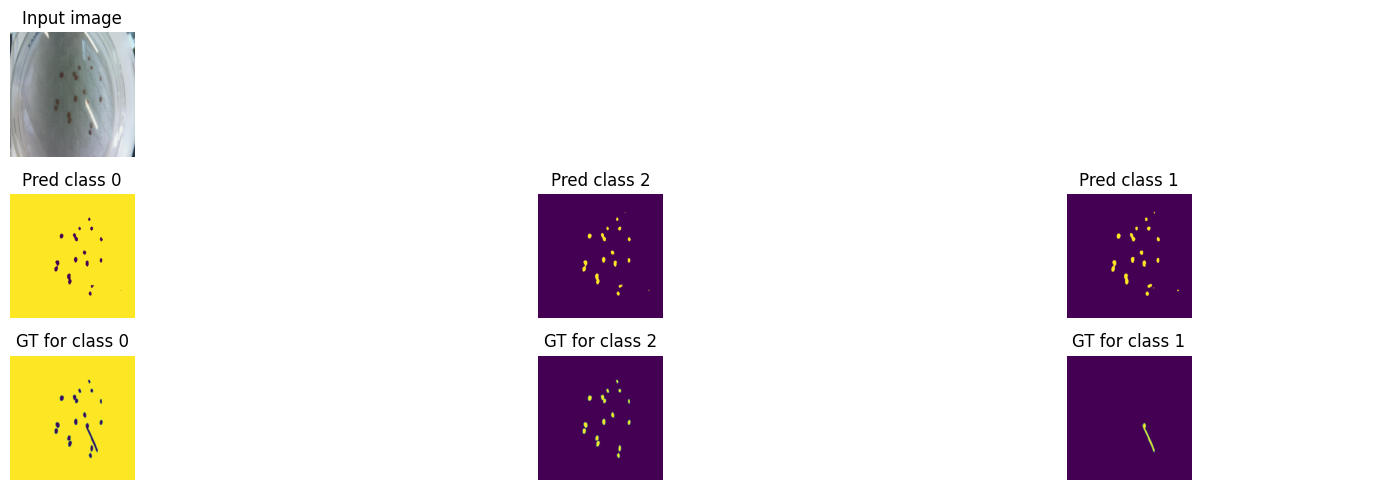

Train loss: 0.36347 | Time: 34m 24s | Val loss: 0.35924
Train_DICE_avg: 0.64755 | Train_Jaccard_avg: 0.58093 | Train_Sensitivity_avg: 0.63388 | Train_Specificity_avg: 0.98325 
Class 0 - Train_DICE: 0.97870 | Train_Jaccard: 0.95895 | Train_Sensitivity: 0.96005 | Train_Specificity: 0.95936 
Class 1 - Train_DICE: 0.16165 | Train_Jaccard: 0.09860 | Train_Sensitivity: 0.13351 | Train_Specificity: 0.99637 
Class 2 - Train_DICE: 0.80231 | Train_Jaccard: 0.68523 | Train_Sensitivity: 0.80806 | Train_Specificity: 0.99403 
Val_DICE_avg: 0.65612 | Val_Jaccard_avg: 0.59981 | Val_Sensitivity_avg: 0.64800 | Val_Specificity_avg: 0.97799 
Class 0 - Val_DICE: 0.99514 | Val_Jaccard: 0.99036 | Val_Sensitivity: 0.99192 | Val_Specificity: 0.94253 
Class 1 - Val_DICE: 0.15582 | Val_Jaccard: 0.09766 | Val_Sensitivity: 0.13202 | Val_Specificity: 0.99615 
Class 2 - Val_DICE: 0.81742 | Val_Jaccard: 0.71141 | Val_Sensitivity: 0.82005 | Val_Specificity: 0.99529 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.36324 | Time: 35m 21s | Val loss: 0.35886
Train_DICE_avg: 0.64779 | Train_Jaccard_avg: 0.58119 | Train_Sensitivity_avg: 0.63383 | Train_Specificity_avg: 0.98290 
Class 0 - Train_DICE: 0.97854 | Train_Jaccard: 0.95869 | Train_Sensitivity: 0.95983 | Train_Specificity: 0.95825 
Class 1 - Train_DICE: 0.16191 | Train_Jaccard: 0.09879 | Train_Sensitivity: 0.13336 | Train_Specificity: 0.99639 
Class 2 - Train_DICE: 0.80292 | Train_Jaccard: 0.68609 | Train_Sensitivity: 0.80830 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.65497 | Val_Jaccard_avg: 0.59809 | Val_Sensitivity_avg: 0.65001 | Val_Specificity_avg: 0.97966 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99026 | Val_Sensitivity: 0.99167 | Val_Specificity: 0.94788 
Class 1 - Val_DICE: 0.15537 | Val_Jaccard: 0.09732 | Val_Sensitivity: 0.13225 | Val_Specificity: 0.99613 
Class 2 - Val_DICE: 0.81446 | Val_Jaccard: 0.70669 | Val_Sensitivity: 0.82610 | Val_Specificity: 0.99498 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.36316 | Time: 36m 19s | Val loss: 0.35866
Train_DICE_avg: 0.64788 | Train_Jaccard_avg: 0.58120 | Train_Sensitivity_avg: 0.63391 | Train_Specificity_avg: 0.98284 
Class 0 - Train_DICE: 0.97821 | Train_Jaccard: 0.95808 | Train_Sensitivity: 0.95923 | Train_Specificity: 0.95806 
Class 1 - Train_DICE: 0.16193 | Train_Jaccard: 0.09883 | Train_Sensitivity: 0.13304 | Train_Specificity: 0.99641 
Class 2 - Train_DICE: 0.80350 | Train_Jaccard: 0.68670 | Train_Sensitivity: 0.80945 | Train_Specificity: 0.99404 
Val_DICE_avg: 0.65561 | Val_Jaccard_avg: 0.59876 | Val_Sensitivity_avg: 0.64955 | Val_Specificity_avg: 0.97886 
Class 0 - Val_DICE: 0.99513 | Val_Jaccard: 0.99035 | Val_Sensitivity: 0.99178 | Val_Specificity: 0.94542 
Class 1 - Val_DICE: 0.15674 | Val_Jaccard: 0.09829 | Val_Sensitivity: 0.13236 | Val_Specificity: 0.99616 
Class 2 - Val_DICE: 0.81495 | Val_Jaccard: 0.70765 | Val_Sensitivity: 0.82449 | Val_Specificity: 0.99499 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


Train loss: 0.36294 | Time: 37m 16s | Val loss: 0.35851
Train_DICE_avg: 0.64804 | Train_Jaccard_avg: 0.58136 | Train_Sensitivity_avg: 0.63428 | Train_Specificity_avg: 0.98279 
Class 0 - Train_DICE: 0.97827 | Train_Jaccard: 0.95818 | Train_Sensitivity: 0.95934 | Train_Specificity: 0.95791 
Class 1 - Train_DICE: 0.16241 | Train_Jaccard: 0.09921 | Train_Sensitivity: 0.13329 | Train_Specificity: 0.99643 
Class 2 - Train_DICE: 0.80344 | Train_Jaccard: 0.68670 | Train_Sensitivity: 0.81019 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.65647 | Val_Jaccard_avg: 0.60002 | Val_Sensitivity_avg: 0.64900 | Val_Specificity_avg: 0.97745 
Class 0 - Val_DICE: 0.99519 | Val_Jaccard: 0.99047 | Val_Sensitivity: 0.99202 | Val_Specificity: 0.94103 
Class 1 - Val_DICE: 0.15688 | Val_Jaccard: 0.09841 | Val_Sensitivity: 0.13232 | Val_Specificity: 0.99618 
Class 2 - Val_DICE: 0.81734 | Val_Jaccard: 0.71117 | Val_Sensitivity: 0.82266 | Val_Specificity: 0.99513 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]


Train loss: 0.36241 | Time: 38m 14s | Val loss: 0.35852
Train_DICE_avg: 0.64844 | Train_Jaccard_avg: 0.58212 | Train_Sensitivity_avg: 0.63481 | Train_Specificity_avg: 0.98253 
Class 0 - Train_DICE: 0.97875 | Train_Jaccard: 0.95909 | Train_Sensitivity: 0.96030 | Train_Specificity: 0.95711 
Class 1 - Train_DICE: 0.16131 | Train_Jaccard: 0.09849 | Train_Sensitivity: 0.13211 | Train_Specificity: 0.99643 
Class 2 - Train_DICE: 0.80527 | Train_Jaccard: 0.68879 | Train_Sensitivity: 0.81203 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.65681 | Val_Jaccard_avg: 0.60054 | Val_Sensitivity_avg: 0.64894 | Val_Specificity_avg: 0.97682 
Class 0 - Val_DICE: 0.99522 | Val_Jaccard: 0.99054 | Val_Sensitivity: 0.99216 | Val_Specificity: 0.93903 
Class 1 - Val_DICE: 0.15654 | Val_Jaccard: 0.09826 | Val_Sensitivity: 0.13155 | Val_Specificity: 0.99622 
Class 2 - Val_DICE: 0.81867 | Val_Jaccard: 0.71283 | Val_Sensitivity: 0.82311 | Val_Specificity: 0.99521 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


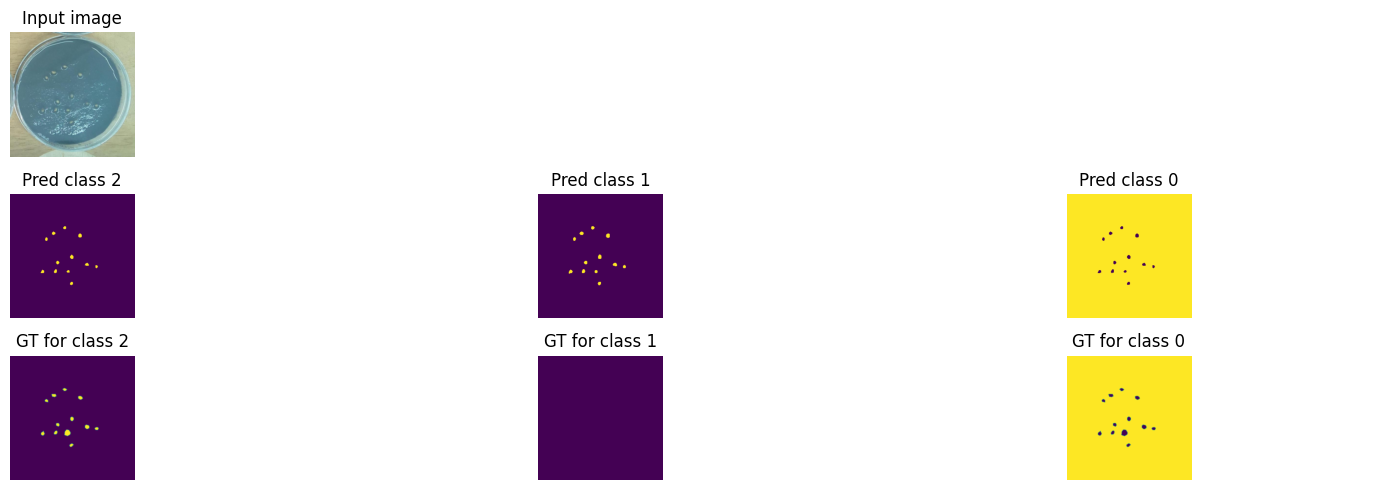

Train loss: 0.36204 | Time: 39m 12s | Val loss: 0.35826
Train_DICE_avg: 0.64875 | Train_Jaccard_avg: 0.58246 | Train_Sensitivity_avg: 0.63479 | Train_Specificity_avg: 0.98226 
Class 0 - Train_DICE: 0.97867 | Train_Jaccard: 0.95893 | Train_Sensitivity: 0.96016 | Train_Specificity: 0.95624 
Class 1 - Train_DICE: 0.16145 | Train_Jaccard: 0.09860 | Train_Sensitivity: 0.13180 | Train_Specificity: 0.99646 
Class 2 - Train_DICE: 0.80612 | Train_Jaccard: 0.68985 | Train_Sensitivity: 0.81240 | Train_Specificity: 0.99409 
Val_DICE_avg: 0.65539 | Val_Jaccard_avg: 0.59870 | Val_Sensitivity_avg: 0.65086 | Val_Specificity_avg: 0.97864 
Class 0 - Val_DICE: 0.99519 | Val_Jaccard: 0.99047 | Val_Sensitivity: 0.99196 | Val_Specificity: 0.94477 
Class 1 - Val_DICE: 0.15520 | Val_Jaccard: 0.09736 | Val_Sensitivity: 0.13098 | Val_Specificity: 0.99618 
Class 2 - Val_DICE: 0.81578 | Val_Jaccard: 0.70826 | Val_Sensitivity: 0.82963 | Val_Specificity: 0.99495 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.36224 | Time: 40m 9s | Val loss: 0.35801
Train_DICE_avg: 0.64852 | Train_Jaccard_avg: 0.58224 | Train_Sensitivity_avg: 0.63496 | Train_Specificity_avg: 0.98220 
Class 0 - Train_DICE: 0.97832 | Train_Jaccard: 0.95827 | Train_Sensitivity: 0.95951 | Train_Specificity: 0.95605 
Class 1 - Train_DICE: 0.16095 | Train_Jaccard: 0.09832 | Train_Sensitivity: 0.13105 | Train_Specificity: 0.99646 
Class 2 - Train_DICE: 0.80630 | Train_Jaccard: 0.69011 | Train_Sensitivity: 0.81431 | Train_Specificity: 0.99408 
Val_DICE_avg: 0.65653 | Val_Jaccard_avg: 0.60015 | Val_Sensitivity_avg: 0.65052 | Val_Specificity_avg: 0.97739 
Class 0 - Val_DICE: 0.99525 | Val_Jaccard: 0.99059 | Val_Sensitivity: 0.99219 | Val_Specificity: 0.94086 
Class 1 - Val_DICE: 0.15569 | Val_Jaccard: 0.09779 | Val_Sensitivity: 0.13052 | Val_Specificity: 0.99624 
Class 2 - Val_DICE: 0.81865 | Val_Jaccard: 0.71206 | Val_Sensitivity: 0.82884 | Val_Specificity: 0.99508 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Train loss: 0.36177 | Time: 41m 6s | Val loss: 0.35788
Train_DICE_avg: 0.64900 | Train_Jaccard_avg: 0.58290 | Train_Sensitivity_avg: 0.63559 | Train_Specificity_avg: 0.98203 
Class 0 - Train_DICE: 0.97898 | Train_Jaccard: 0.95954 | Train_Sensitivity: 0.96080 | Train_Specificity: 0.95557 
Class 1 - Train_DICE: 0.16117 | Train_Jaccard: 0.09843 | Train_Sensitivity: 0.13104 | Train_Specificity: 0.99648 
Class 2 - Train_DICE: 0.80685 | Train_Jaccard: 0.69072 | Train_Sensitivity: 0.81493 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.65630 | Val_Jaccard_avg: 0.59988 | Val_Sensitivity_avg: 0.65113 | Val_Specificity_avg: 0.97749 
Class 0 - Val_DICE: 0.99524 | Val_Jaccard: 0.99057 | Val_Sensitivity: 0.99214 | Val_Specificity: 0.94126 
Class 1 - Val_DICE: 0.15495 | Val_Jaccard: 0.09729 | Val_Sensitivity: 0.12945 | Val_Specificity: 0.99622 
Class 2 - Val_DICE: 0.81872 | Val_Jaccard: 0.71176 | Val_Sensitivity: 0.83181 | Val_Specificity: 0.99497 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.36160 | Time: 42m 3s | Val loss: 0.35778
Train_DICE_avg: 0.64913 | Train_Jaccard_avg: 0.58306 | Train_Sensitivity_avg: 0.63591 | Train_Specificity_avg: 0.98182 
Class 0 - Train_DICE: 0.97900 | Train_Jaccard: 0.95958 | Train_Sensitivity: 0.96087 | Train_Specificity: 0.95491 
Class 1 - Train_DICE: 0.16116 | Train_Jaccard: 0.09851 | Train_Sensitivity: 0.13047 | Train_Specificity: 0.99650 
Class 2 - Train_DICE: 0.80722 | Train_Jaccard: 0.69108 | Train_Sensitivity: 0.81640 | Train_Specificity: 0.99404 
Val_DICE_avg: 0.65611 | Val_Jaccard_avg: 0.59991 | Val_Sensitivity_avg: 0.65174 | Val_Specificity_avg: 0.97743 
Class 0 - Val_DICE: 0.99526 | Val_Jaccard: 0.99061 | Val_Sensitivity: 0.99221 | Val_Specificity: 0.94107 
Class 1 - Val_DICE: 0.15388 | Val_Jaccard: 0.09668 | Val_Sensitivity: 0.12817 | Val_Specificity: 0.99623 
Class 2 - Val_DICE: 0.81918 | Val_Jaccard: 0.71243 | Val_Sensitivity: 0.83482 | Val_Specificity: 0.99498 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.36146 | Time: 43m 1s | Val loss: 0.35768
Train_DICE_avg: 0.64922 | Train_Jaccard_avg: 0.58324 | Train_Sensitivity_avg: 0.63593 | Train_Specificity_avg: 0.98154 
Class 0 - Train_DICE: 0.97890 | Train_Jaccard: 0.95937 | Train_Sensitivity: 0.96069 | Train_Specificity: 0.95406 
Class 1 - Train_DICE: 0.16044 | Train_Jaccard: 0.09806 | Train_Sensitivity: 0.12945 | Train_Specificity: 0.99651 
Class 2 - Train_DICE: 0.80833 | Train_Jaccard: 0.69227 | Train_Sensitivity: 0.81766 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.65569 | Val_Jaccard_avg: 0.59896 | Val_Sensitivity_avg: 0.65157 | Val_Specificity_avg: 0.97725 
Class 0 - Val_DICE: 0.99523 | Val_Jaccard: 0.99054 | Val_Sensitivity: 0.99208 | Val_Specificity: 0.94074 
Class 1 - Val_DICE: 0.15466 | Val_Jaccard: 0.09711 | Val_Sensitivity: 0.12846 | Val_Specificity: 0.99621 
Class 2 - Val_DICE: 0.81718 | Val_Jaccard: 0.70922 | Val_Sensitivity: 0.83416 | Val_Specificity: 0.99479 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


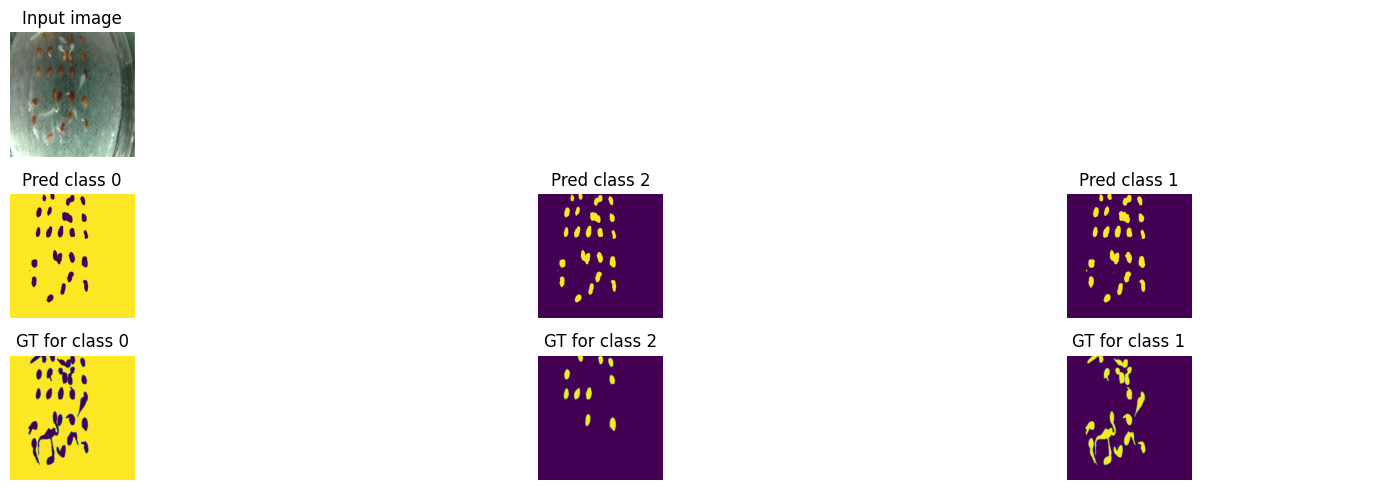

Train loss: 0.36081 | Time: 43m 58s | Val loss: 0.35759
Train_DICE_avg: 0.64972 | Train_Jaccard_avg: 0.58397 | Train_Sensitivity_avg: 0.63636 | Train_Specificity_avg: 0.98124 
Class 0 - Train_DICE: 0.97949 | Train_Jaccard: 0.96051 | Train_Sensitivity: 0.96184 | Train_Specificity: 0.95314 
Class 1 - Train_DICE: 0.16074 | Train_Jaccard: 0.09826 | Train_Sensitivity: 0.12910 | Train_Specificity: 0.99653 
Class 2 - Train_DICE: 0.80893 | Train_Jaccard: 0.69315 | Train_Sensitivity: 0.81812 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.65567 | Val_Jaccard_avg: 0.59912 | Val_Sensitivity_avg: 0.65221 | Val_Specificity_avg: 0.97720 
Class 0 - Val_DICE: 0.99525 | Val_Jaccard: 0.99059 | Val_Sensitivity: 0.99216 | Val_Specificity: 0.94057 
Class 1 - Val_DICE: 0.15423 | Val_Jaccard: 0.09693 | Val_Sensitivity: 0.12791 | Val_Specificity: 0.99623 
Class 2 - Val_DICE: 0.81753 | Val_Jaccard: 0.70984 | Val_Sensitivity: 0.83656 | Val_Specificity: 0.99480 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.36083 | Time: 44m 56s | Val loss: 0.35744
Train_DICE_avg: 0.64959 | Train_Jaccard_avg: 0.58383 | Train_Sensitivity_avg: 0.63663 | Train_Specificity_avg: 0.98105 
Class 0 - Train_DICE: 0.97943 | Train_Jaccard: 0.96040 | Train_Sensitivity: 0.96177 | Train_Specificity: 0.95256 
Class 1 - Train_DICE: 0.16057 | Train_Jaccard: 0.09817 | Train_Sensitivity: 0.12917 | Train_Specificity: 0.99654 
Class 2 - Train_DICE: 0.80877 | Train_Jaccard: 0.69291 | Train_Sensitivity: 0.81893 | Train_Specificity: 0.99407 
Val_DICE_avg: 0.65511 | Val_Jaccard_avg: 0.59836 | Val_Sensitivity_avg: 0.65290 | Val_Specificity_avg: 0.97787 
Class 0 - Val_DICE: 0.99526 | Val_Jaccard: 0.99060 | Val_Sensitivity: 0.99214 | Val_Specificity: 0.94268 
Class 1 - Val_DICE: 0.15383 | Val_Jaccard: 0.09666 | Val_Sensitivity: 0.12729 | Val_Specificity: 0.99623 
Class 2 - Val_DICE: 0.81625 | Val_Jaccard: 0.70782 | Val_Sensitivity: 0.83927 | Val_Specificity: 0.99470 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Train loss: 0.36098 | Time: 45m 53s | Val loss: 0.35747
Train_DICE_avg: 0.64943 | Train_Jaccard_avg: 0.58341 | Train_Sensitivity_avg: 0.63602 | Train_Specificity_avg: 0.98066 
Class 0 - Train_DICE: 0.97852 | Train_Jaccard: 0.95867 | Train_Sensitivity: 0.96007 | Train_Specificity: 0.95138 
Class 1 - Train_DICE: 0.16068 | Train_Jaccard: 0.09829 | Train_Sensitivity: 0.12886 | Train_Specificity: 0.99655 
Class 2 - Train_DICE: 0.80908 | Train_Jaccard: 0.69327 | Train_Sensitivity: 0.81914 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.65521 | Val_Jaccard_avg: 0.59863 | Val_Sensitivity_avg: 0.65249 | Val_Specificity_avg: 0.97699 
Class 0 - Val_DICE: 0.99528 | Val_Jaccard: 0.99064 | Val_Sensitivity: 0.99226 | Val_Specificity: 0.93997 
Class 1 - Val_DICE: 0.15363 | Val_Jaccard: 0.09655 | Val_Sensitivity: 0.12677 | Val_Specificity: 0.99624 
Class 2 - Val_DICE: 0.81672 | Val_Jaccard: 0.70869 | Val_Sensitivity: 0.83843 | Val_Specificity: 0.99477 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.36095 | Time: 46m 50s | Val loss: 0.35732
Train_DICE_avg: 0.64942 | Train_Jaccard_avg: 0.58335 | Train_Sensitivity_avg: 0.63602 | Train_Specificity_avg: 0.98044 
Class 0 - Train_DICE: 0.97853 | Train_Jaccard: 0.95868 | Train_Sensitivity: 0.96011 | Train_Specificity: 0.95070 
Class 1 - Train_DICE: 0.16080 | Train_Jaccard: 0.09833 | Train_Sensitivity: 0.12902 | Train_Specificity: 0.99657 
Class 2 - Train_DICE: 0.80892 | Train_Jaccard: 0.69305 | Train_Sensitivity: 0.81892 | Train_Specificity: 0.99407 
Val_DICE_avg: 0.65487 | Val_Jaccard_avg: 0.59798 | Val_Sensitivity_avg: 0.65335 | Val_Specificity_avg: 0.97758 
Class 0 - Val_DICE: 0.99529 | Val_Jaccard: 0.99066 | Val_Sensitivity: 0.99227 | Val_Specificity: 0.94180 
Class 1 - Val_DICE: 0.15401 | Val_Jaccard: 0.09676 | Val_Sensitivity: 0.12766 | Val_Specificity: 0.99626 
Class 2 - Val_DICE: 0.81530 | Val_Jaccard: 0.70653 | Val_Sensitivity: 0.84011 | Val_Specificity: 0.99469 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.36083 | Time: 47m 47s | Val loss: 0.35714
Train_DICE_avg: 0.64968 | Train_Jaccard_avg: 0.58370 | Train_Sensitivity_avg: 0.63655 | Train_Specificity_avg: 0.98039 
Class 0 - Train_DICE: 0.97877 | Train_Jaccard: 0.95913 | Train_Sensitivity: 0.96058 | Train_Specificity: 0.95055 
Class 1 - Train_DICE: 0.16068 | Train_Jaccard: 0.09827 | Train_Sensitivity: 0.12841 | Train_Specificity: 0.99658 
Class 2 - Train_DICE: 0.80959 | Train_Jaccard: 0.69370 | Train_Sensitivity: 0.82068 | Train_Specificity: 0.99403 
Val_DICE_avg: 0.65578 | Val_Jaccard_avg: 0.59911 | Val_Sensitivity_avg: 0.65292 | Val_Specificity_avg: 0.97644 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99070 | Val_Sensitivity: 0.99239 | Val_Specificity: 0.93830 
Class 1 - Val_DICE: 0.15487 | Val_Jaccard: 0.09734 | Val_Sensitivity: 0.12802 | Val_Specificity: 0.99627 
Class 2 - Val_DICE: 0.81716 | Val_Jaccard: 0.70929 | Val_Sensitivity: 0.83836 | Val_Specificity: 0.99475 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


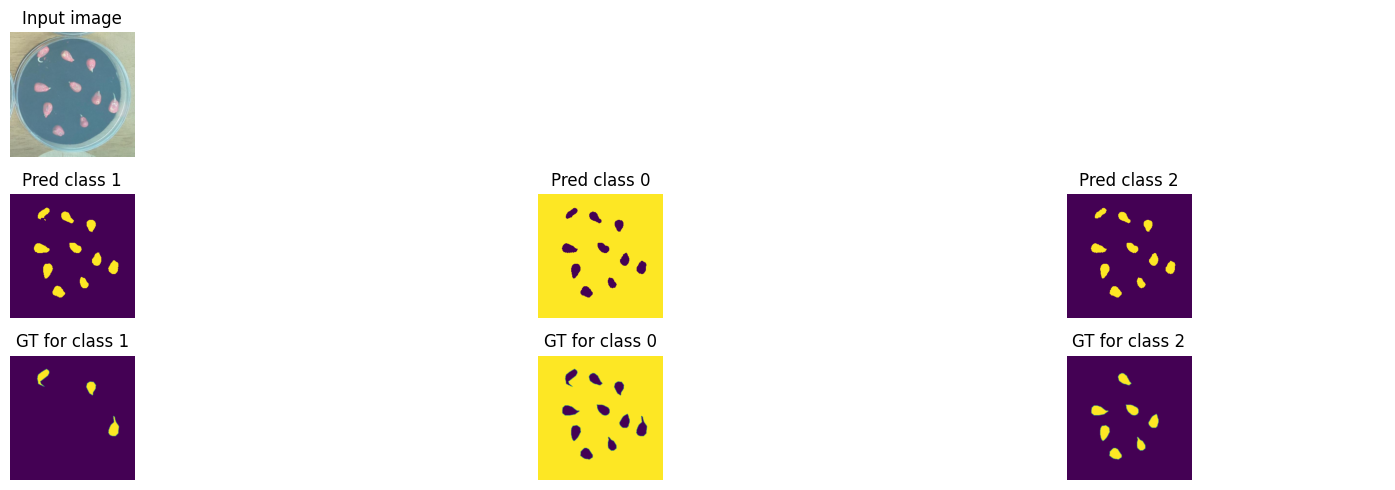

Train loss: 0.36023 | Time: 48m 45s | Val loss: 0.35707
Train_DICE_avg: 0.65007 | Train_Jaccard_avg: 0.58427 | Train_Sensitivity_avg: 0.63667 | Train_Specificity_avg: 0.97996 
Class 0 - Train_DICE: 0.97889 | Train_Jaccard: 0.95936 | Train_Sensitivity: 0.96085 | Train_Specificity: 0.94919 
Class 1 - Train_DICE: 0.16067 | Train_Jaccard: 0.09831 | Train_Sensitivity: 0.12817 | Train_Specificity: 0.99660 
Class 2 - Train_DICE: 0.81063 | Train_Jaccard: 0.69513 | Train_Sensitivity: 0.82101 | Train_Specificity: 0.99408 
Val_DICE_avg: 0.65567 | Val_Jaccard_avg: 0.59897 | Val_Sensitivity_avg: 0.65317 | Val_Specificity_avg: 0.97629 
Class 0 - Val_DICE: 0.99532 | Val_Jaccard: 0.99072 | Val_Sensitivity: 0.99242 | Val_Specificity: 0.93787 
Class 1 - Val_DICE: 0.15462 | Val_Jaccard: 0.09718 | Val_Sensitivity: 0.12749 | Val_Specificity: 0.99628 
Class 2 - Val_DICE: 0.81708 | Val_Jaccard: 0.70900 | Val_Sensitivity: 0.83958 | Val_Specificity: 0.99472 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]


Train loss: 0.36031 | Time: 49m 42s | Val loss: 0.35699
Train_DICE_avg: 0.64997 | Train_Jaccard_avg: 0.58421 | Train_Sensitivity_avg: 0.63701 | Train_Specificity_avg: 0.97986 
Class 0 - Train_DICE: 0.97919 | Train_Jaccard: 0.95995 | Train_Sensitivity: 0.96145 | Train_Specificity: 0.94895 
Class 1 - Train_DICE: 0.16042 | Train_Jaccard: 0.09812 | Train_Sensitivity: 0.12784 | Train_Specificity: 0.99660 
Class 2 - Train_DICE: 0.81029 | Train_Jaccard: 0.69456 | Train_Sensitivity: 0.82175 | Train_Specificity: 0.99403 
Val_DICE_avg: 0.65529 | Val_Jaccard_avg: 0.59843 | Val_Sensitivity_avg: 0.65337 | Val_Specificity_avg: 0.97641 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99071 | Val_Sensitivity: 0.99238 | Val_Specificity: 0.93835 
Class 1 - Val_DICE: 0.15449 | Val_Jaccard: 0.09708 | Val_Sensitivity: 0.12761 | Val_Specificity: 0.99627 
Class 2 - Val_DICE: 0.81606 | Val_Jaccard: 0.70748 | Val_Sensitivity: 0.84013 | Val_Specificity: 0.99462 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.35992 | Time: 50m 39s | Val loss: 0.35696
Train_DICE_avg: 0.65028 | Train_Jaccard_avg: 0.58457 | Train_Sensitivity_avg: 0.63741 | Train_Specificity_avg: 0.97967 
Class 0 - Train_DICE: 0.97935 | Train_Jaccard: 0.96026 | Train_Sensitivity: 0.96179 | Train_Specificity: 0.94834 
Class 1 - Train_DICE: 0.16091 | Train_Jaccard: 0.09845 | Train_Sensitivity: 0.12831 | Train_Specificity: 0.99662 
Class 2 - Train_DICE: 0.81058 | Train_Jaccard: 0.69499 | Train_Sensitivity: 0.82213 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.65512 | Val_Jaccard_avg: 0.59812 | Val_Sensitivity_avg: 0.65394 | Val_Specificity_avg: 0.97666 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99075 | Val_Sensitivity: 0.99243 | Val_Specificity: 0.93909 
Class 1 - Val_DICE: 0.15464 | Val_Jaccard: 0.09717 | Val_Sensitivity: 0.12758 | Val_Specificity: 0.99629 
Class 2 - Val_DICE: 0.81538 | Val_Jaccard: 0.70646 | Val_Sensitivity: 0.84180 | Val_Specificity: 0.99461 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


Train loss: 0.36046 | Time: 51m 37s | Val loss: 0.35679
Train_DICE_avg: 0.64995 | Train_Jaccard_avg: 0.58387 | Train_Sensitivity_avg: 0.63652 | Train_Specificity_avg: 0.97939 
Class 0 - Train_DICE: 0.97820 | Train_Jaccard: 0.95807 | Train_Sensitivity: 0.95962 | Train_Specificity: 0.94749 
Class 1 - Train_DICE: 0.16113 | Train_Jaccard: 0.09860 | Train_Sensitivity: 0.12787 | Train_Specificity: 0.99663 
Class 2 - Train_DICE: 0.81053 | Train_Jaccard: 0.69493 | Train_Sensitivity: 0.82207 | Train_Specificity: 0.99404 
Val_DICE_avg: 0.65530 | Val_Jaccard_avg: 0.59832 | Val_Sensitivity_avg: 0.65403 | Val_Specificity_avg: 0.97645 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99074 | Val_Sensitivity: 0.99243 | Val_Specificity: 0.93848 
Class 1 - Val_DICE: 0.15487 | Val_Jaccard: 0.09730 | Val_Sensitivity: 0.12818 | Val_Specificity: 0.99629 
Class 2 - Val_DICE: 0.81570 | Val_Jaccard: 0.70693 | Val_Sensitivity: 0.84148 | Val_Specificity: 0.99458 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]


Train loss: 0.36017 | Time: 52m 34s | Val loss: 0.35673
Train_DICE_avg: 0.64997 | Train_Jaccard_avg: 0.58409 | Train_Sensitivity_avg: 0.63727 | Train_Specificity_avg: 0.97932 
Class 0 - Train_DICE: 0.97896 | Train_Jaccard: 0.95950 | Train_Sensitivity: 0.96108 | Train_Specificity: 0.94730 
Class 1 - Train_DICE: 0.16085 | Train_Jaccard: 0.09838 | Train_Sensitivity: 0.12817 | Train_Specificity: 0.99663 
Class 2 - Train_DICE: 0.81010 | Train_Jaccard: 0.69440 | Train_Sensitivity: 0.82258 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.65516 | Val_Jaccard_avg: 0.59814 | Val_Sensitivity_avg: 0.65440 | Val_Specificity_avg: 0.97635 
Class 0 - Val_DICE: 0.99533 | Val_Jaccard: 0.99075 | Val_Sensitivity: 0.99244 | Val_Specificity: 0.93824 
Class 1 - Val_DICE: 0.15453 | Val_Jaccard: 0.09709 | Val_Sensitivity: 0.12782 | Val_Specificity: 0.99628 
Class 2 - Val_DICE: 0.81562 | Val_Jaccard: 0.70658 | Val_Sensitivity: 0.84295 | Val_Specificity: 0.99452 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


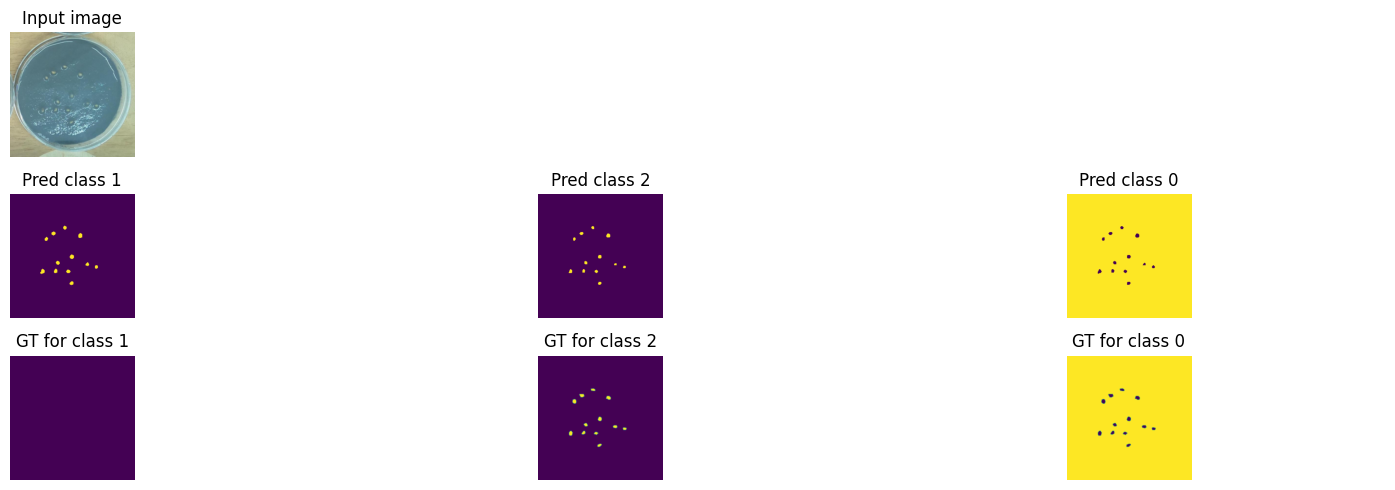

Train loss: 0.35965 | Time: 53m 32s | Val loss: 0.35660
Train_DICE_avg: 0.65044 | Train_Jaccard_avg: 0.58479 | Train_Sensitivity_avg: 0.63749 | Train_Specificity_avg: 0.97891 
Class 0 - Train_DICE: 0.97945 | Train_Jaccard: 0.96042 | Train_Sensitivity: 0.96203 | Train_Specificity: 0.94604 
Class 1 - Train_DICE: 0.16085 | Train_Jaccard: 0.09842 | Train_Sensitivity: 0.12770 | Train_Specificity: 0.99663 
Class 2 - Train_DICE: 0.81101 | Train_Jaccard: 0.69554 | Train_Sensitivity: 0.82273 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.65601 | Val_Jaccard_avg: 0.59907 | Val_Sensitivity_avg: 0.65381 | Val_Specificity_avg: 0.97518 
Class 0 - Val_DICE: 0.99536 | Val_Jaccard: 0.99080 | Val_Sensitivity: 0.99258 | Val_Specificity: 0.93460 
Class 1 - Val_DICE: 0.15592 | Val_Jaccard: 0.09800 | Val_Sensitivity: 0.12879 | Val_Specificity: 0.99632 
Class 2 - Val_DICE: 0.81676 | Val_Jaccard: 0.70841 | Val_Sensitivity: 0.84007 | Val_Specificity: 0.99462 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


Train loss: 0.35986 | Time: 54m 29s | Val loss: 0.35659
Train_DICE_avg: 0.65033 | Train_Jaccard_avg: 0.58452 | Train_Sensitivity_avg: 0.63750 | Train_Specificity_avg: 0.97885 
Class 0 - Train_DICE: 0.97897 | Train_Jaccard: 0.95951 | Train_Sensitivity: 0.96113 | Train_Specificity: 0.94588 
Class 1 - Train_DICE: 0.16109 | Train_Jaccard: 0.09859 | Train_Sensitivity: 0.12789 | Train_Specificity: 0.99665 
Class 2 - Train_DICE: 0.81093 | Train_Jaccard: 0.69547 | Train_Sensitivity: 0.82348 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.65565 | Val_Jaccard_avg: 0.59869 | Val_Sensitivity_avg: 0.65422 | Val_Specificity_avg: 0.97547 
Class 0 - Val_DICE: 0.99538 | Val_Jaccard: 0.99085 | Val_Sensitivity: 0.99266 | Val_Specificity: 0.93544 
Class 1 - Val_DICE: 0.15541 | Val_Jaccard: 0.09763 | Val_Sensitivity: 0.12839 | Val_Specificity: 0.99633 
Class 2 - Val_DICE: 0.81614 | Val_Jaccard: 0.70760 | Val_Sensitivity: 0.84160 | Val_Specificity: 0.99465 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.35975 | Time: 55m 26s | Val loss: 0.35670
Train_DICE_avg: 0.65038 | Train_Jaccard_avg: 0.58451 | Train_Sensitivity_avg: 0.63746 | Train_Specificity_avg: 0.97876 
Class 0 - Train_DICE: 0.97889 | Train_Jaccard: 0.95938 | Train_Sensitivity: 0.96104 | Train_Specificity: 0.94559 
Class 1 - Train_DICE: 0.16129 | Train_Jaccard: 0.09868 | Train_Sensitivity: 0.12826 | Train_Specificity: 0.99666 
Class 2 - Train_DICE: 0.81095 | Train_Jaccard: 0.69547 | Train_Sensitivity: 0.82307 | Train_Specificity: 0.99403 
Val_DICE_avg: 0.65538 | Val_Jaccard_avg: 0.59848 | Val_Sensitivity_avg: 0.65417 | Val_Specificity_avg: 0.97518 
Class 0 - Val_DICE: 0.99537 | Val_Jaccard: 0.99083 | Val_Sensitivity: 0.99265 | Val_Specificity: 0.93463 
Class 1 - Val_DICE: 0.15467 | Val_Jaccard: 0.09715 | Val_Sensitivity: 0.12740 | Val_Specificity: 0.99632 
Class 2 - Val_DICE: 0.81610 | Val_Jaccard: 0.70748 | Val_Sensitivity: 0.84247 | Val_Specificity: 0.99460 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.35957 | Time: 56m 24s | Val loss: 0.35658
Train_DICE_avg: 0.65030 | Train_Jaccard_avg: 0.58458 | Train_Sensitivity_avg: 0.63770 | Train_Specificity_avg: 0.97842 
Class 0 - Train_DICE: 0.97909 | Train_Jaccard: 0.95972 | Train_Sensitivity: 0.96139 | Train_Specificity: 0.94461 
Class 1 - Train_DICE: 0.16040 | Train_Jaccard: 0.09811 | Train_Sensitivity: 0.12726 | Train_Specificity: 0.99665 
Class 2 - Train_DICE: 0.81143 | Train_Jaccard: 0.69591 | Train_Sensitivity: 0.82447 | Train_Specificity: 0.99400 
Val_DICE_avg: 0.65565 | Val_Jaccard_avg: 0.59873 | Val_Sensitivity_avg: 0.65414 | Val_Specificity_avg: 0.97469 
Class 0 - Val_DICE: 0.99536 | Val_Jaccard: 0.99080 | Val_Sensitivity: 0.99263 | Val_Specificity: 0.93319 
Class 1 - Val_DICE: 0.15502 | Val_Jaccard: 0.09736 | Val_Sensitivity: 0.12786 | Val_Specificity: 0.99632 
Class 2 - Val_DICE: 0.81657 | Val_Jaccard: 0.70802 | Val_Sensitivity: 0.84195 | Val_Specificity: 0.99455 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


Train loss: 0.35974 | Time: 57m 21s | Val loss: 0.35649
Train_DICE_avg: 0.65026 | Train_Jaccard_avg: 0.58442 | Train_Sensitivity_avg: 0.63746 | Train_Specificity_avg: 0.97819 
Class 0 - Train_DICE: 0.97863 | Train_Jaccard: 0.95887 | Train_Sensitivity: 0.96057 | Train_Specificity: 0.94388 
Class 1 - Train_DICE: 0.16065 | Train_Jaccard: 0.09827 | Train_Sensitivity: 0.12731 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.81150 | Train_Jaccard: 0.69613 | Train_Sensitivity: 0.82449 | Train_Specificity: 0.99403 
Val_DICE_avg: 0.65613 | Val_Jaccard_avg: 0.59939 | Val_Sensitivity_avg: 0.65415 | Val_Specificity_avg: 0.97415 
Class 0 - Val_DICE: 0.99539 | Val_Jaccard: 0.99087 | Val_Sensitivity: 0.99278 | Val_Specificity: 0.93142 
Class 1 - Val_DICE: 0.15522 | Val_Jaccard: 0.09752 | Val_Sensitivity: 0.12771 | Val_Specificity: 0.99635 
Class 2 - Val_DICE: 0.81778 | Val_Jaccard: 0.70977 | Val_Sensitivity: 0.84195 | Val_Specificity: 0.99466 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


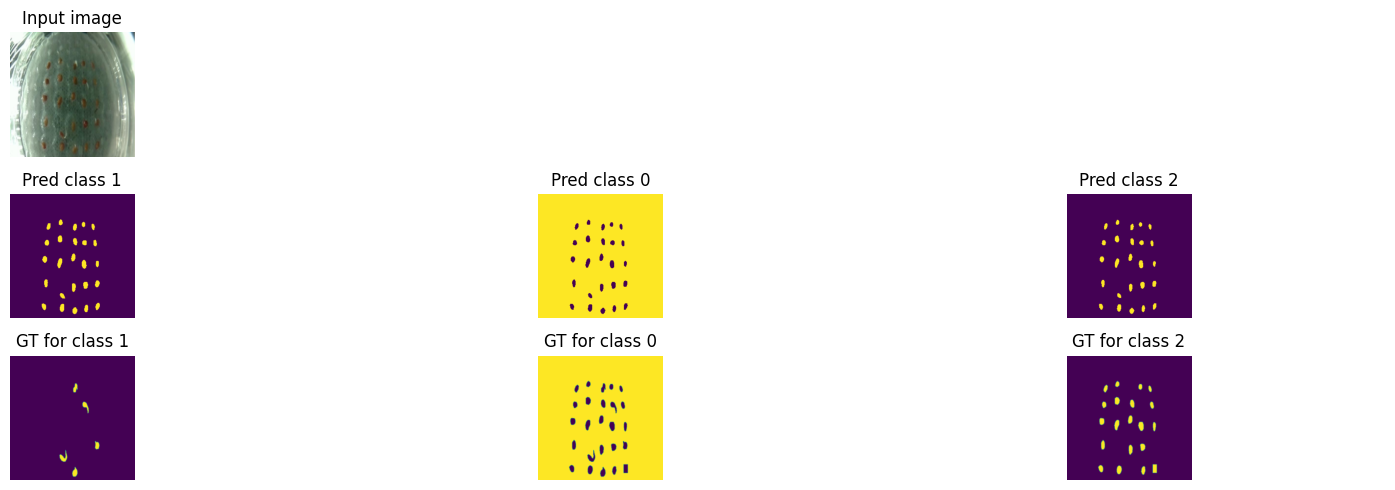

Train loss: 0.35934 | Time: 58m 19s | Val loss: 0.35649
Train_DICE_avg: 0.65056 | Train_Jaccard_avg: 0.58489 | Train_Sensitivity_avg: 0.63838 | Train_Specificity_avg: 0.97839 
Class 0 - Train_DICE: 0.97938 | Train_Jaccard: 0.96028 | Train_Sensitivity: 0.96196 | Train_Specificity: 0.94450 
Class 1 - Train_DICE: 0.16078 | Train_Jaccard: 0.09835 | Train_Sensitivity: 0.12765 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.81151 | Train_Jaccard: 0.69605 | Train_Sensitivity: 0.82552 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.65582 | Val_Jaccard_avg: 0.59885 | Val_Sensitivity_avg: 0.65438 | Val_Specificity_avg: 0.97427 
Class 0 - Val_DICE: 0.99537 | Val_Jaccard: 0.99083 | Val_Sensitivity: 0.99271 | Val_Specificity: 0.93192 
Class 1 - Val_DICE: 0.15533 | Val_Jaccard: 0.09757 | Val_Sensitivity: 0.12784 | Val_Specificity: 0.99634 
Class 2 - Val_DICE: 0.81676 | Val_Jaccard: 0.70816 | Val_Sensitivity: 0.84259 | Val_Specificity: 0.99456 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = FCN(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


Global Performance Metrics:
Loss mean: 0.35748, std: 0.00209
Dice Coefficient mean: 0.65053, std: 0.03877
Jaccard Index mean: 0.58894, std: 0.03636
Sensitivity mean: 0.86286, std: 0.10733
Specificity mean: 0.90215, std: 0.05906

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99436, std: 0.00368
Jaccard mean: 0.98881, std: 0.00720
Sensitivity mean: 0.99806, std: 0.00106
Specificity mean: 0.74742, std: 0.19079

Class 1:
Dice mean: 0.16503, std: 0.18380
Jaccard mean: 0.10294, std: 0.12861
Sensitivity mean: 0.75682, std: 0.27083
Specificity mean: 0.96612, std: 0.02113

Class 2:
Dice mean: 0.79219, std: 0.13740
Jaccard mean: 0.67508, std: 0.16824
Sensitivity mean: 0.83372, std: 0.08085
Specificity mean: 0.99291, std: 0.00877
